In [1]:
!CUDA_VISIBLE_DEVICES=0 python tools/ensemble_test.py --config ./best_models/test/model1_for_cell.py ./best_models/test/model2_for_cell.py  --checkpoint ./best_models/test/model1_for_cell_best.pth ./best_models/test/model2_for_cell_best.pth  --out ./pred/ensemble_cell_test.pkl  

configs_num: 2
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
configs: ['./best_models/test/model1_for_cell.py', './best_models/test/model2_for_cell.py']
checkpoints: ['./best_models/test/model1_for_cell_best.pth', './best_models/test/model2_for_cell_best.pth']
Use load_from_local loader
Use load_from_local loader
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 277/277, 0.1 task/s, elapsed: 2157s, ETA:     0s
writing results to ./pred/ensemble_cell_test.pkl


In [3]:
!CUDA_VISIBLE_DEVICES=0 python tools/test.py ./best_models/test/model1_for_nu.py ./best_models/test/model1_for_nu_best.pth  --out ./pred/model1_nu_test.pkl 

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Use load_from_local loader
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 277/277, 0.7 task/s, elapsed: 392s, ETA:     0s
writing results to ./pred/model1_nu_test.pkl


In [4]:
import pickle
import os
import json
from pycocotools import mask
import cv2
import numpy as np

In [5]:
img_dir = "./datasets/test/x" 
img_ids = sorted(os.listdir(img_dir))
imgs_gt = list(set([i.split('.')[0] for i in img_ids]))
imgs_gt= sorted(imgs_gt)
assert len(imgs_gt)==277

In [8]:
with open('./pred/model1_nu_test.pkl','rb') as f:
    nu_test_pkl = pickle.load(f,encoding='utf-8')
    
nu_save_path = './pred/test/nu'
if not os.path.exists(nu_save_path):
    os.mkdir(nu_save_path)

In [9]:
for i,ann in enumerate(nu_test_pkl):
    bbox,masks = ann
    scores = bbox[0][...,4]
    masks = masks[0]
    temp =[]
    for j,m in enumerate(masks):
        temp.append(mask.decode(m))
    print(i,img_ids[i])
    nu_pr = np.where(np.array(temp).sum(0)>0,1,0)
    cv2.imwrite(os.path.join(nu_save_path, img_ids[i]), nu_pr)

0 101.bmp
1 103.bmp
2 105.bmp
3 107.bmp
4 1703.bmp
5 1707.bmp
6 1710.bmp
7 1711.bmp
8 1723.bmp
9 1729.bmp
10 1735.bmp
11 1754.bmp
12 1760.bmp
13 1761.bmp
14 1763.bmp
15 1768.bmp
16 1784.bmp
17 1785.bmp
18 1793.bmp
19 1794.bmp
20 1796.bmp
21 1797.bmp
22 1804.bmp
23 1806.bmp
24 1820.bmp
25 1827.bmp
26 1828.bmp
27 1836.bmp
28 1840.bmp
29 1850.bmp
30 1852.bmp
31 1868.bmp
32 1879.bmp
33 1884.bmp
34 1887.bmp
35 1889.bmp
36 1892.bmp
37 1893.bmp
38 1903.bmp
39 1910.bmp
40 1922.bmp
41 1923.bmp
42 1924.bmp
43 1927.bmp
44 1938.bmp
45 1945.bmp
46 1947.bmp
47 1950.bmp
48 1953.bmp
49 1968.bmp
50 1969.bmp
51 1974.bmp
52 1975.bmp
53 1976.bmp
54 1986.bmp
55 1988.bmp
56 1995.bmp
57 2006.bmp
58 2014.bmp
59 2016.bmp
60 2028.bmp
61 2030.bmp
62 204.bmp
63 205.bmp
64 2061.bmp
65 2065.bmp
66 2077.bmp
67 2079.bmp
68 2084.bmp
69 209.bmp
70 2102.bmp
71 2103.bmp
72 211.bmp
73 2113.bmp
74 2114.bmp
75 2115.bmp
76 2119.bmp
77 2120.bmp
78 2123.bmp
79 2124.bmp
80 2126.bmp
81 2127.bmp
82 2131.bmp
83 2133.bmp
84 2134.bm

In [16]:
with open('./pred/ensemble_cell_test.pkl','rb') as f:
    cell_test_pkl = pickle.load(f,encoding='utf-8')

inst_save_path = './pred/test/inst'
if not os.path.exists(inst_save_path):
    os.mkdir(inst_save_path)

In [20]:
cnt = 0
for ann in cell_test_pkl:
    bbox,masks = ann
    bbox = bbox[0]
    cnt += len(bbox)

In [21]:
cnt

4561

0 101.bmp


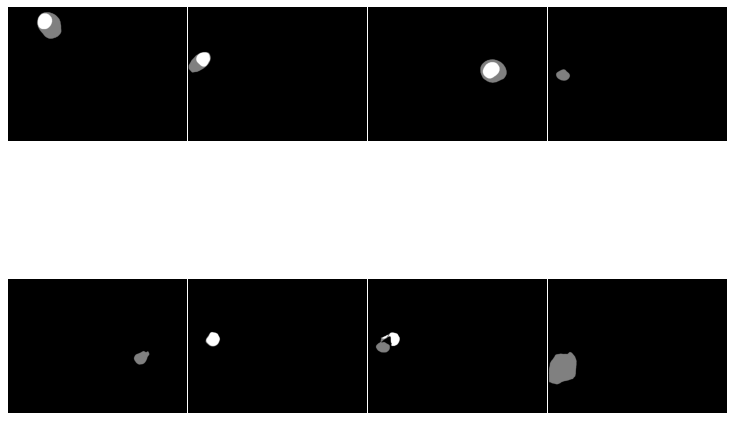

1 103.bmp


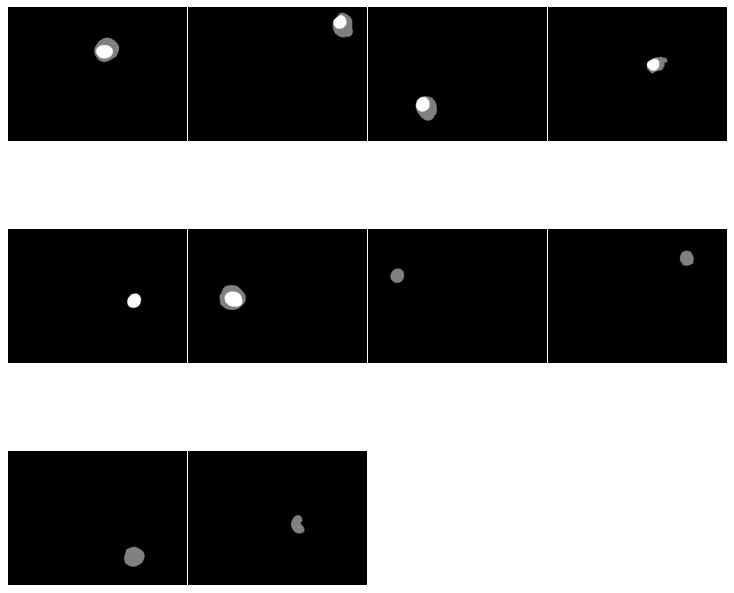

2 105.bmp


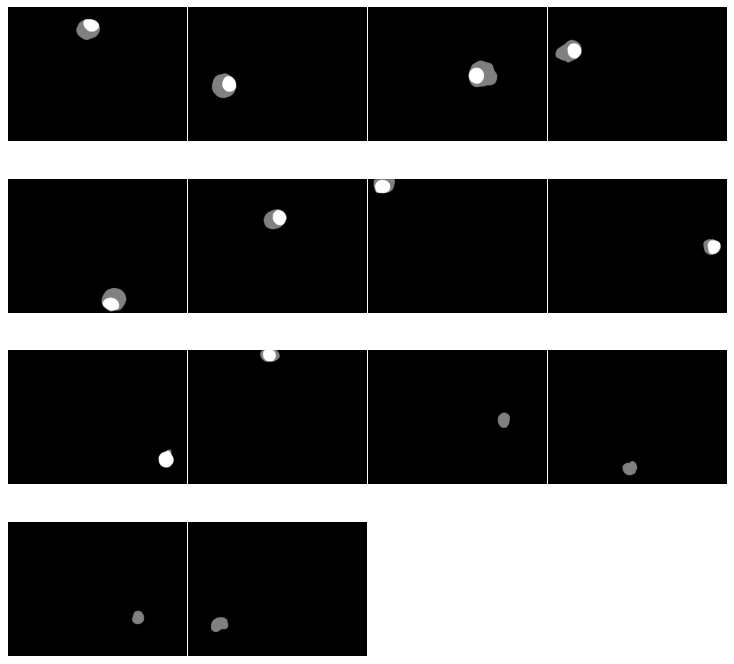

3 107.bmp


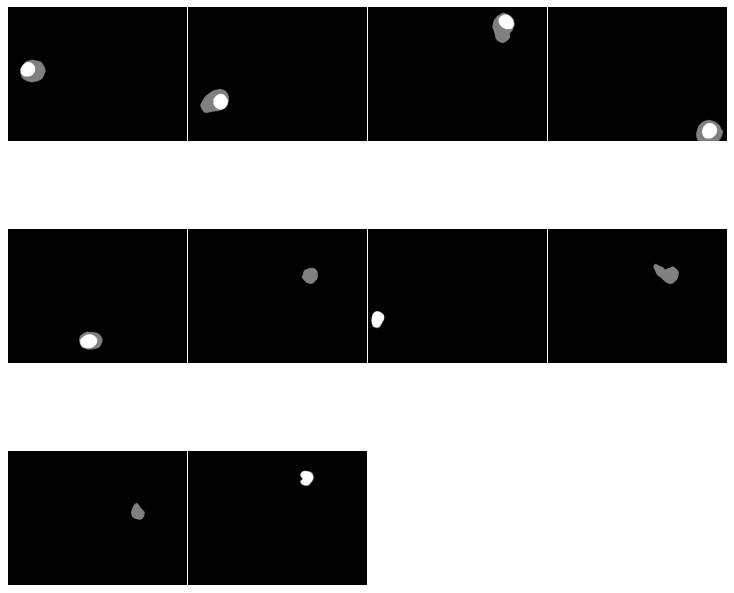

4 1703.bmp


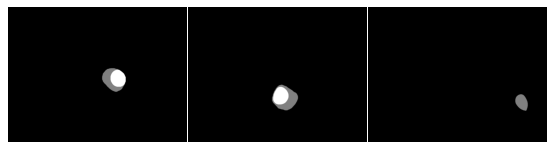

5 1707.bmp


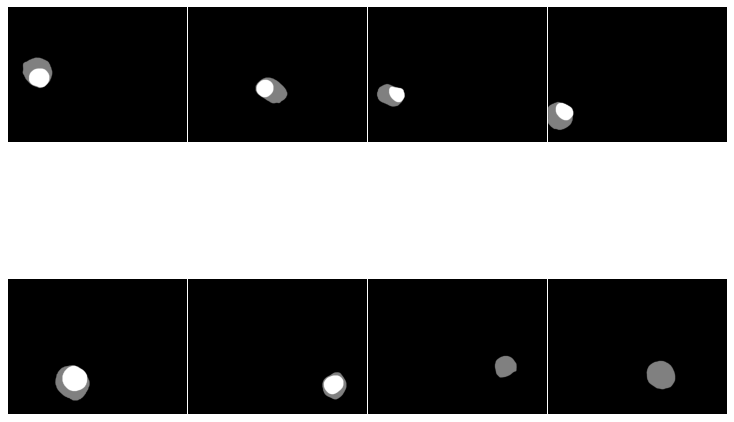

6 1710.bmp


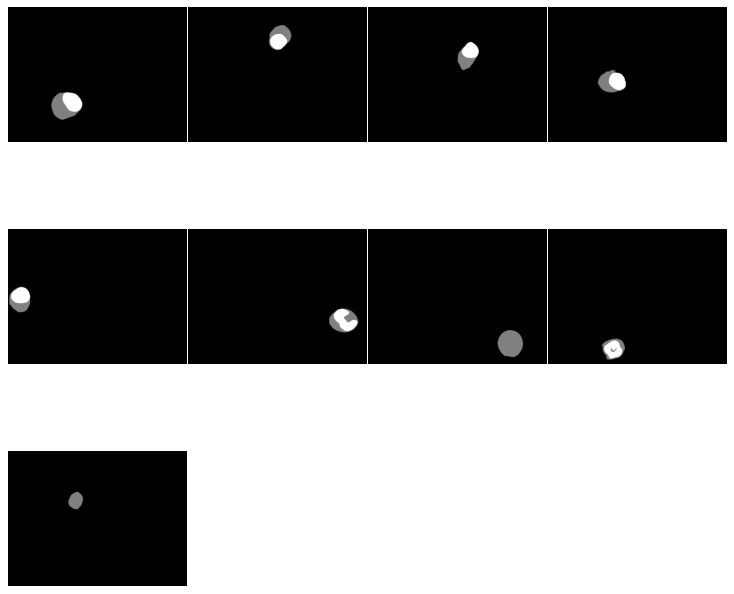

7 1711.bmp


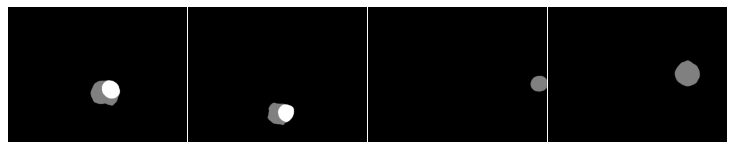

8 1723.bmp


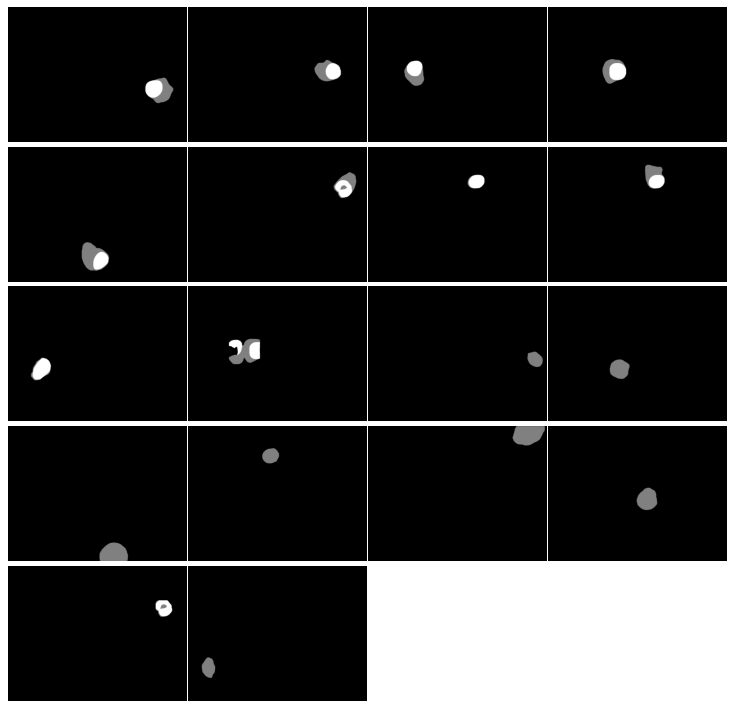

9 1729.bmp


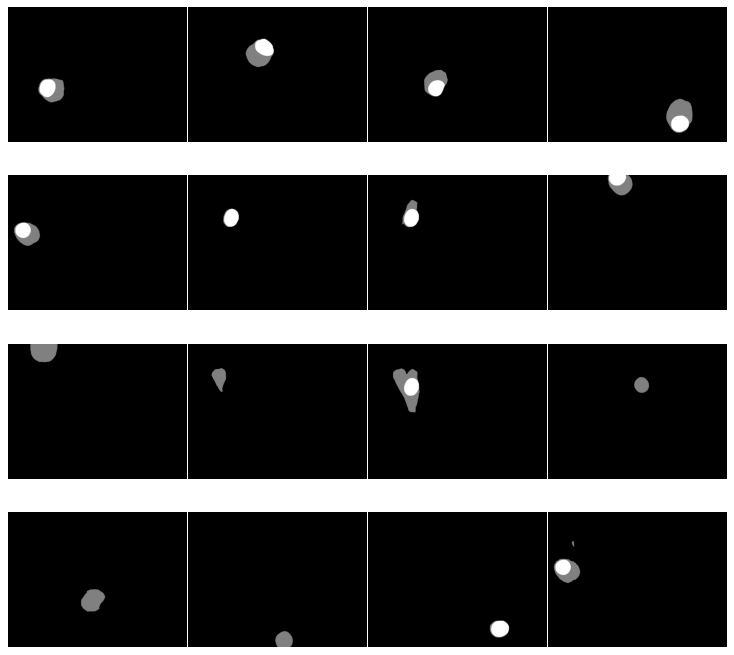

10 1735.bmp


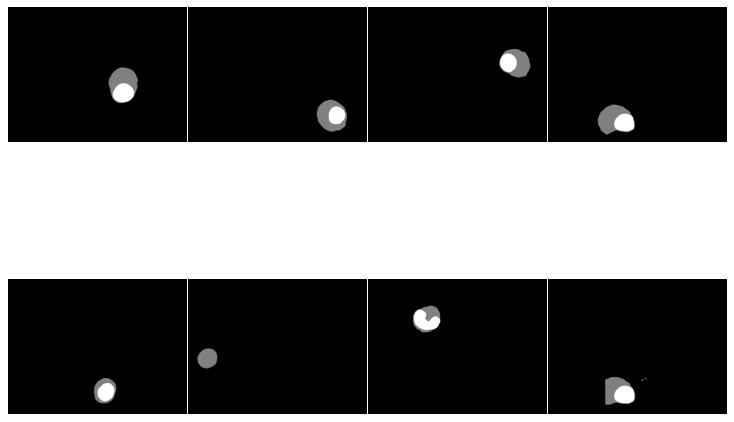

11 1754.bmp


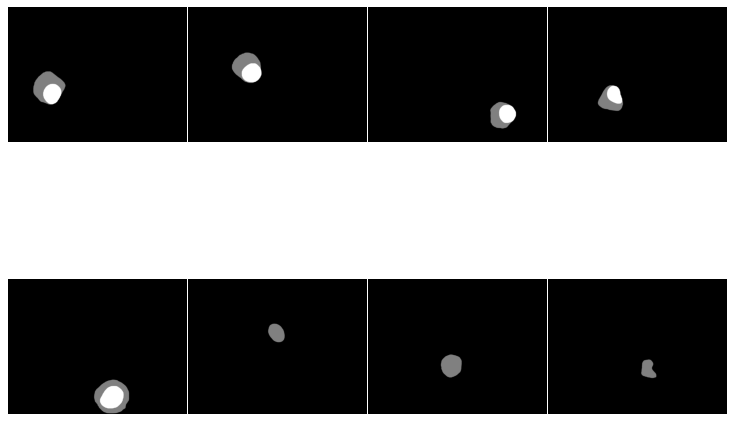

12 1760.bmp


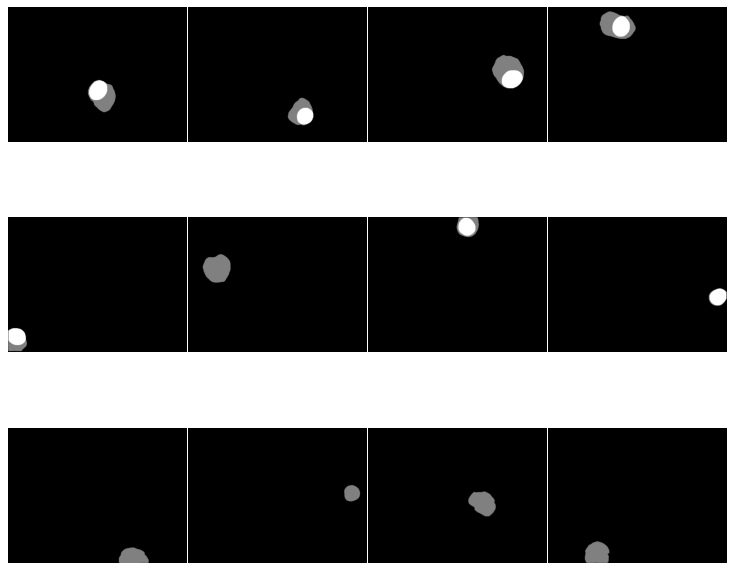

13 1761.bmp


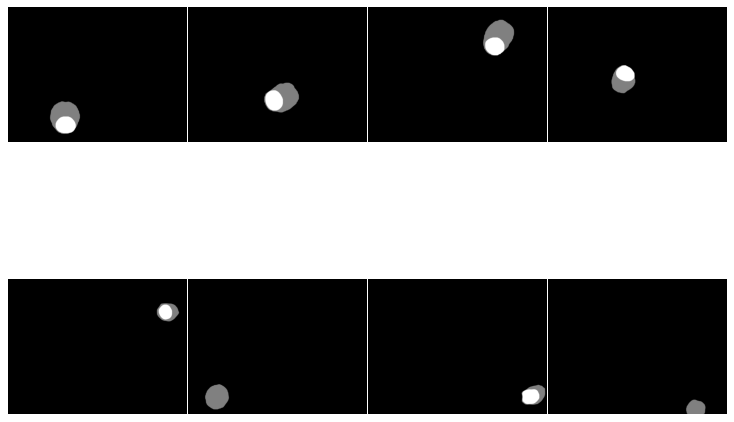

14 1763.bmp


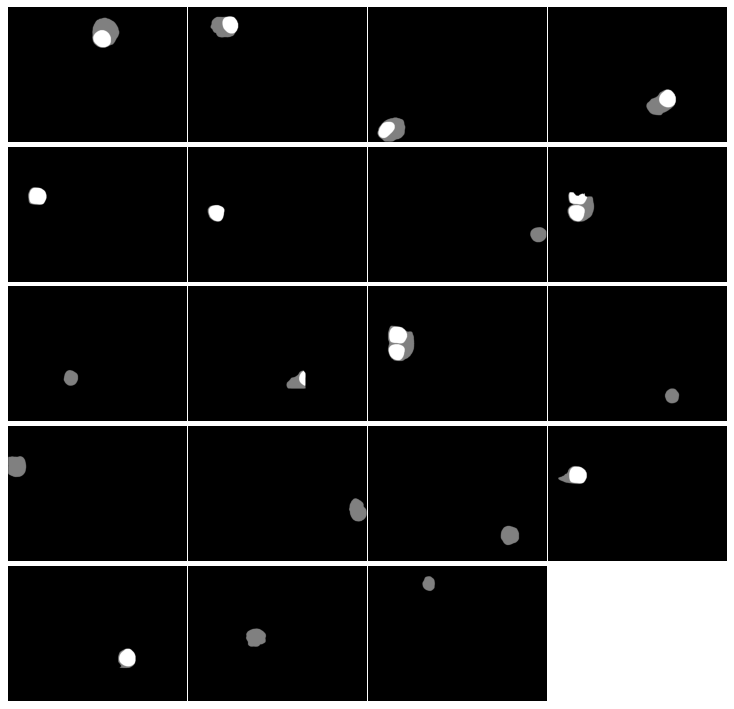

15 1768.bmp


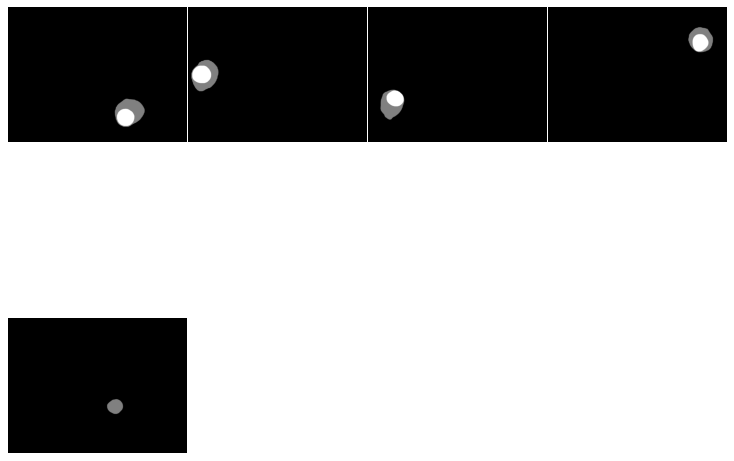

16 1784.bmp


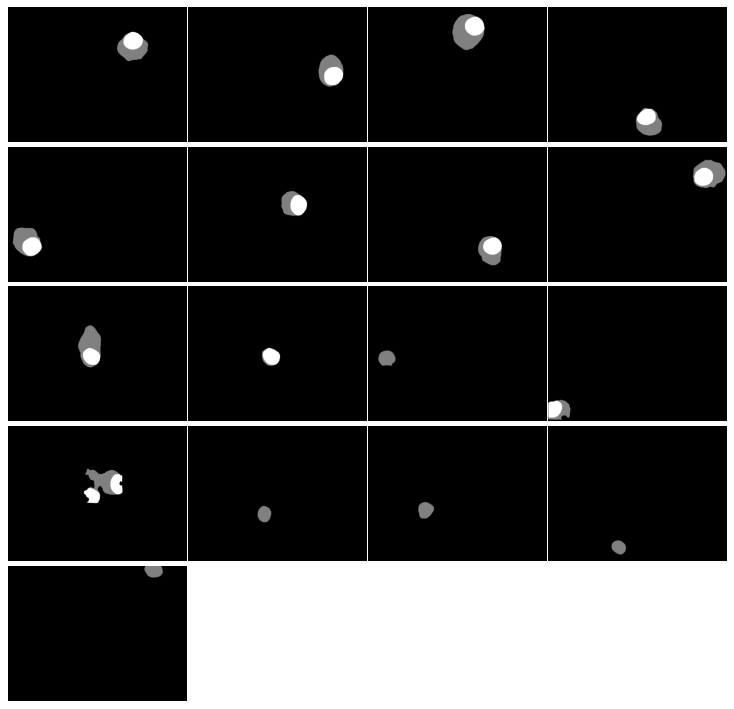

17 1785.bmp


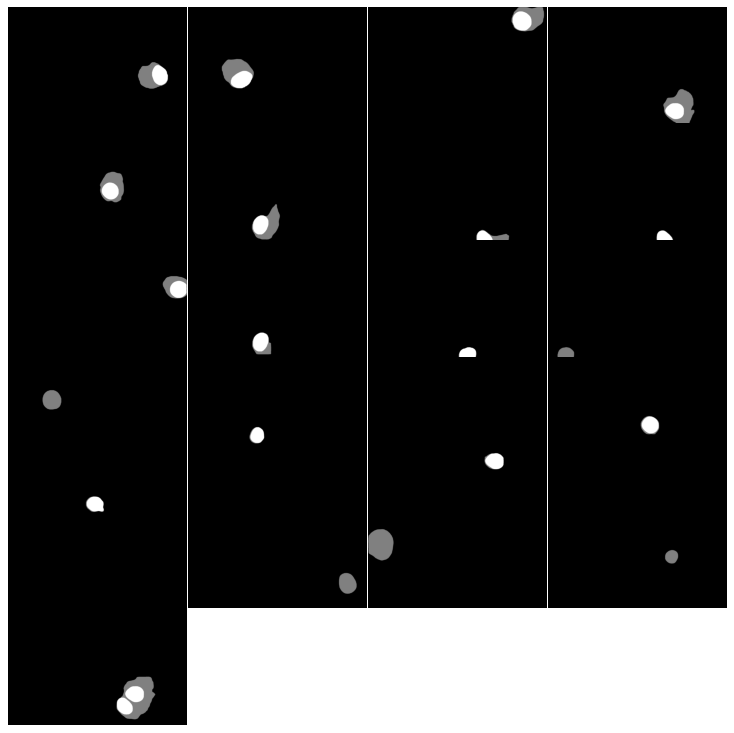

18 1793.bmp


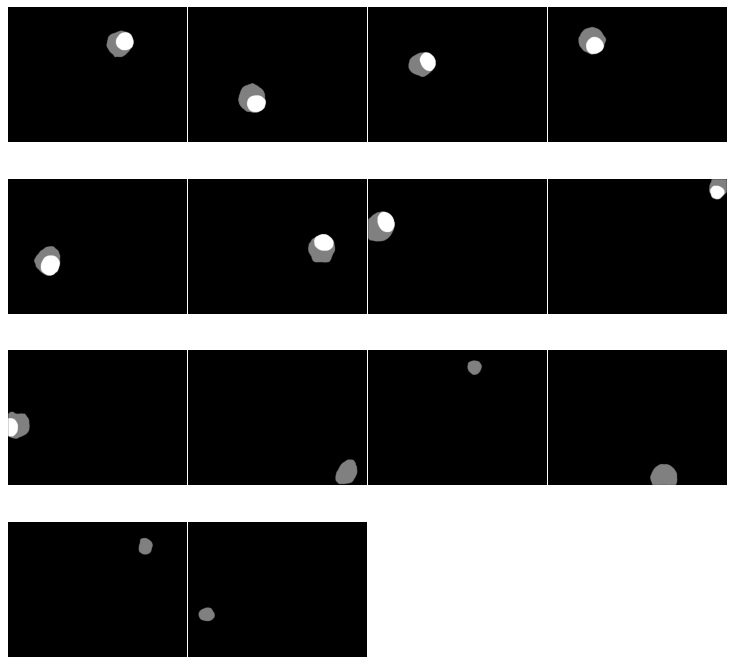

19 1794.bmp


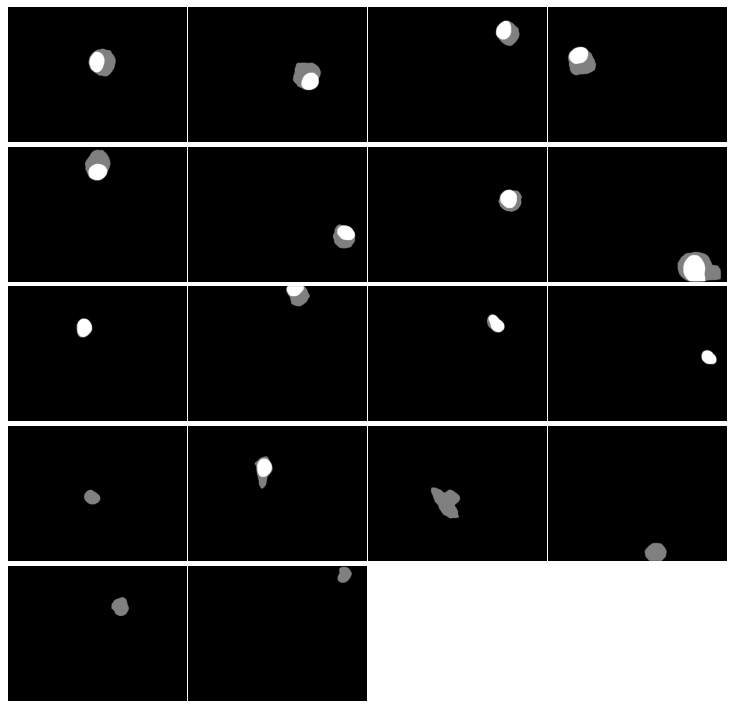

20 1796.bmp


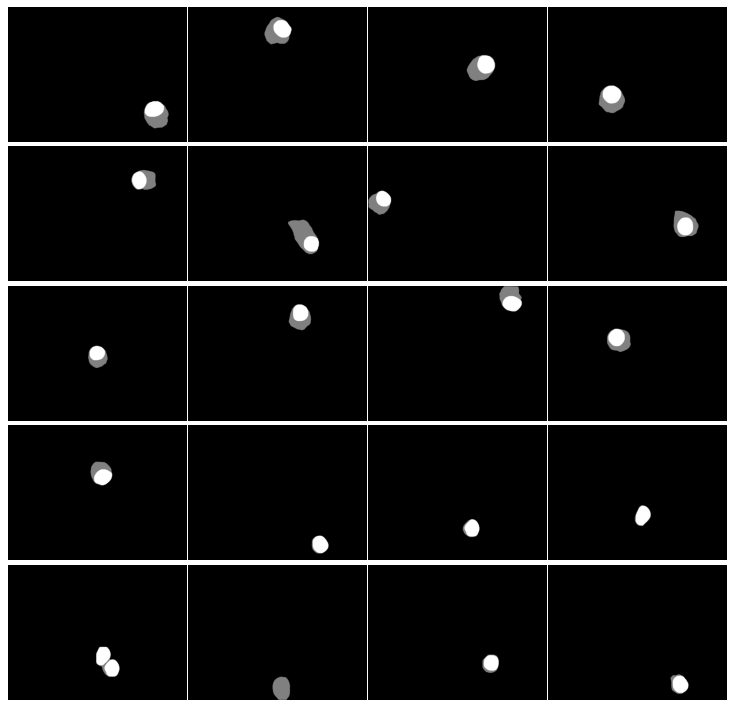

21 1797.bmp


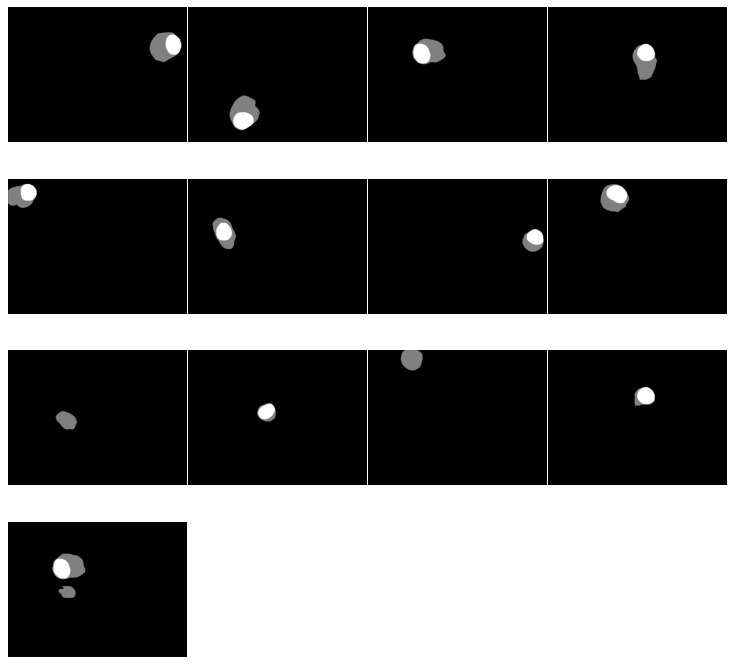

22 1804.bmp


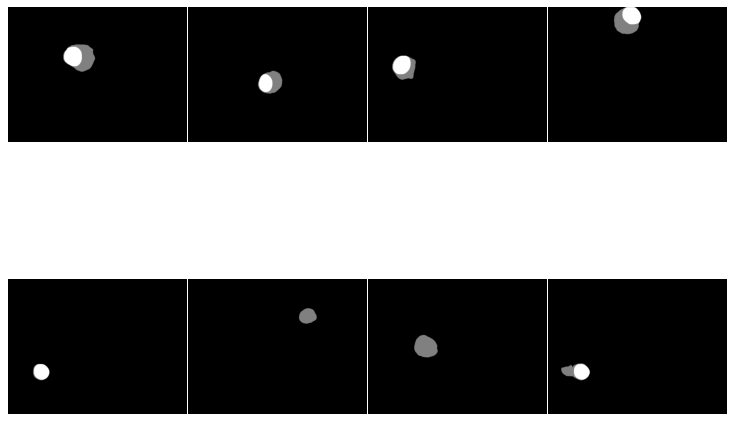

23 1806.bmp


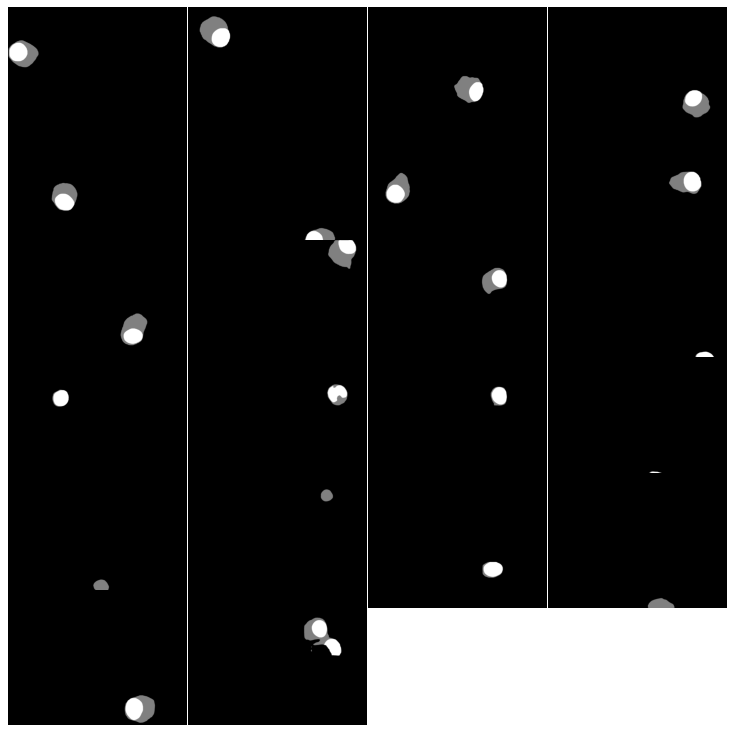

24 1820.bmp


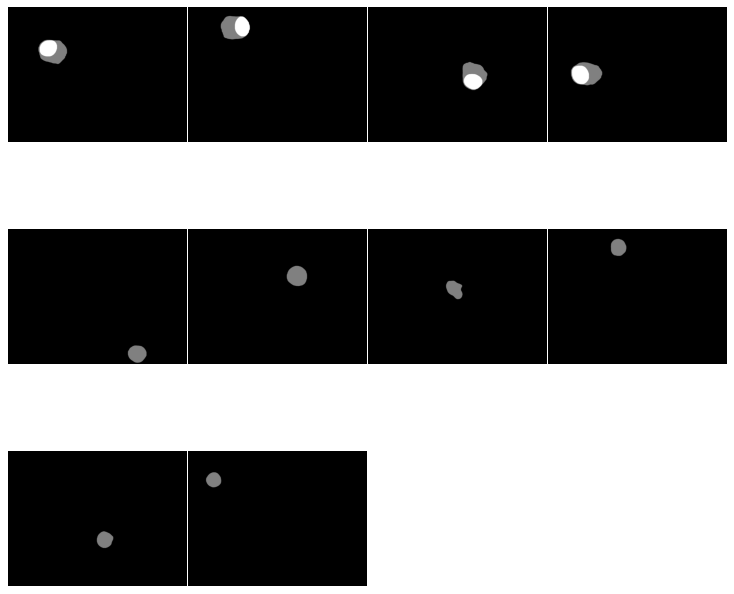

25 1827.bmp


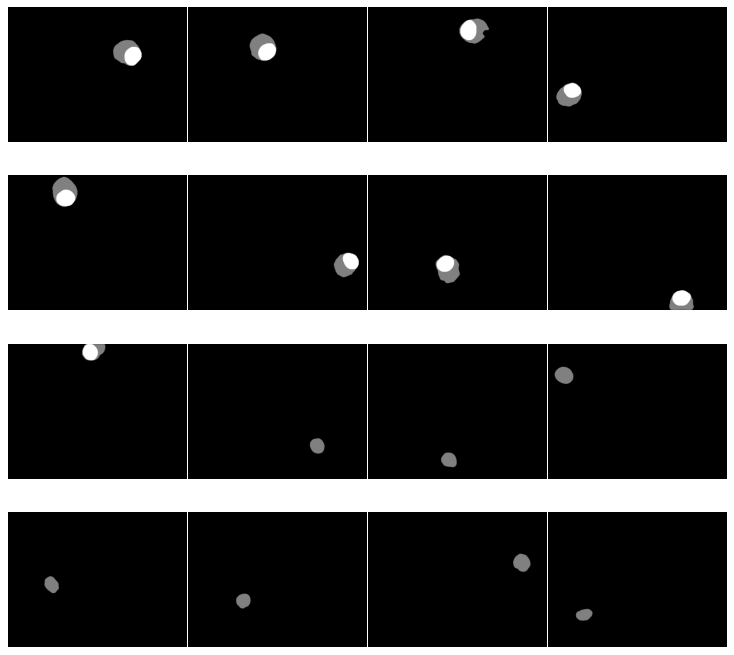

26 1828.bmp


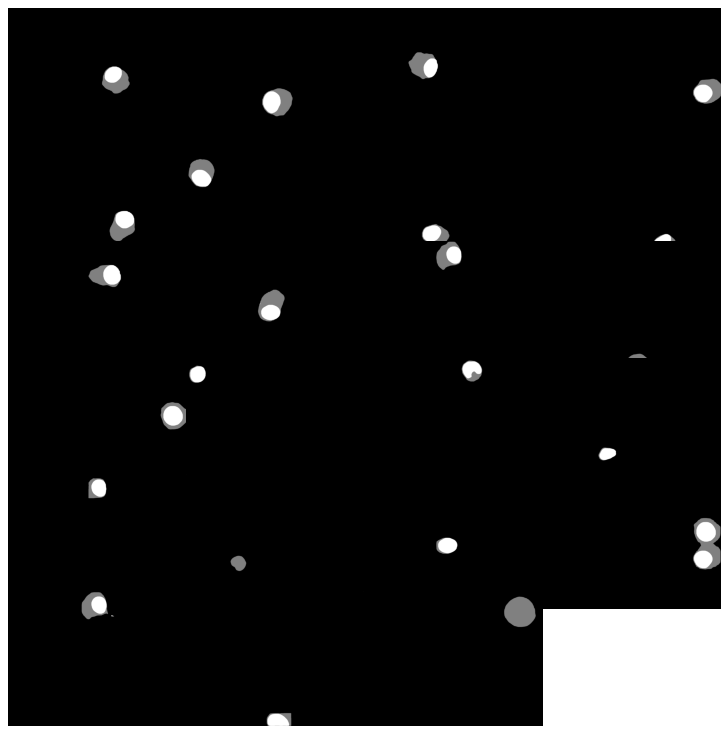

27 1836.bmp


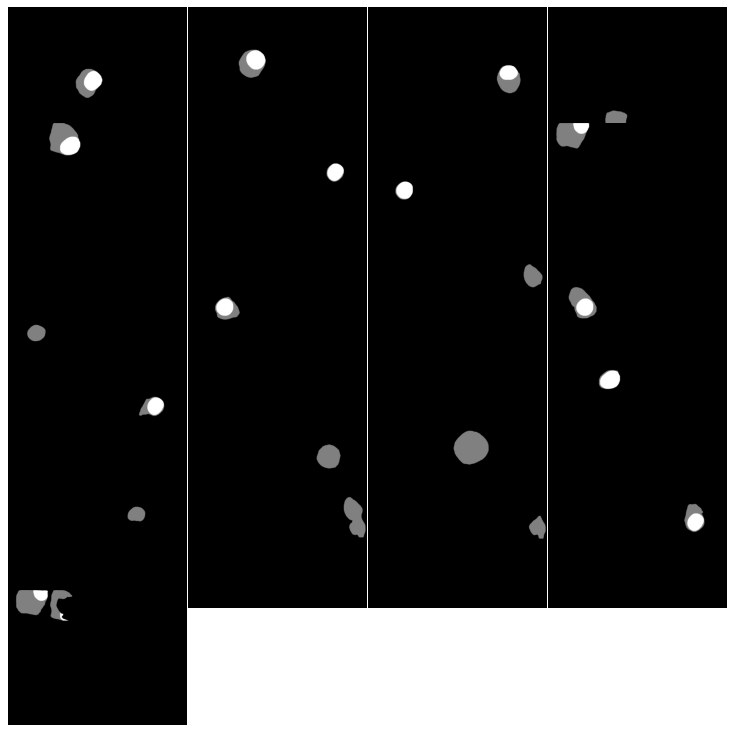

28 1840.bmp


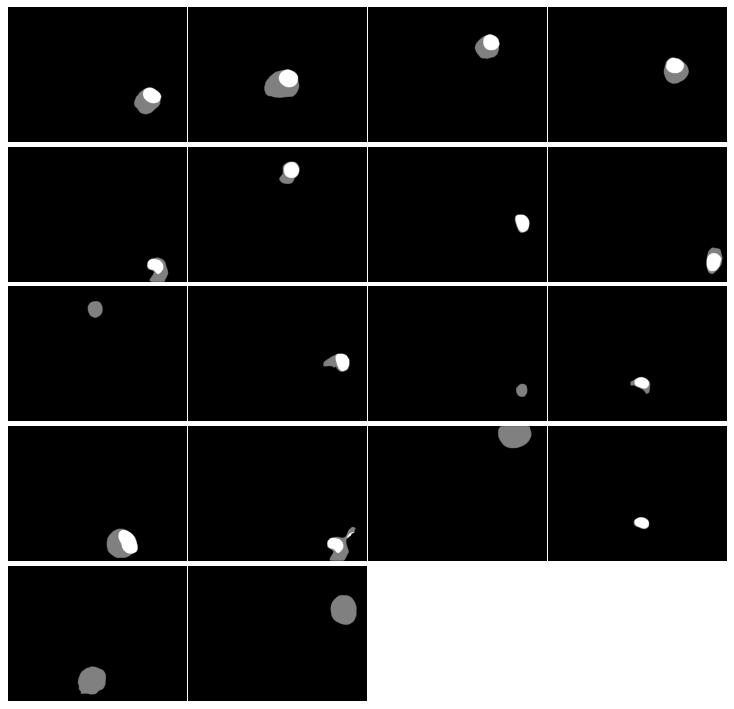

29 1850.bmp


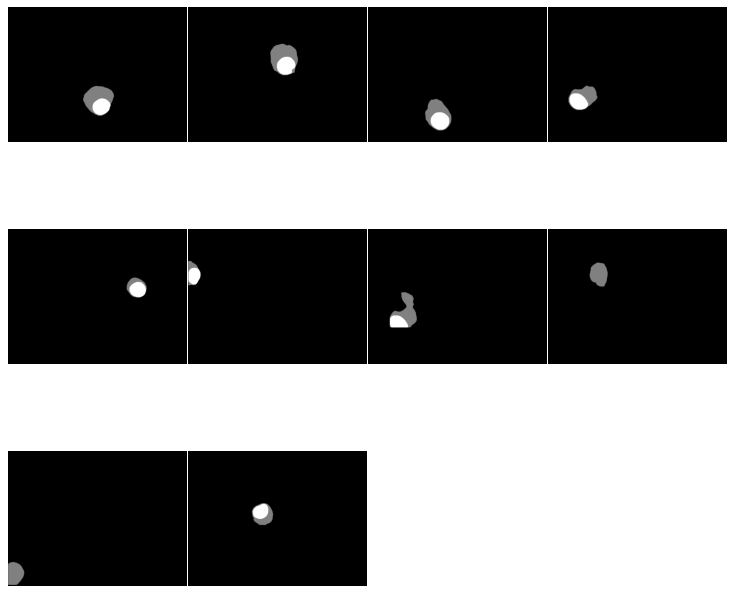

30 1852.bmp


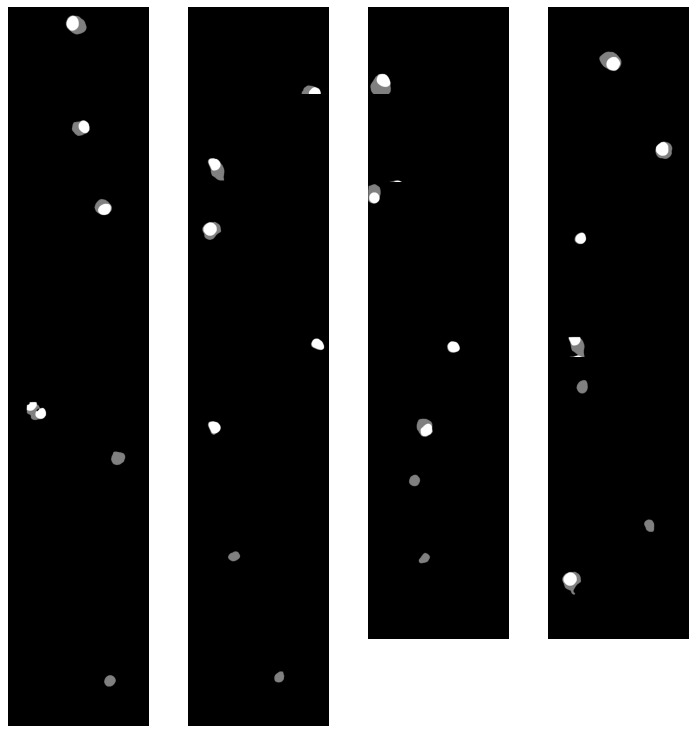

31 1868.bmp


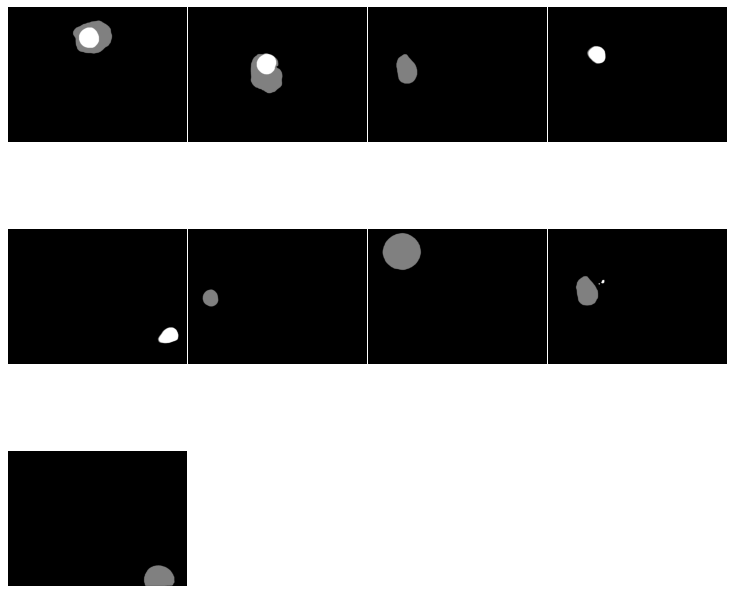

32 1879.bmp


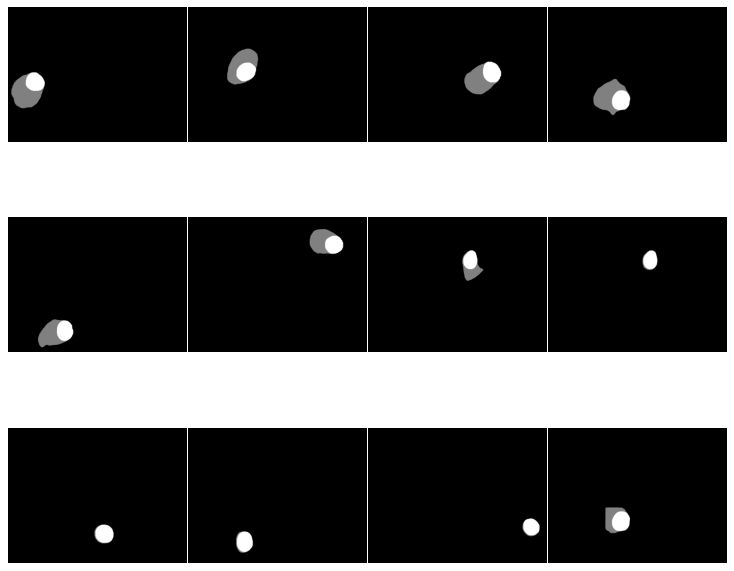

33 1884.bmp


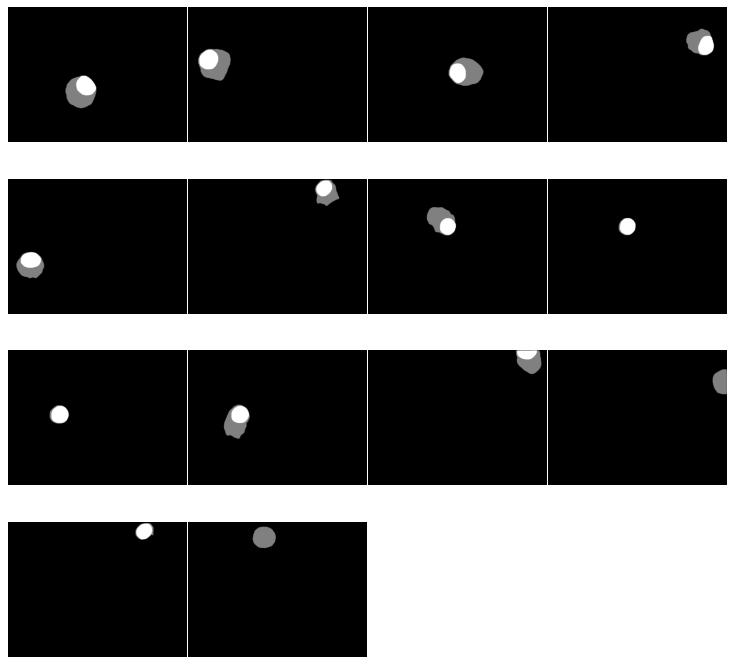

34 1887.bmp


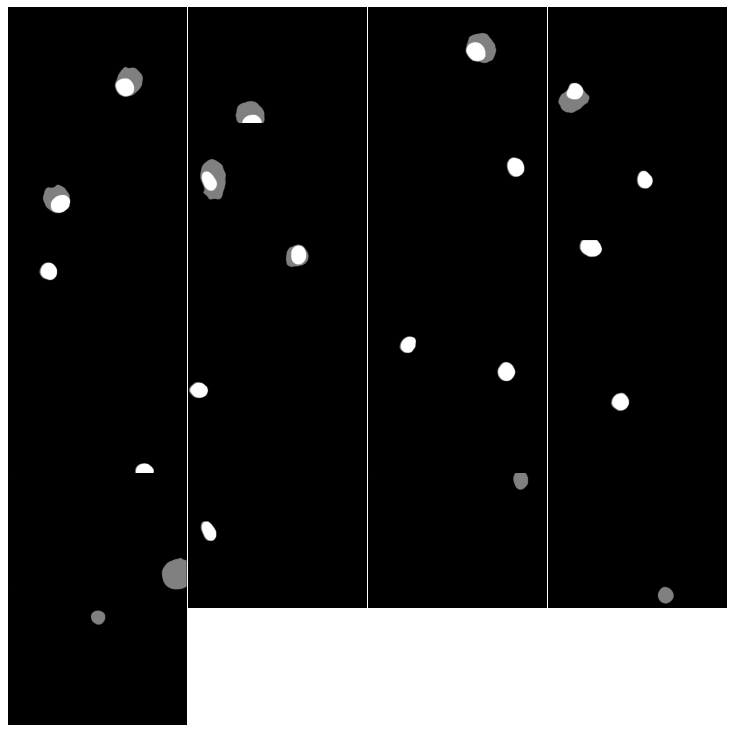

35 1889.bmp


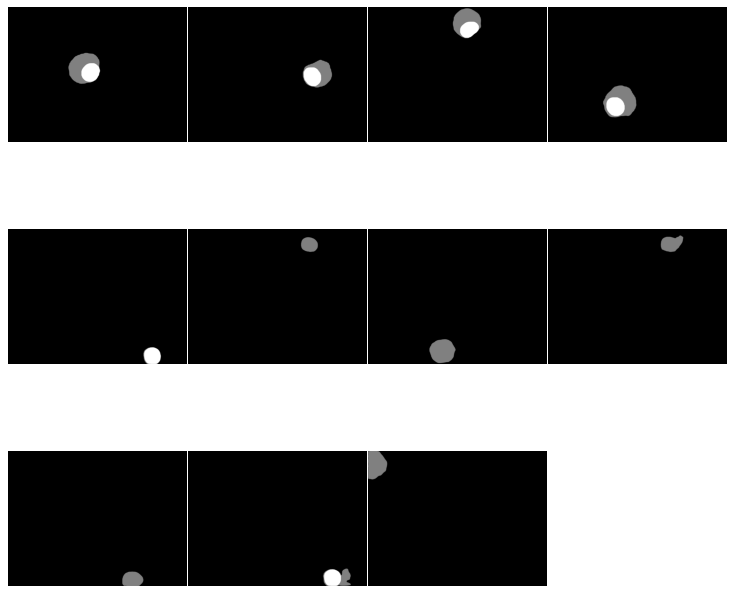

36 1892.bmp


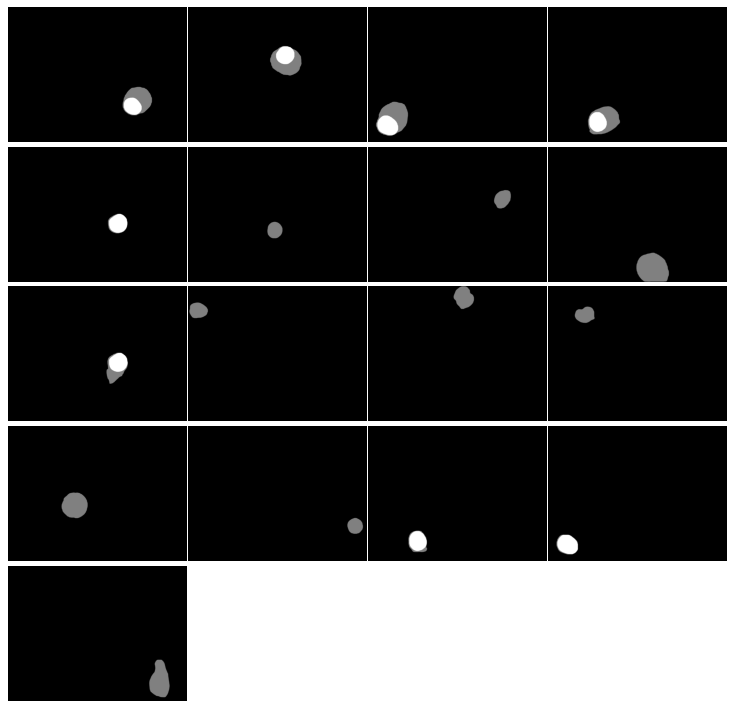

37 1893.bmp


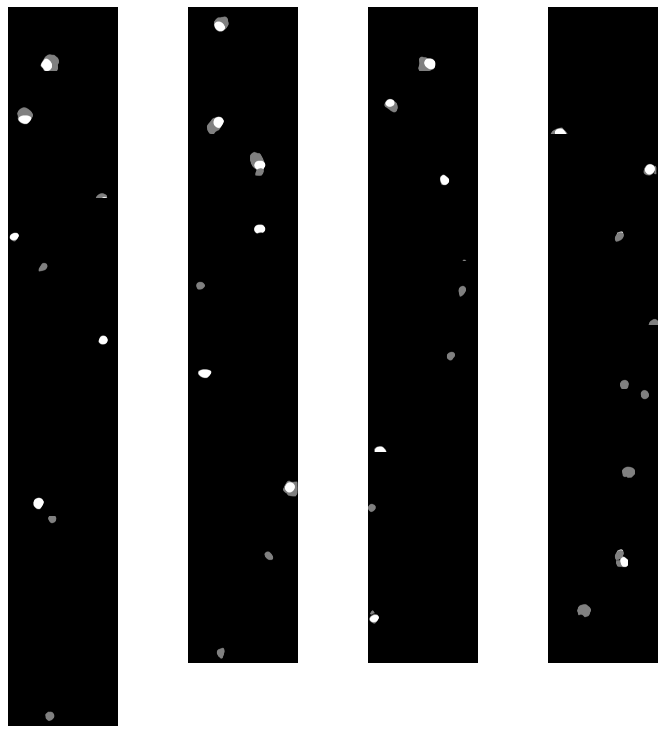

38 1903.bmp


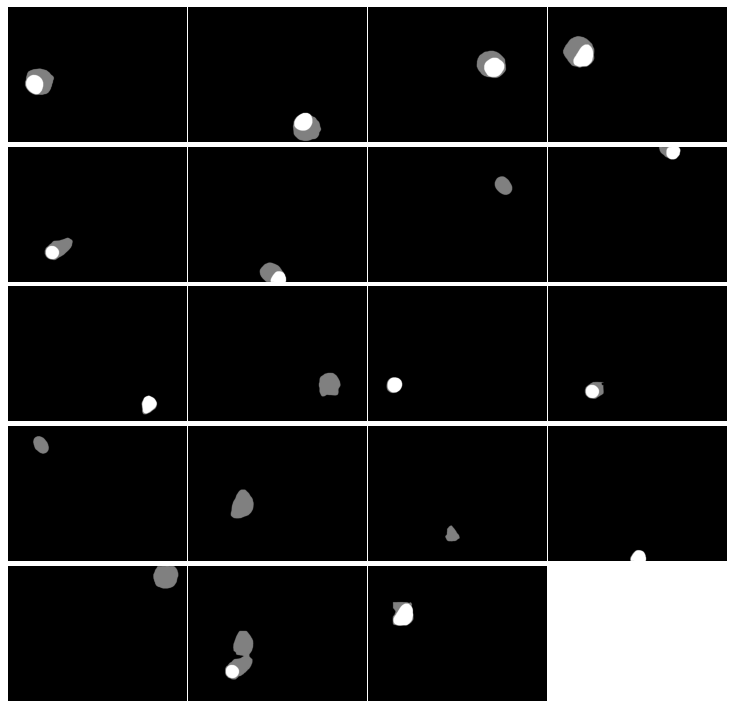

39 1910.bmp


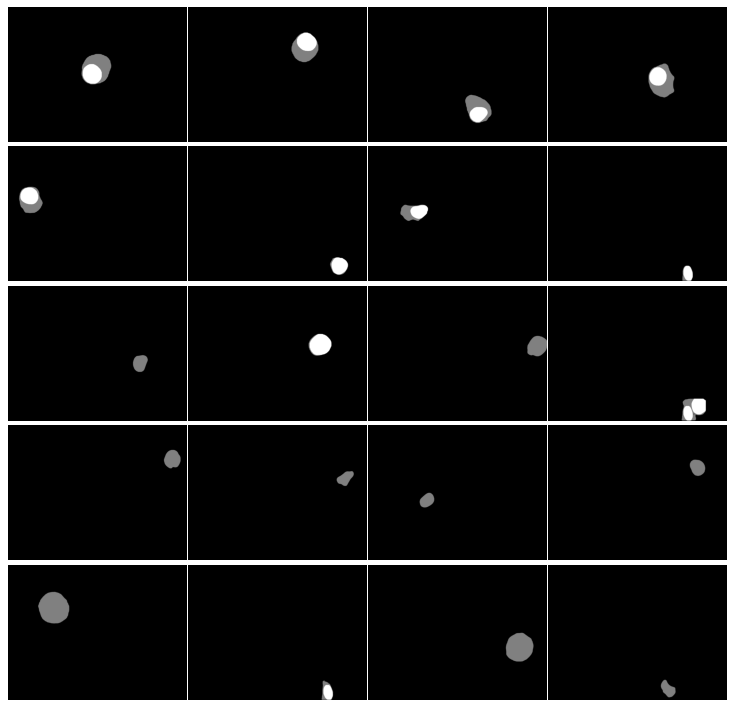

40 1922.bmp


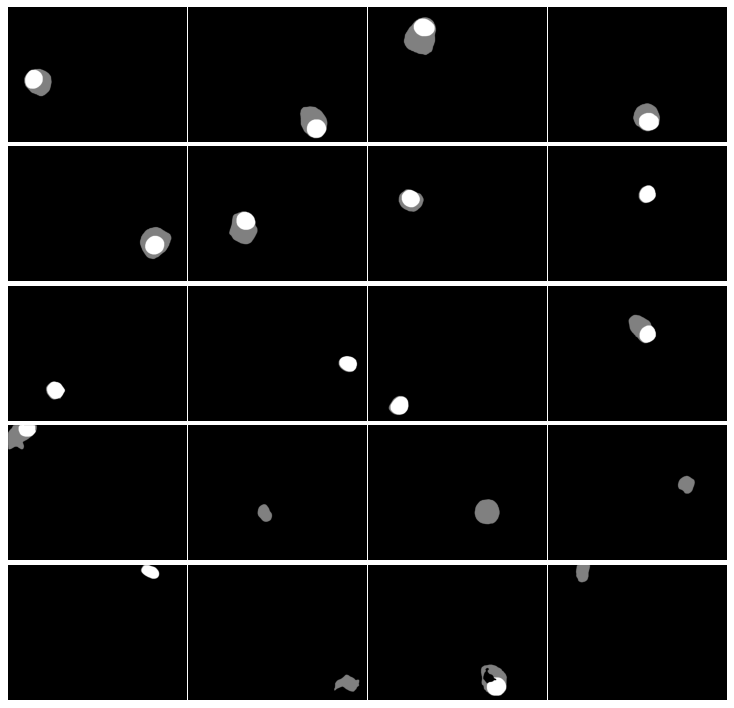

41 1923.bmp


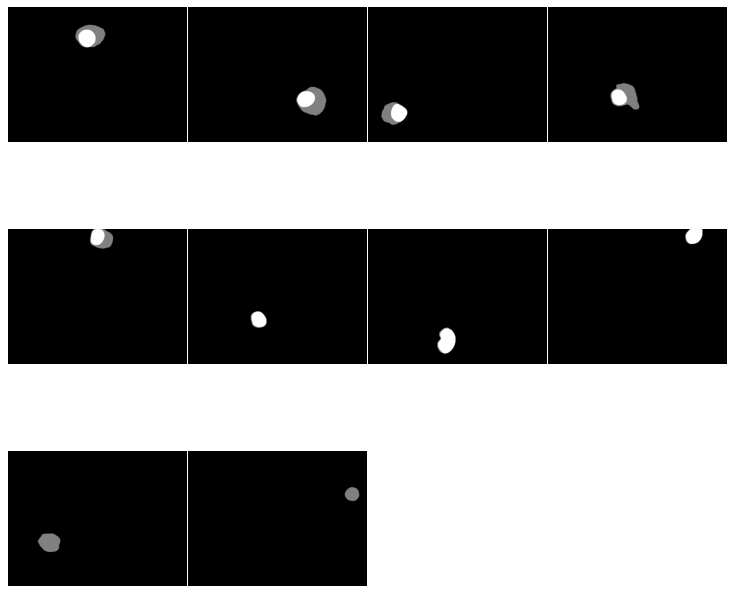

42 1924.bmp


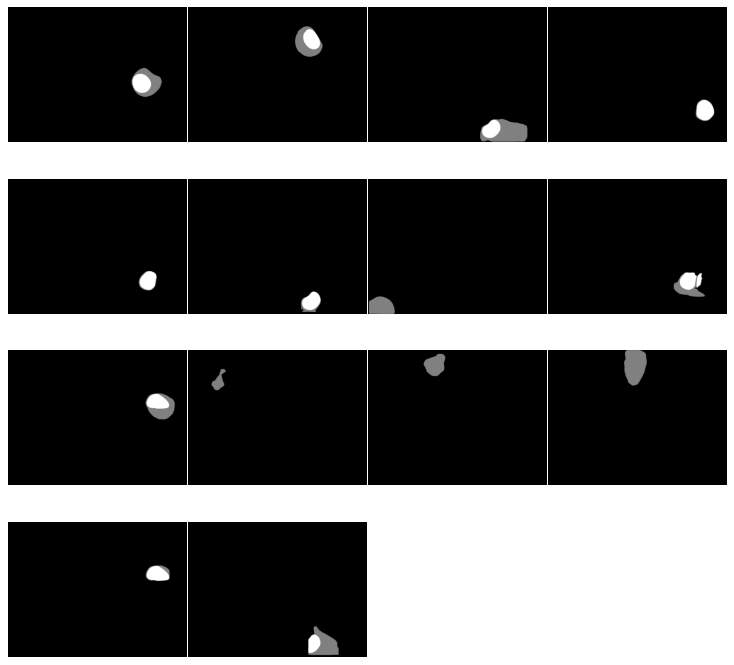

43 1927.bmp


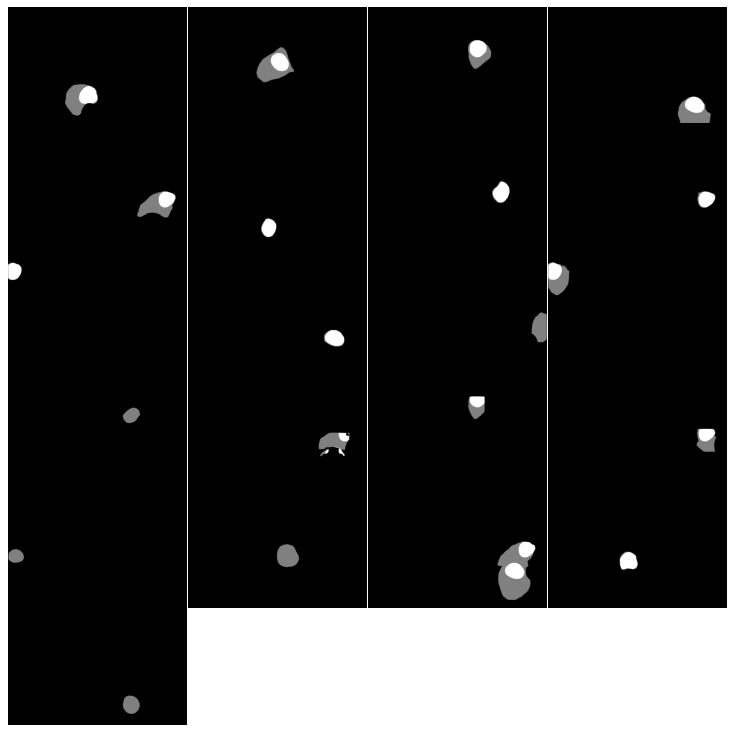

44 1938.bmp


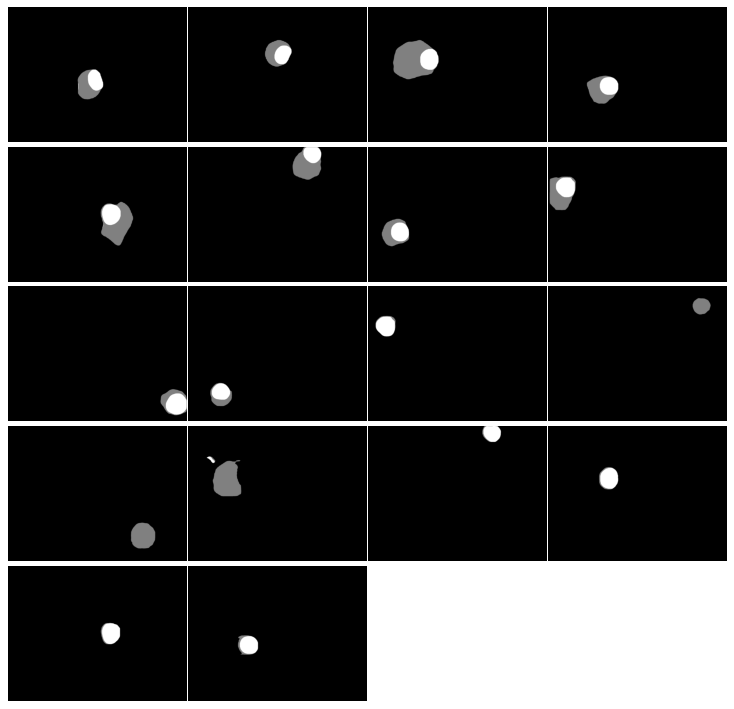

45 1945.bmp


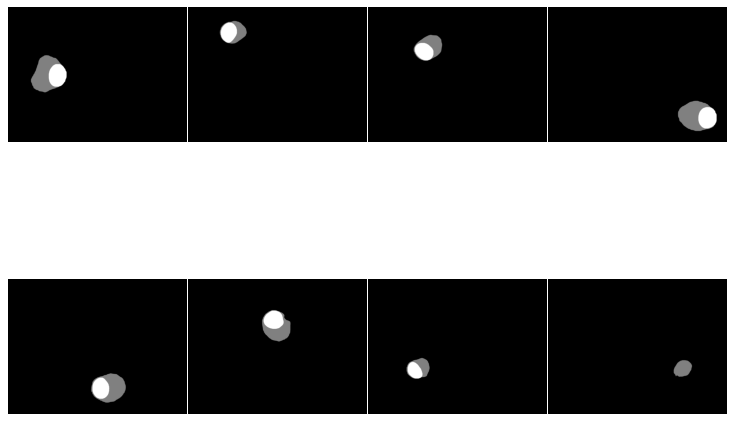

46 1947.bmp


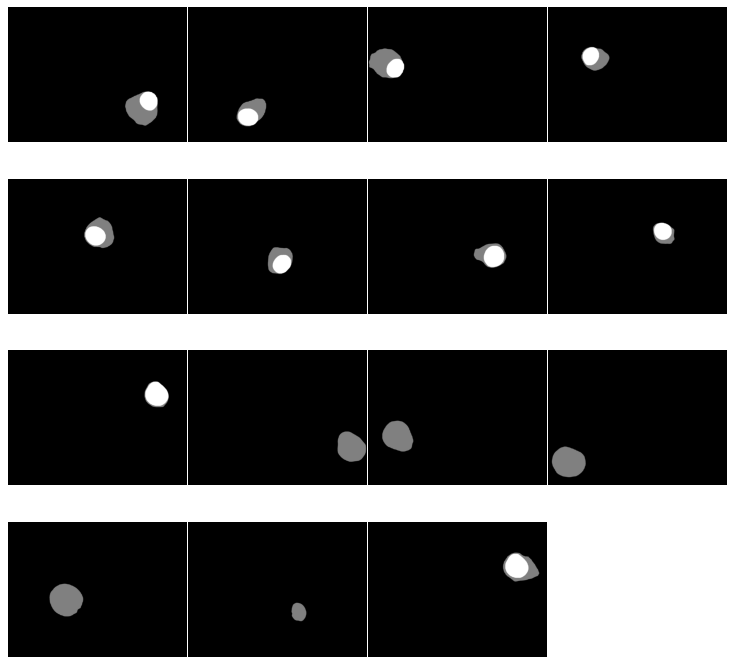

47 1950.bmp


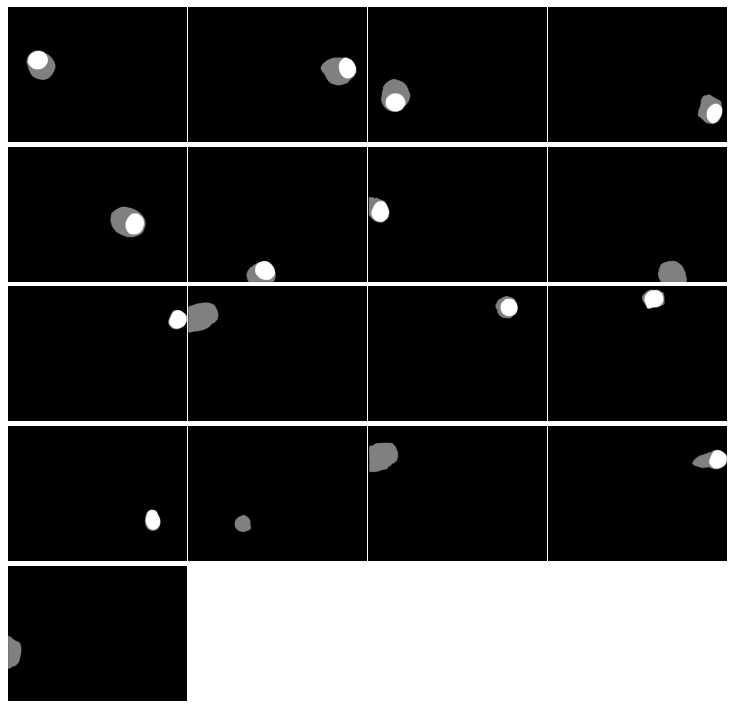

48 1953.bmp


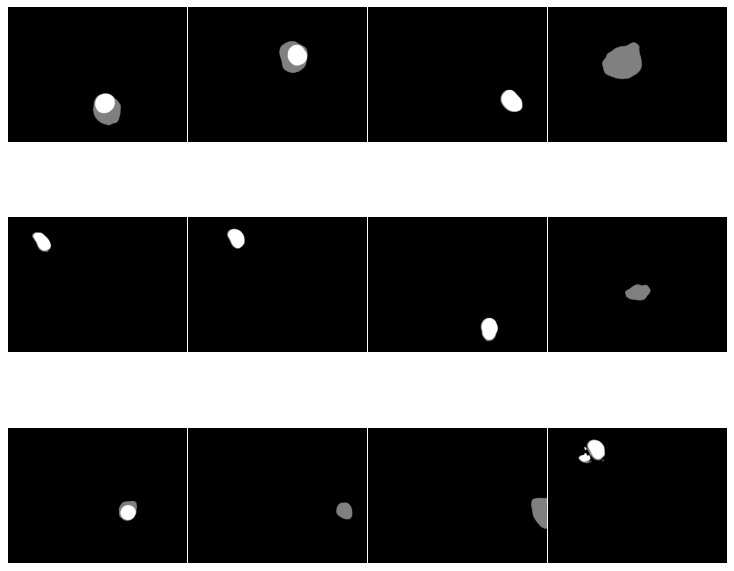

49 1968.bmp


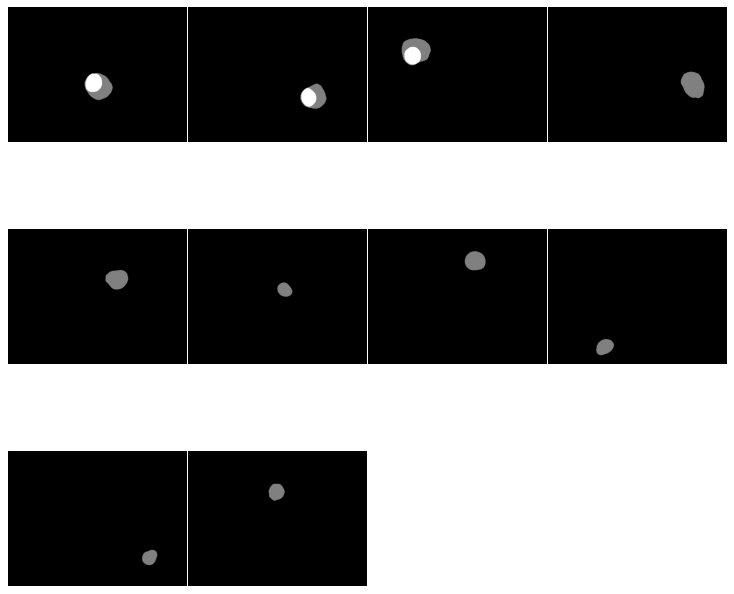

50 1969.bmp


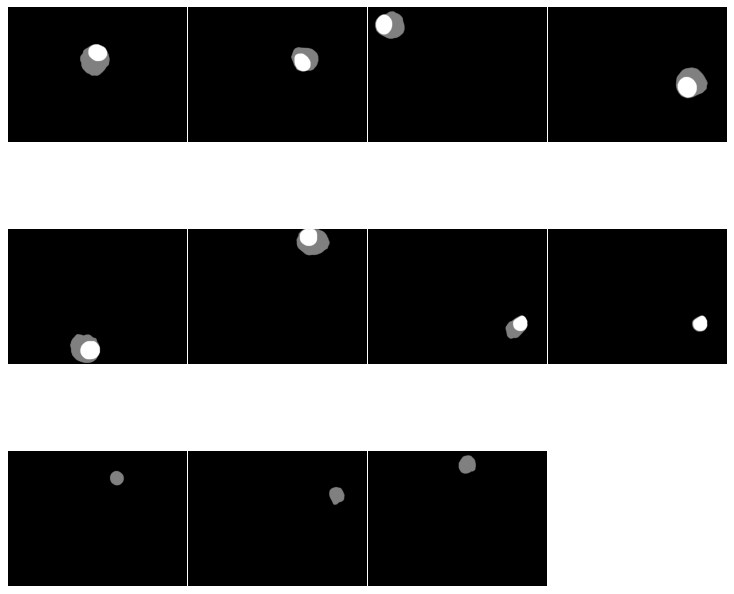

51 1974.bmp


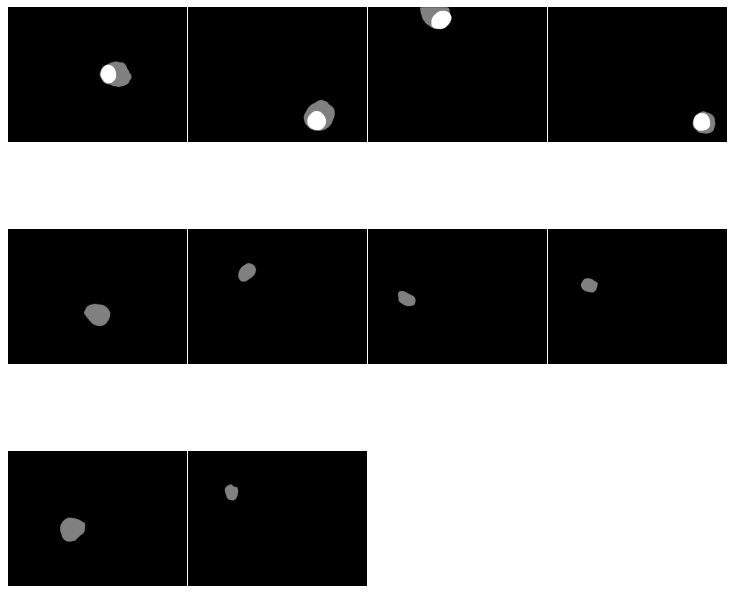

52 1975.bmp


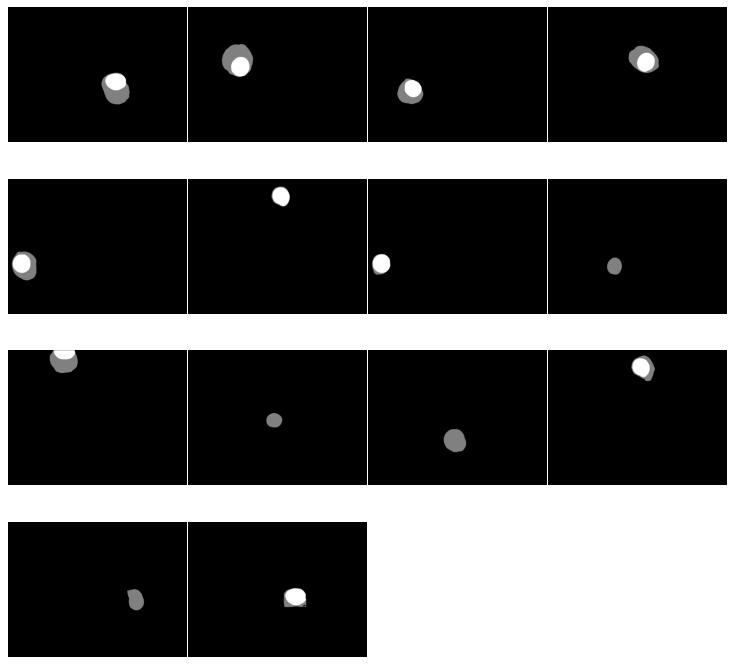

53 1976.bmp


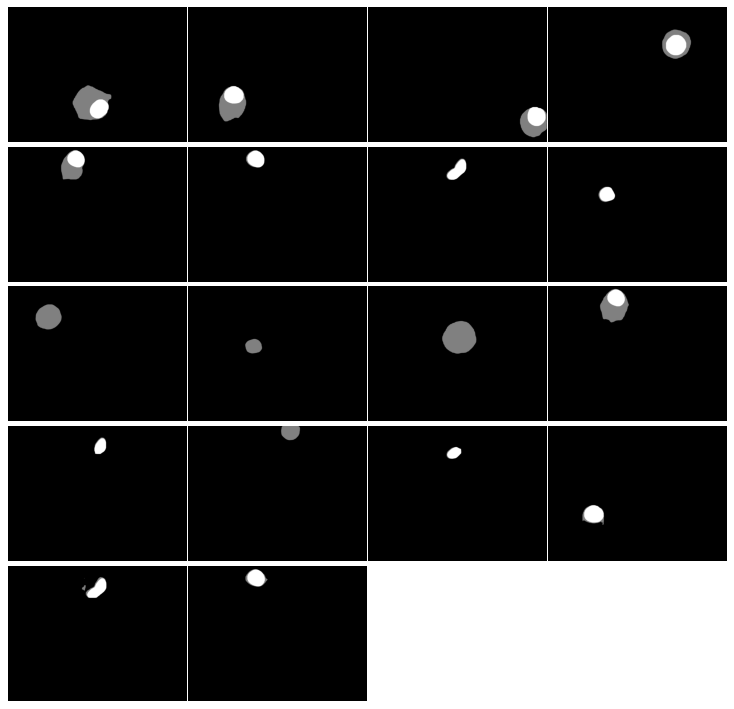

54 1986.bmp


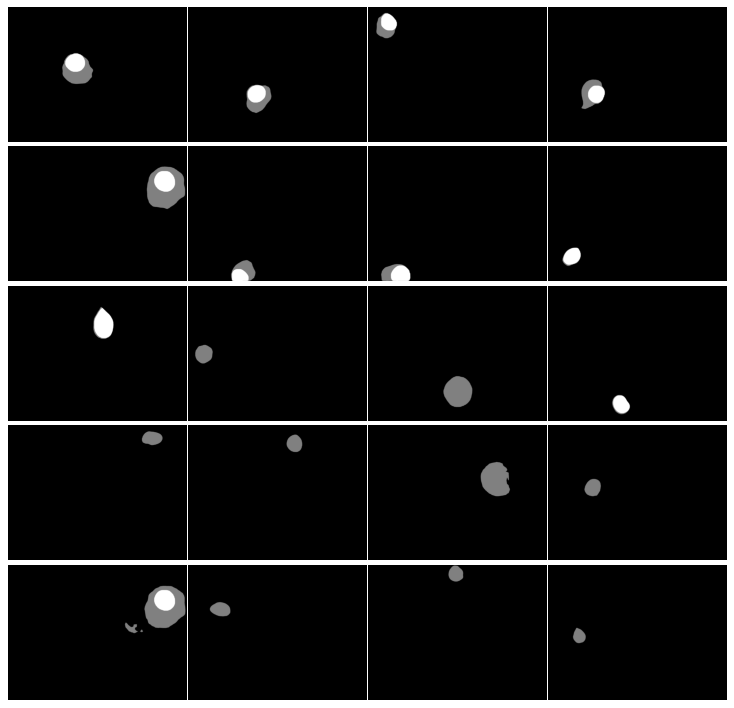

55 1988.bmp


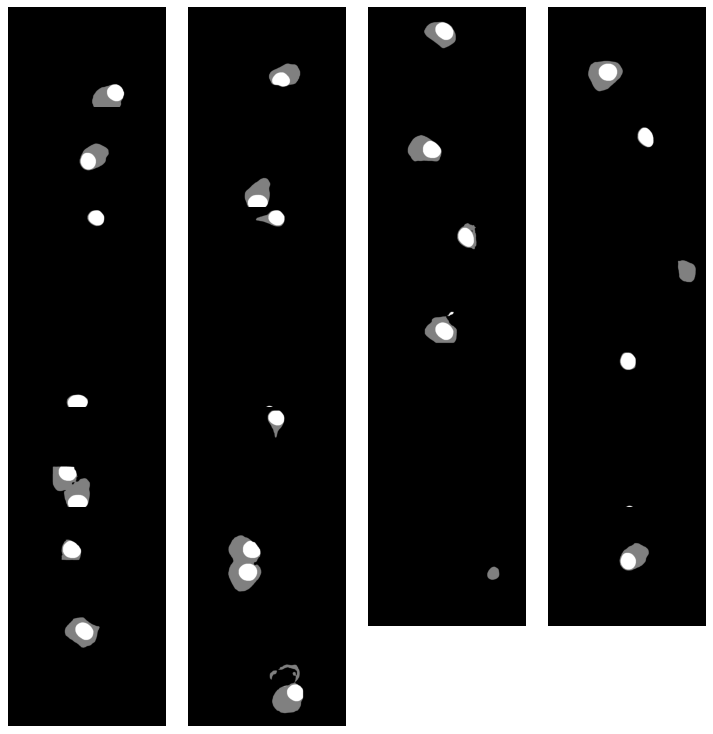

56 1995.bmp


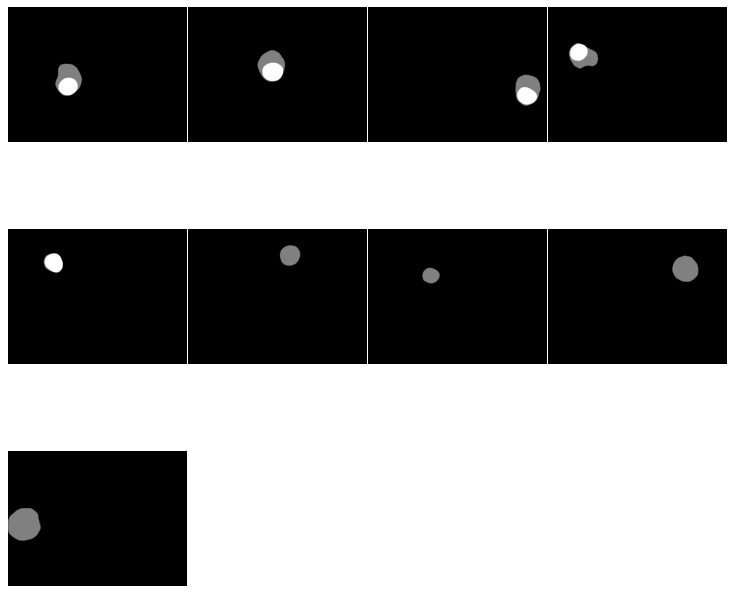

57 2006.bmp


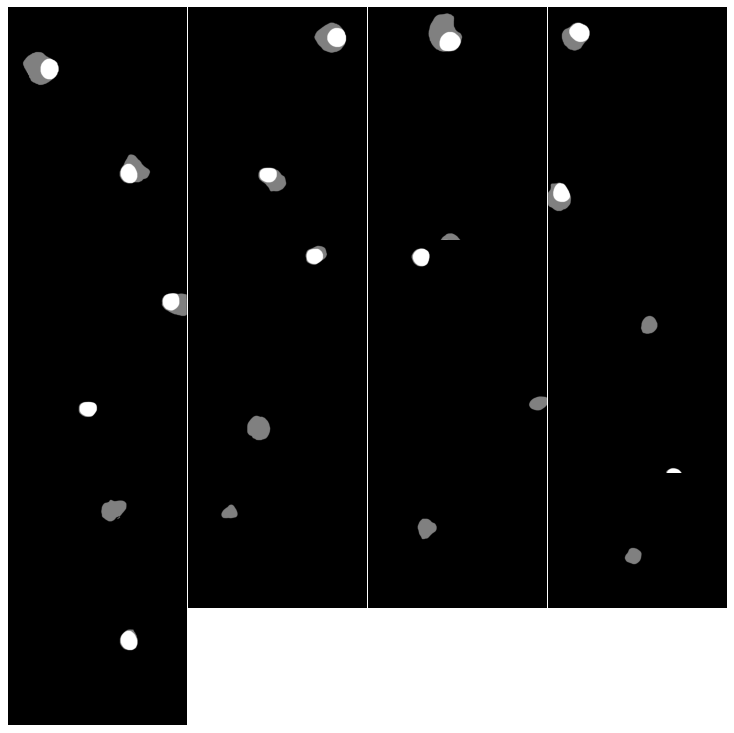

58 2014.bmp


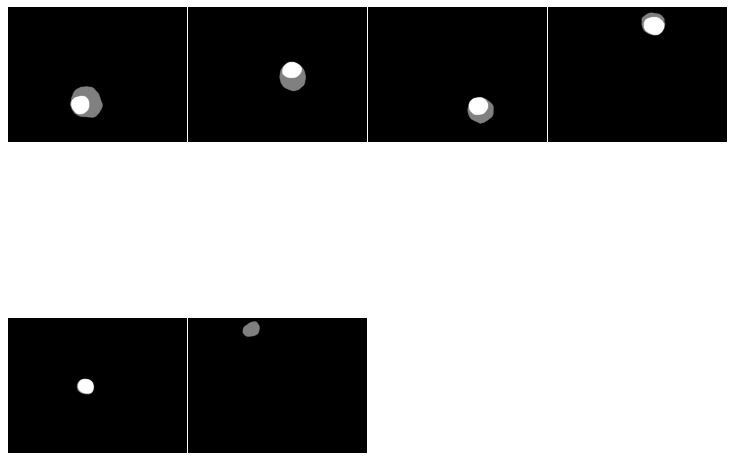

59 2016.bmp


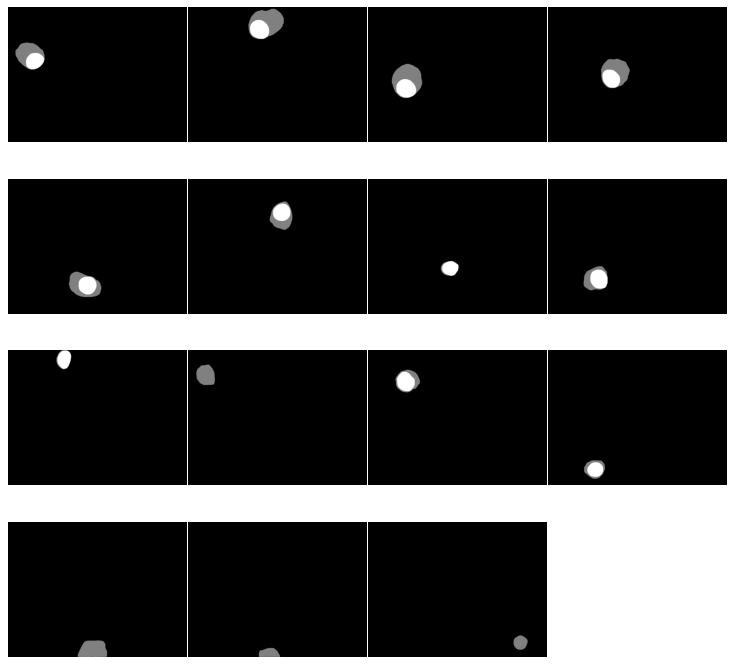

60 2028.bmp


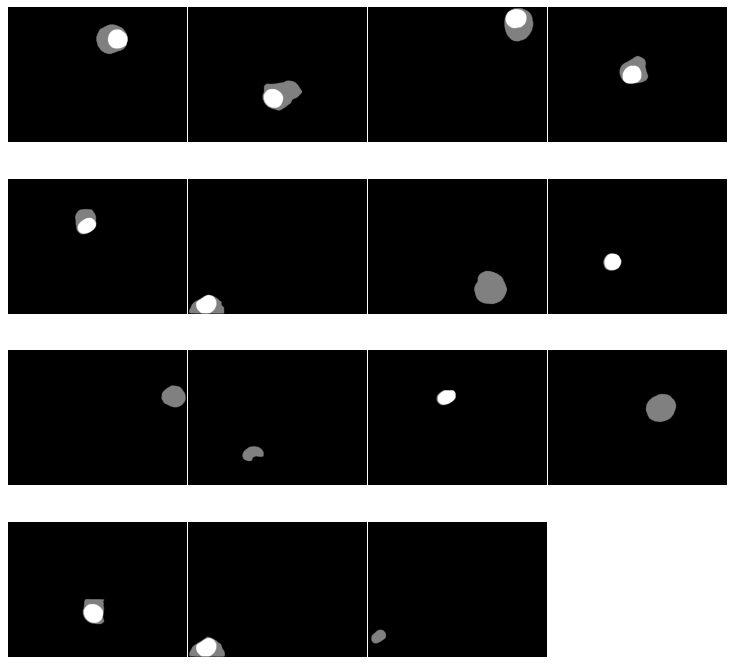

61 2030.bmp


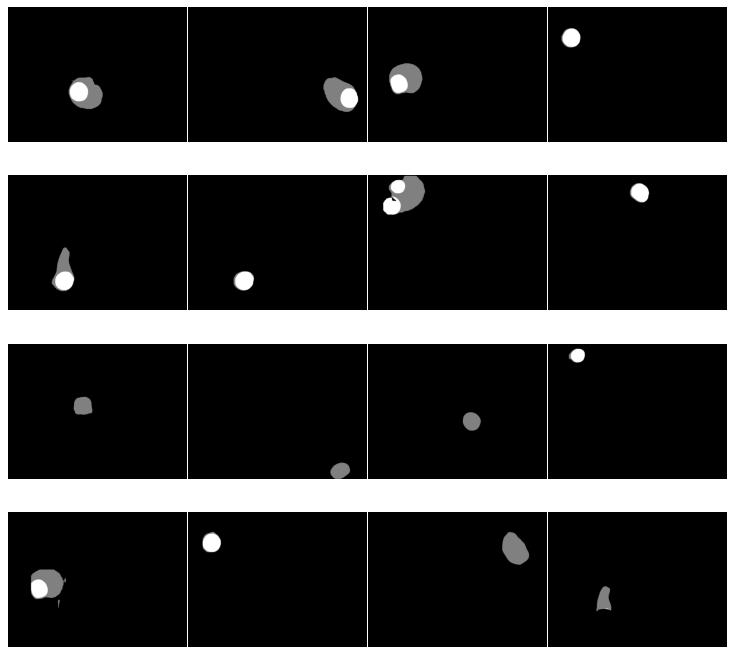

62 204.bmp


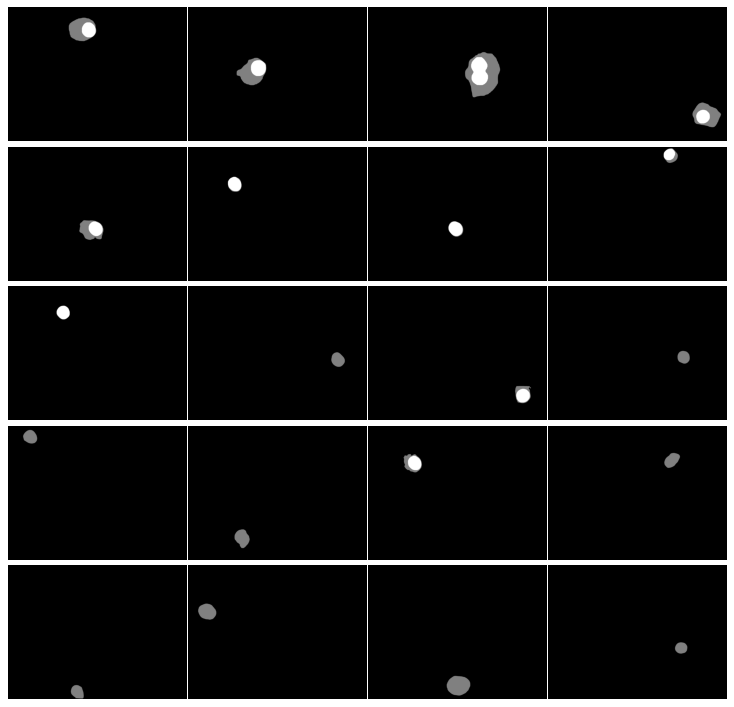

63 205.bmp


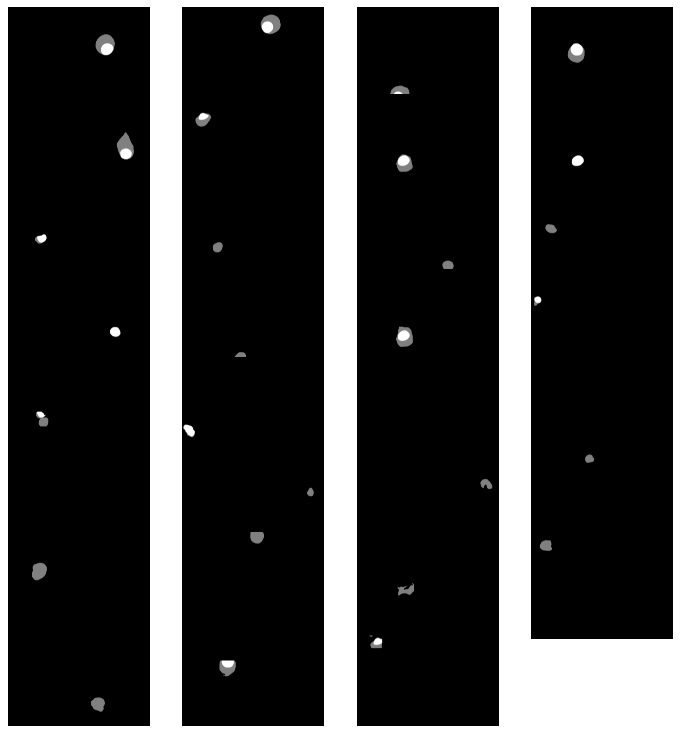

64 2061.bmp


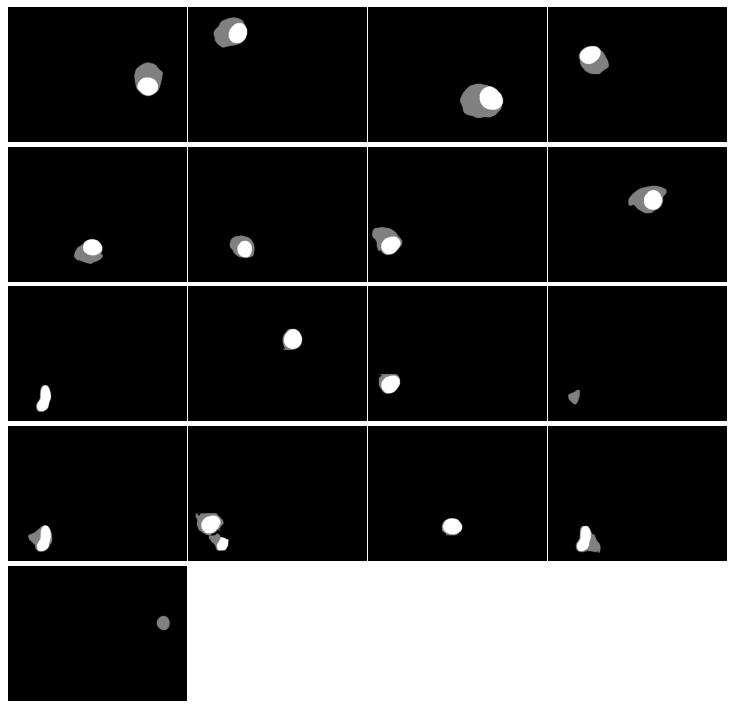

65 2065.bmp


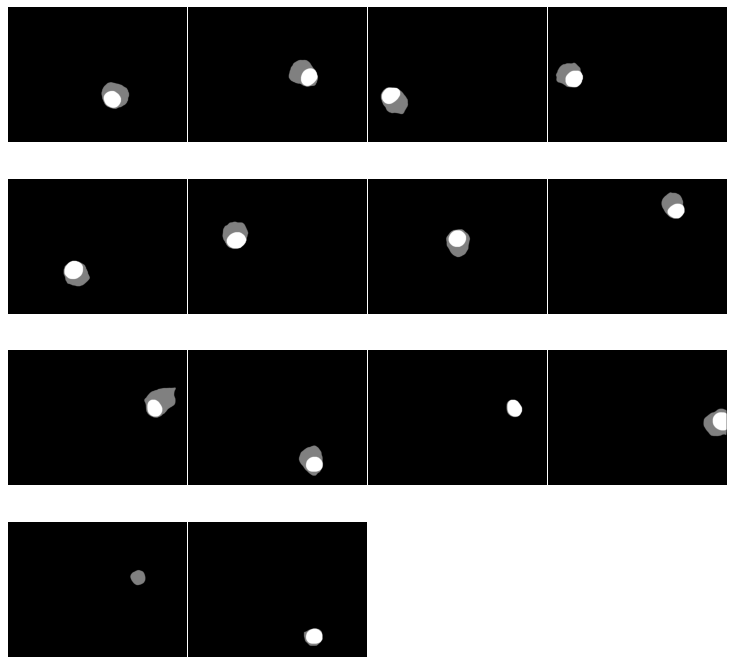

66 2077.bmp


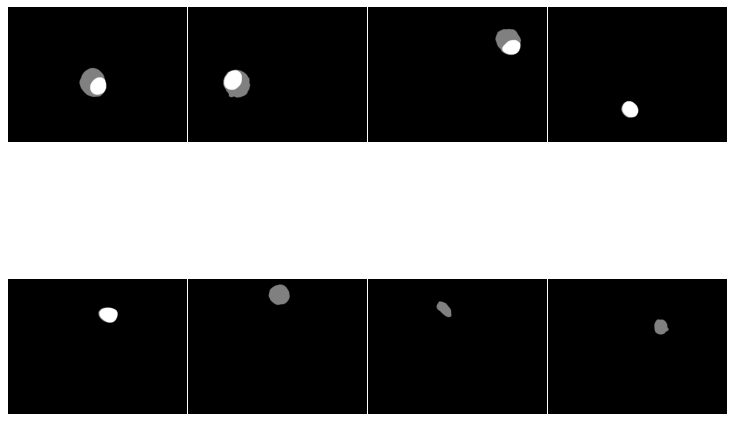

67 2079.bmp


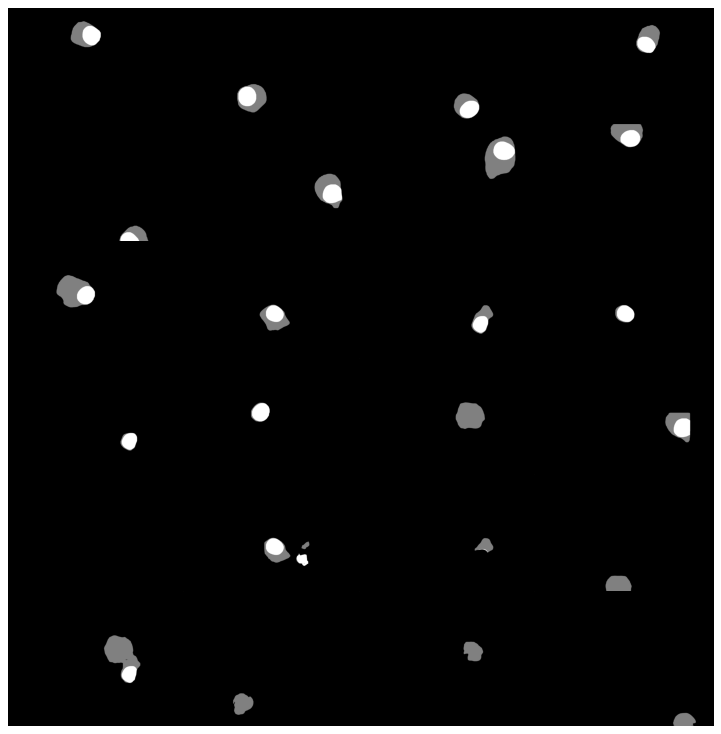

68 2084.bmp


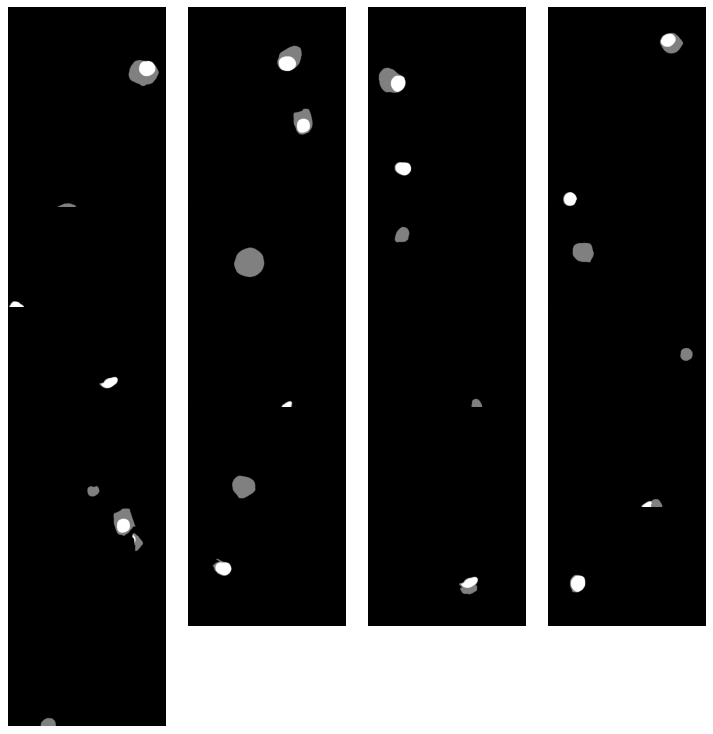

69 209.bmp


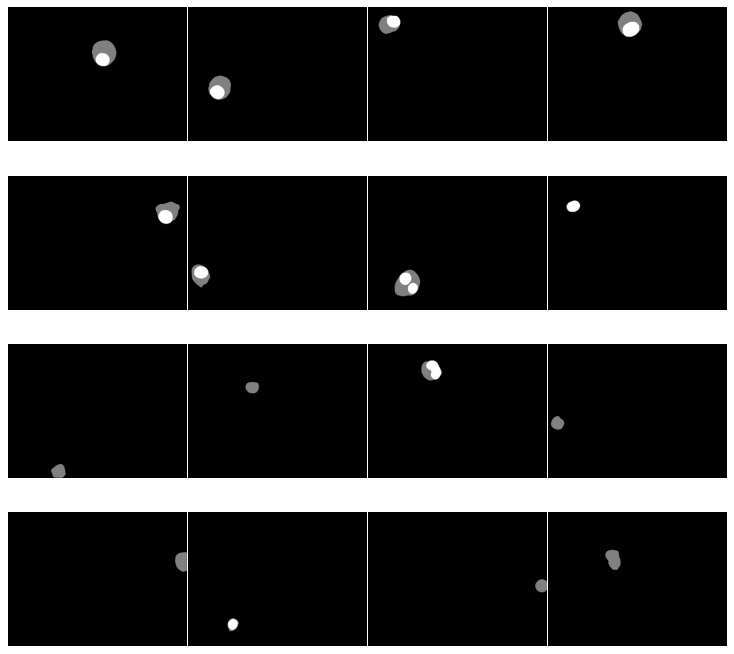

70 2102.bmp


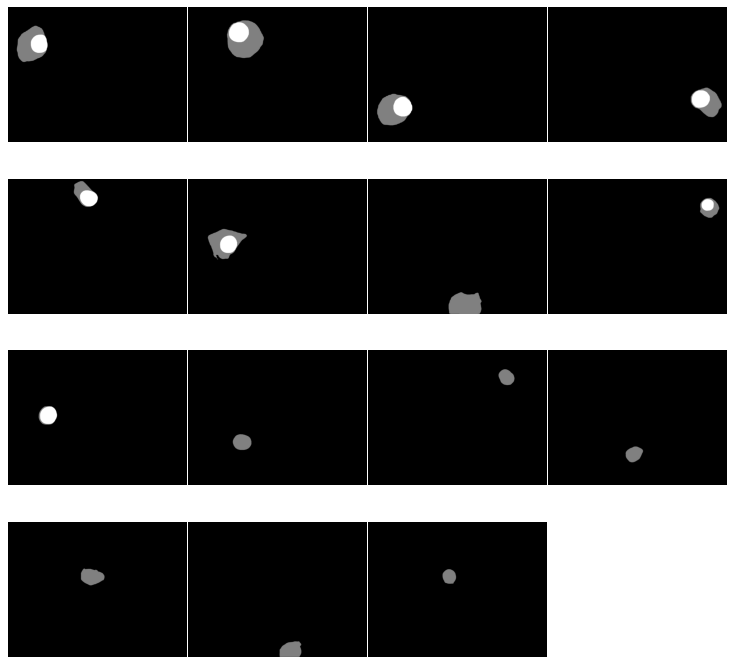

71 2103.bmp


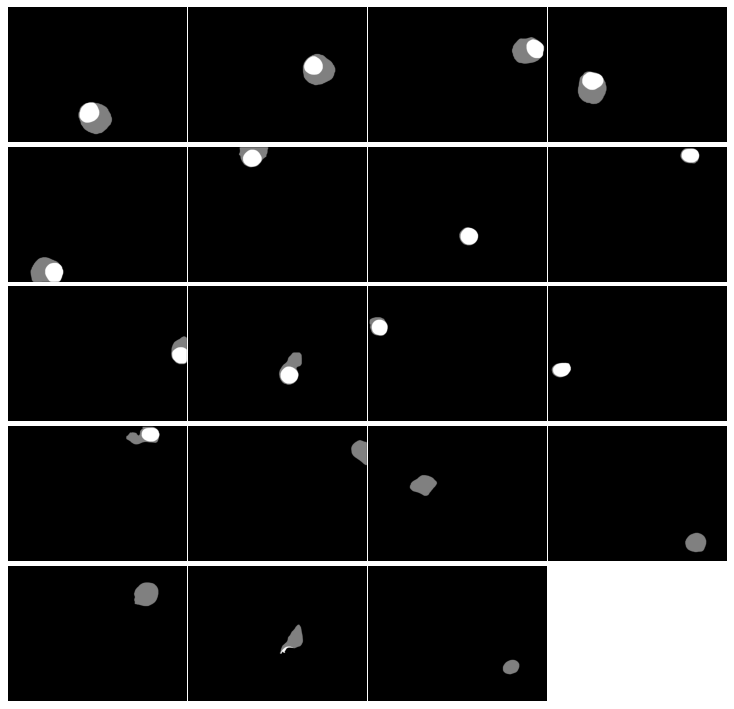

72 211.bmp


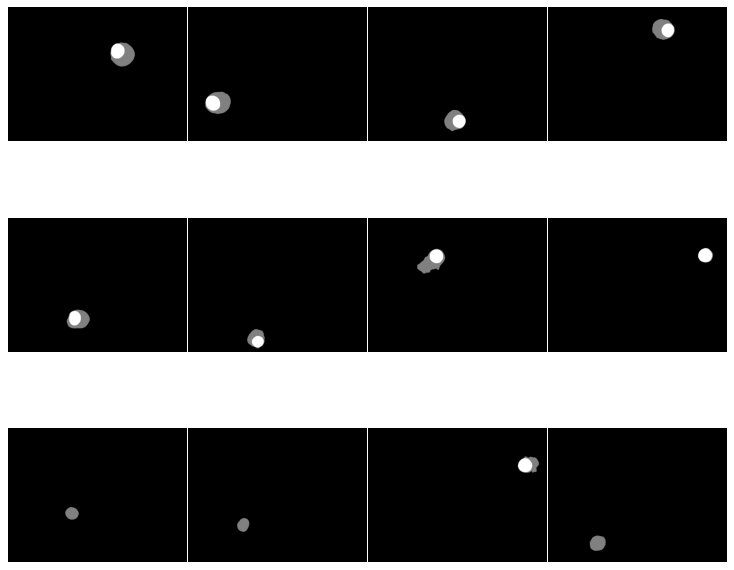

73 2113.bmp


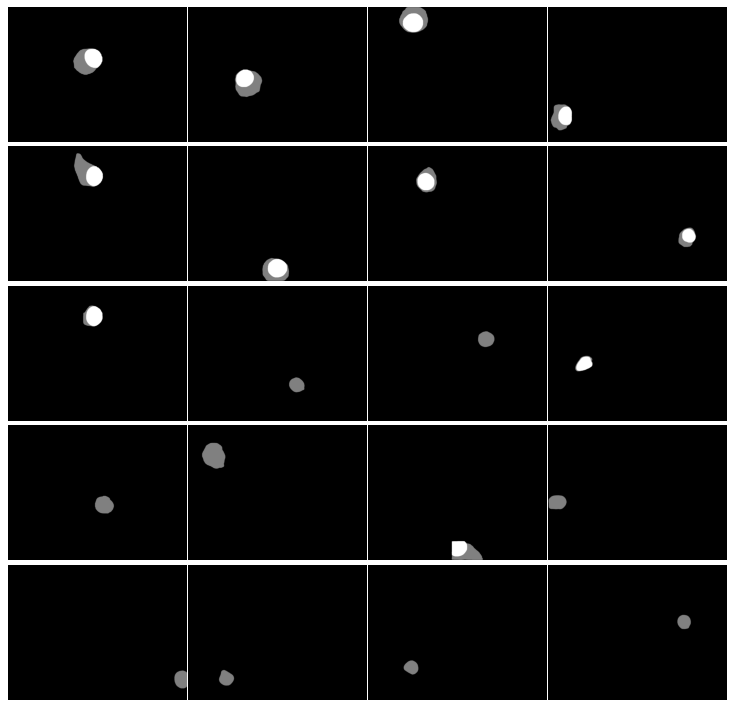

74 2114.bmp


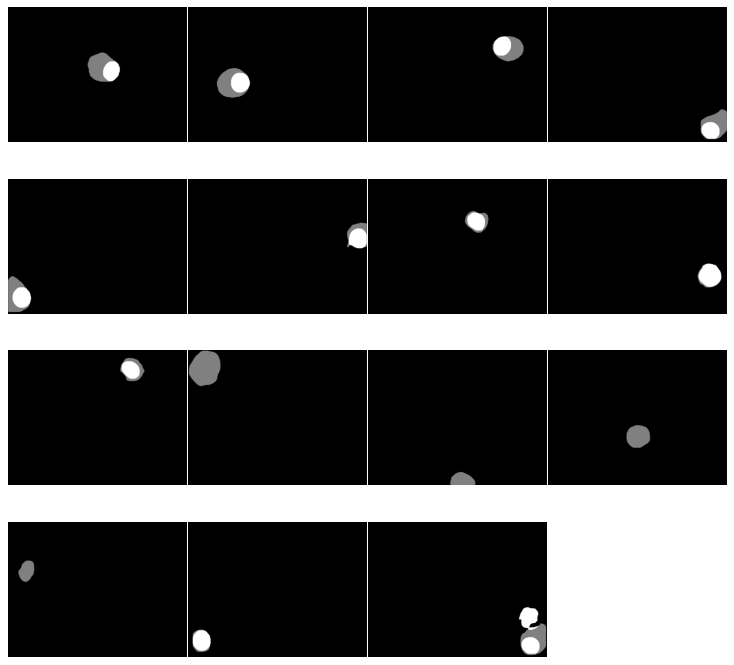

75 2115.bmp


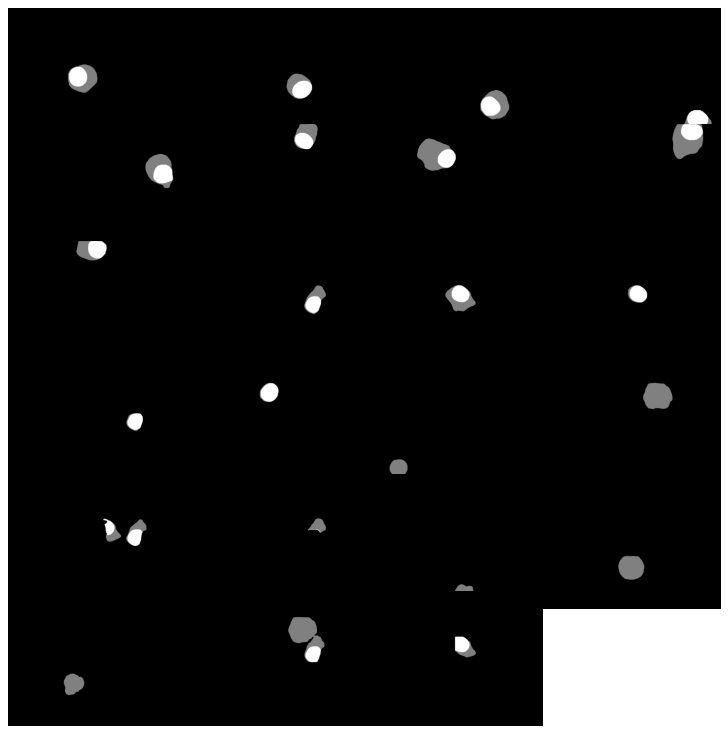

76 2119.bmp


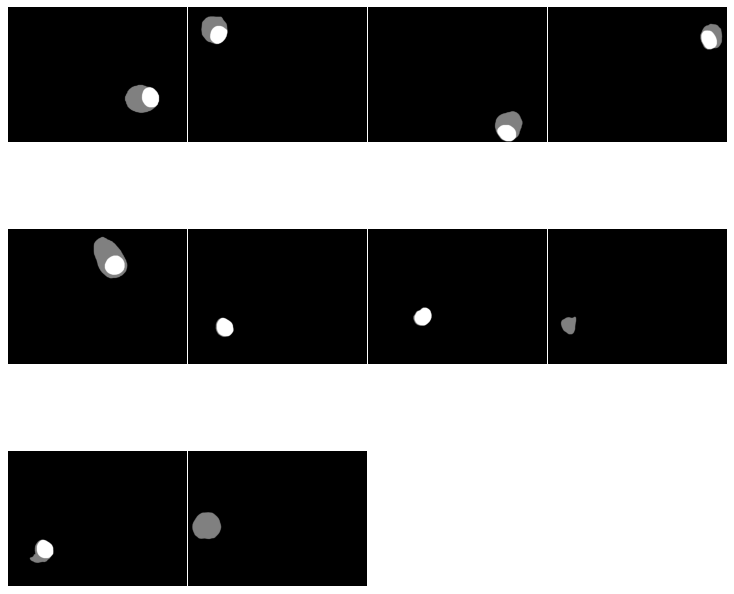

77 2120.bmp


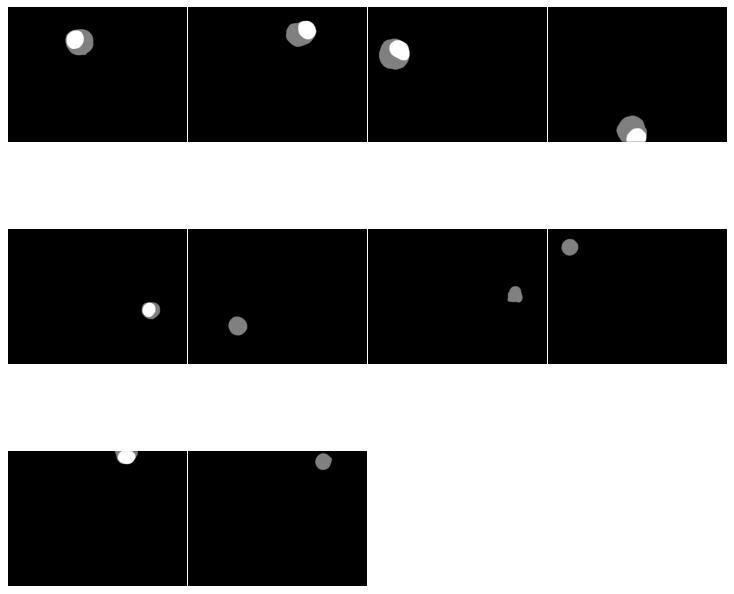

78 2123.bmp


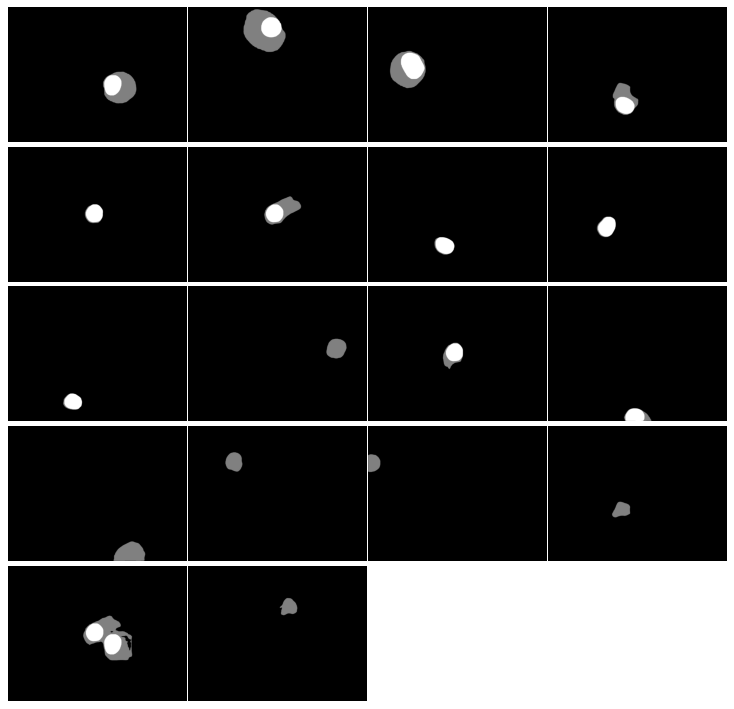

79 2124.bmp


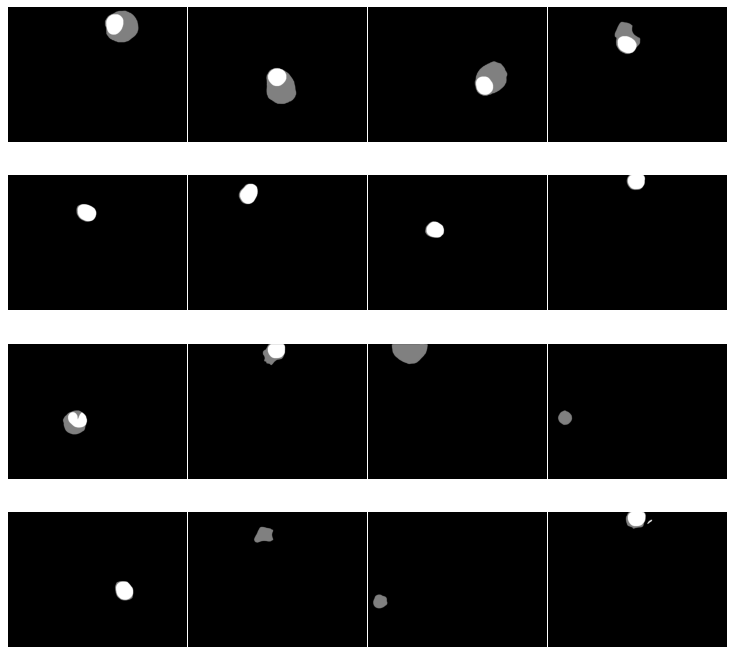

80 2126.bmp


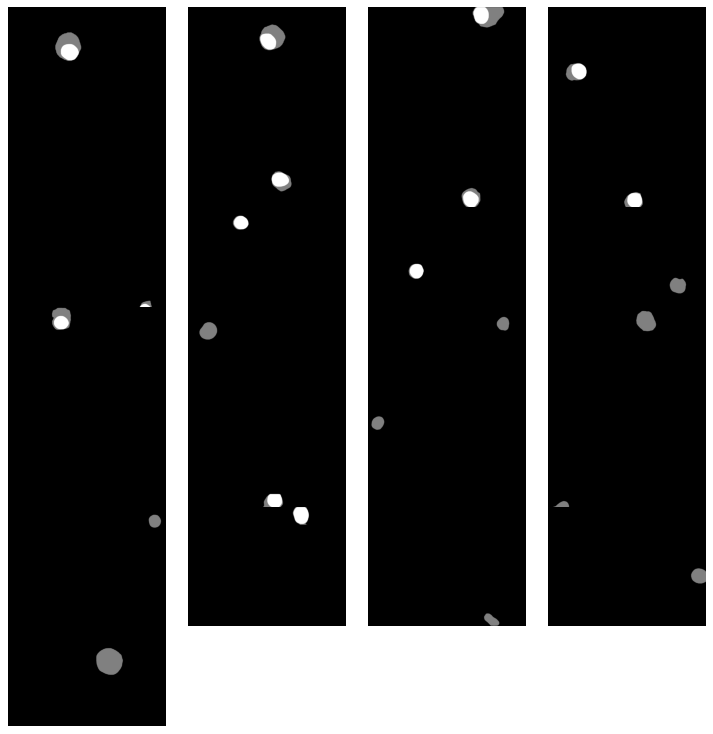

81 2127.bmp


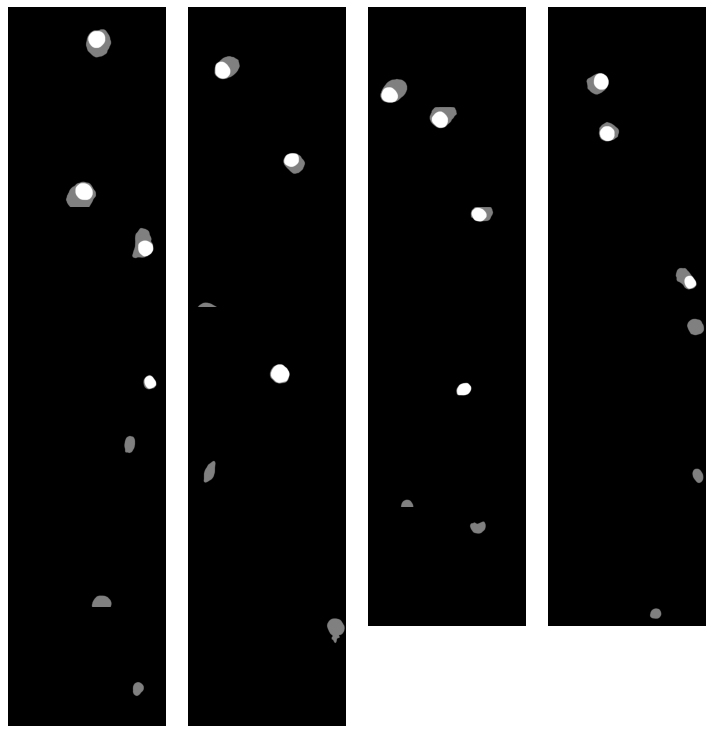

82 2131.bmp


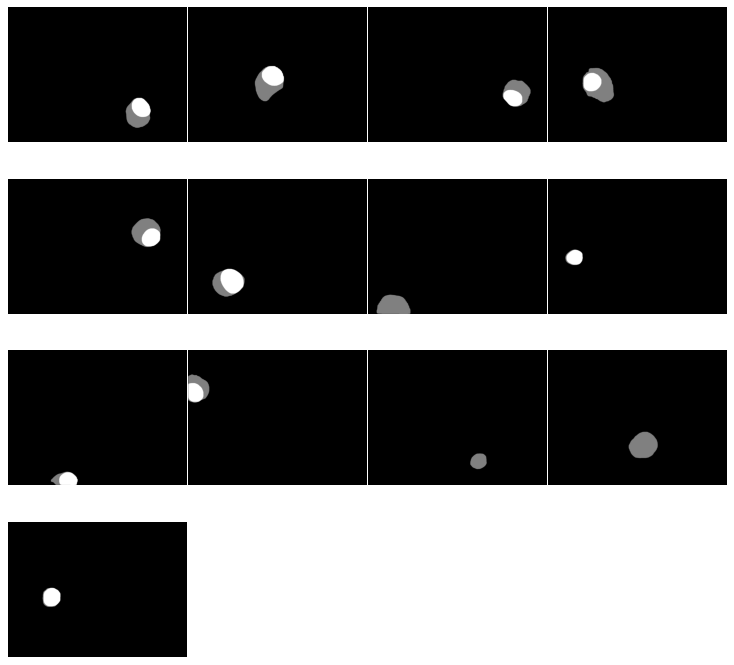

83 2133.bmp


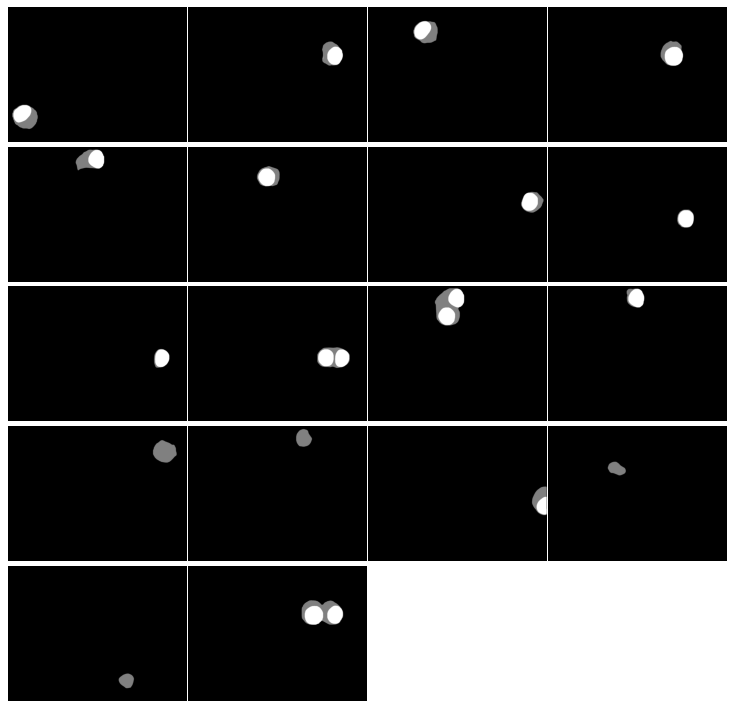

84 2134.bmp


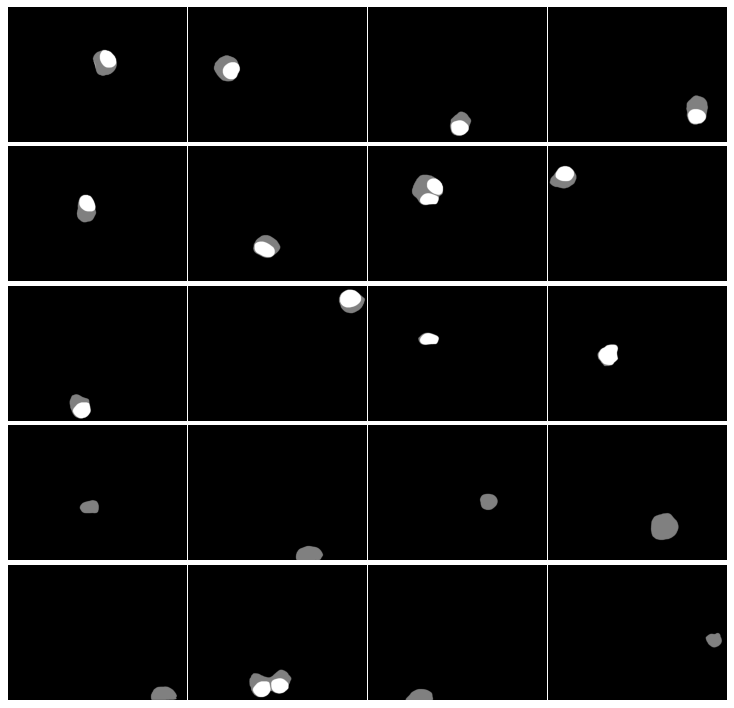

85 2155.bmp


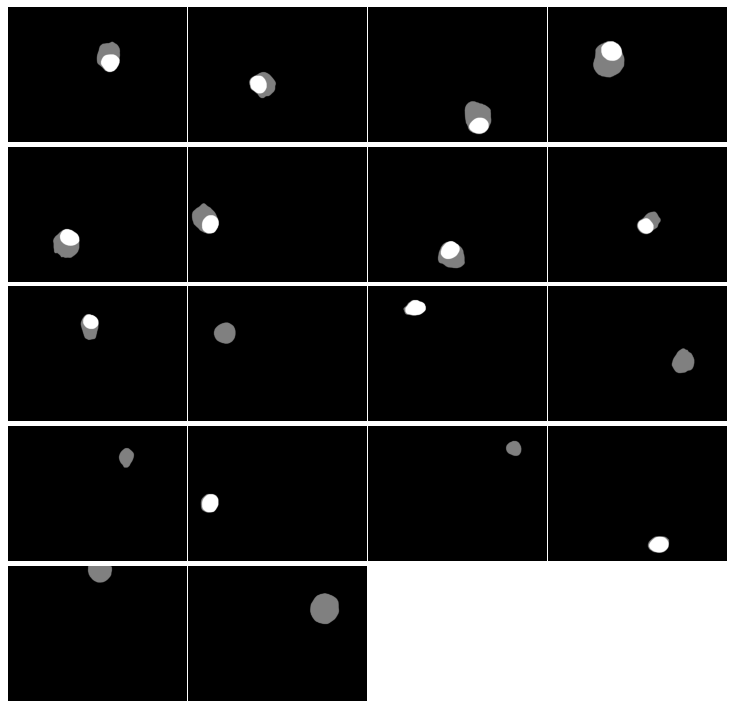

86 2164.bmp


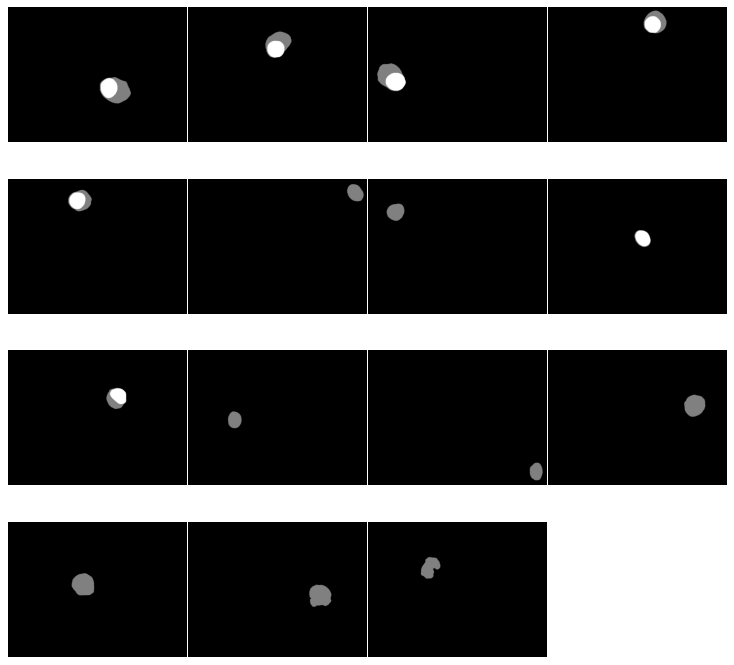

87 2165.bmp


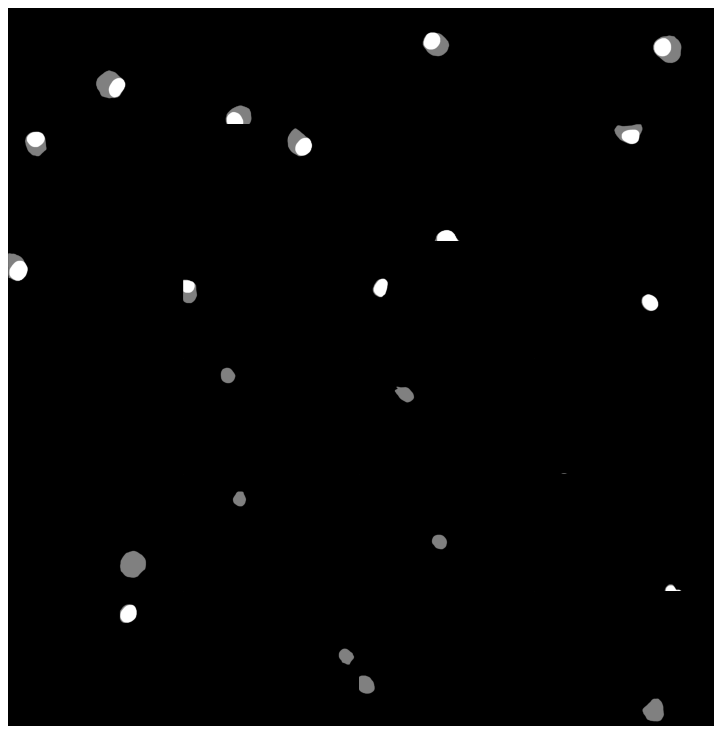

88 2168.bmp


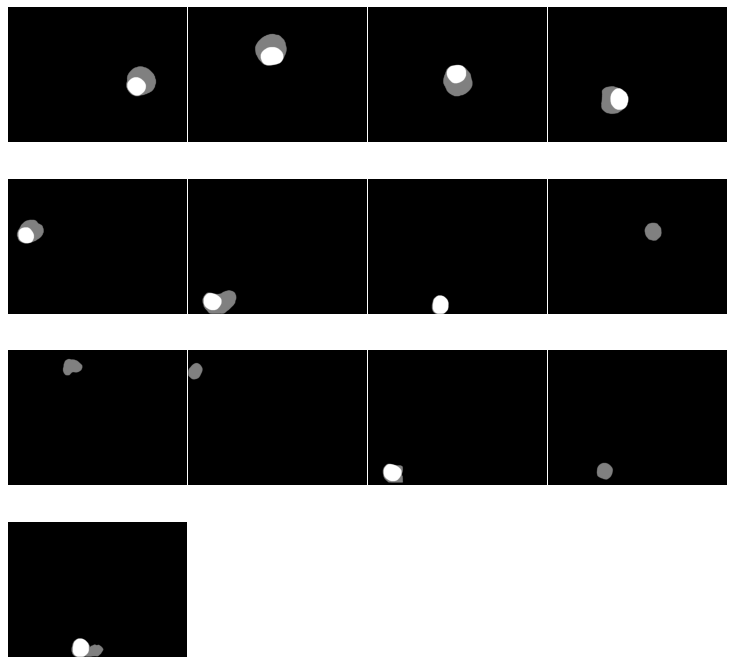

89 2169.bmp


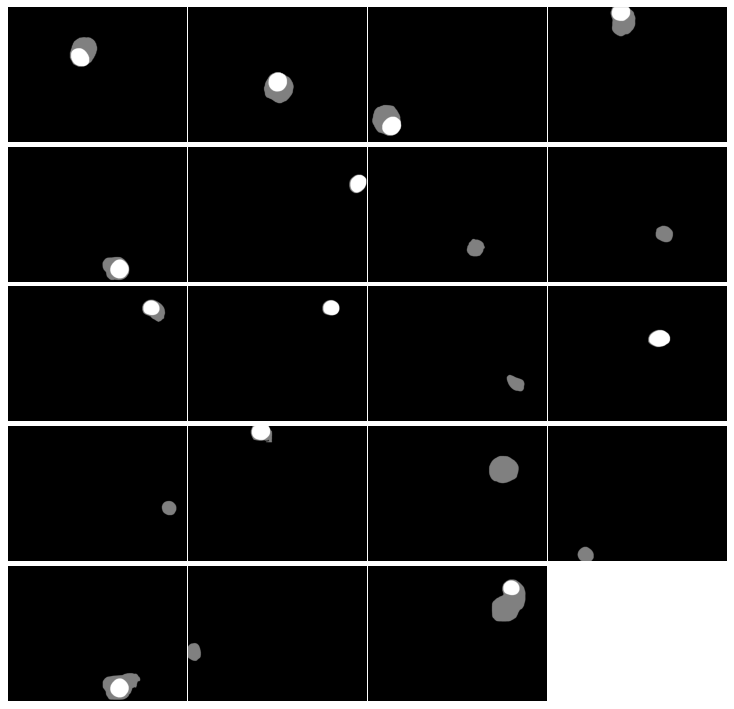

90 2173.bmp


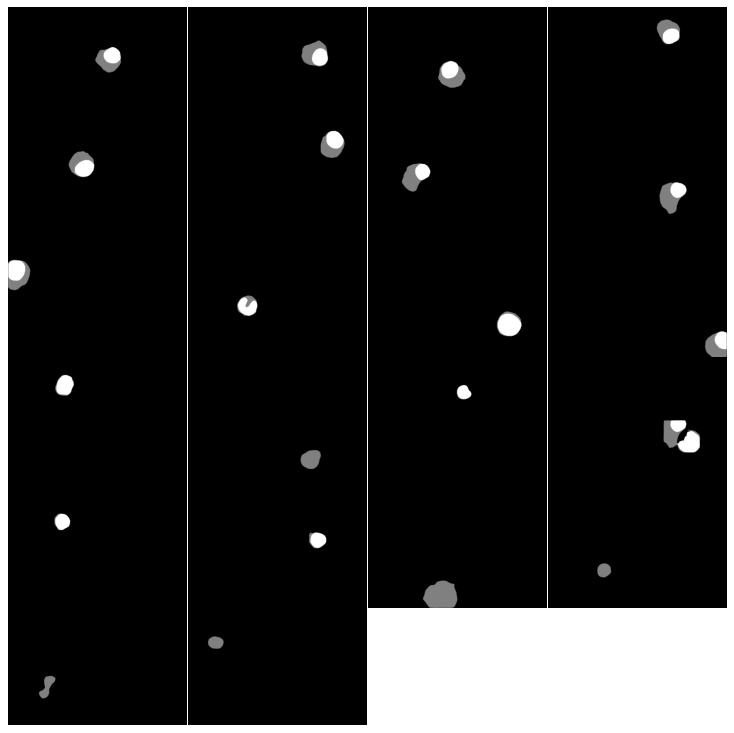

91 2181.bmp


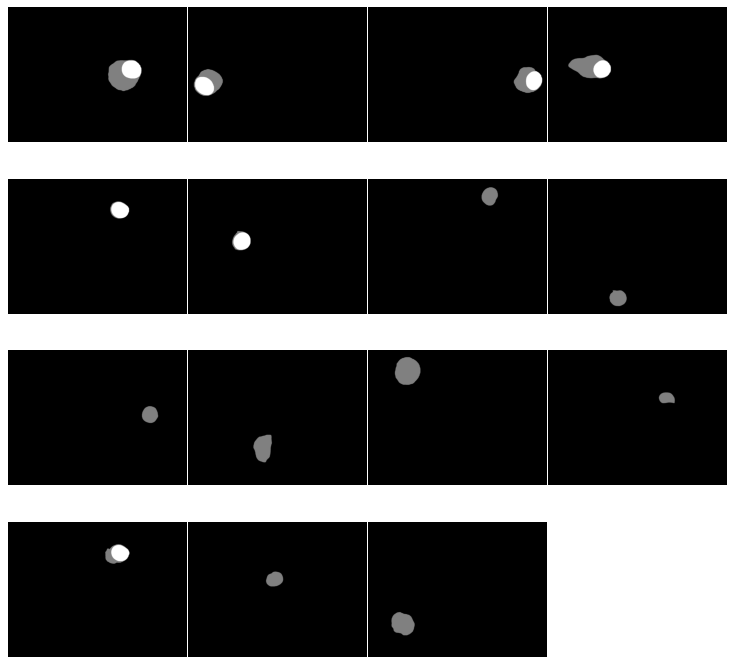

92 2201.bmp


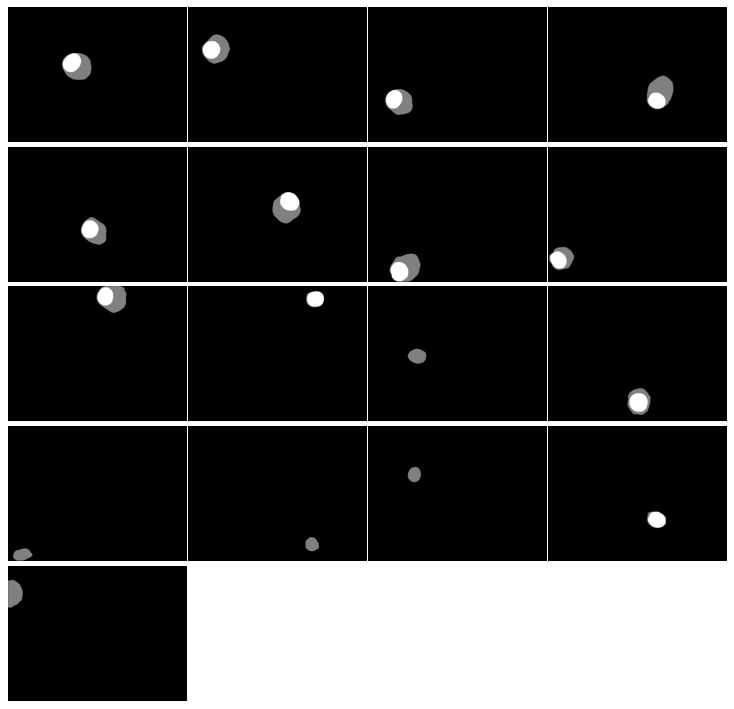

93 2203.bmp


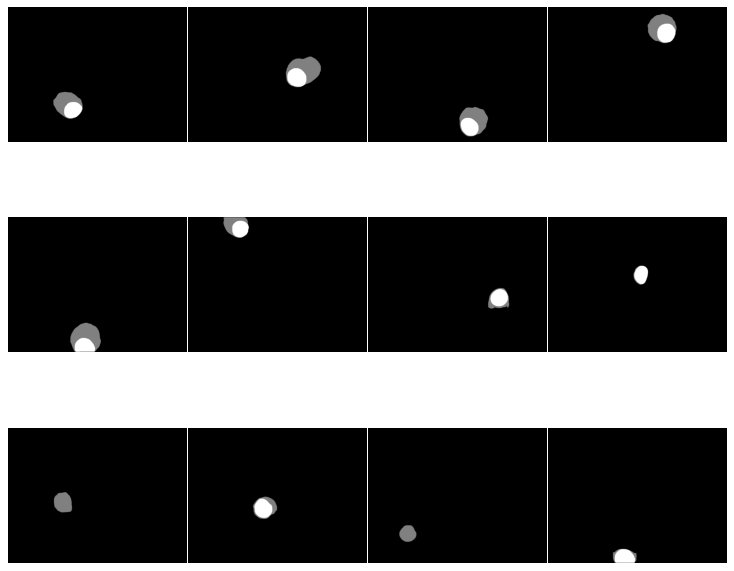

94 2204.bmp


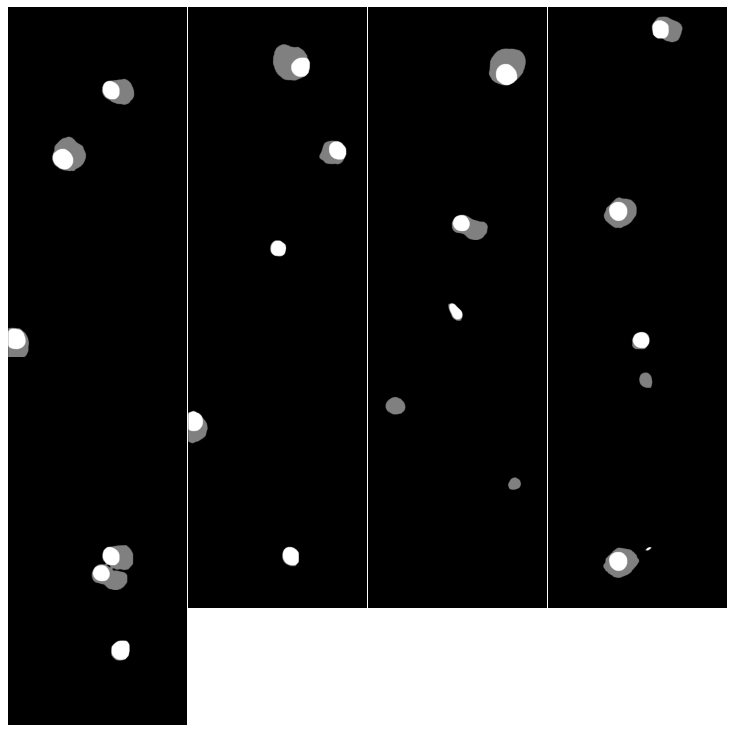

95 2218.bmp


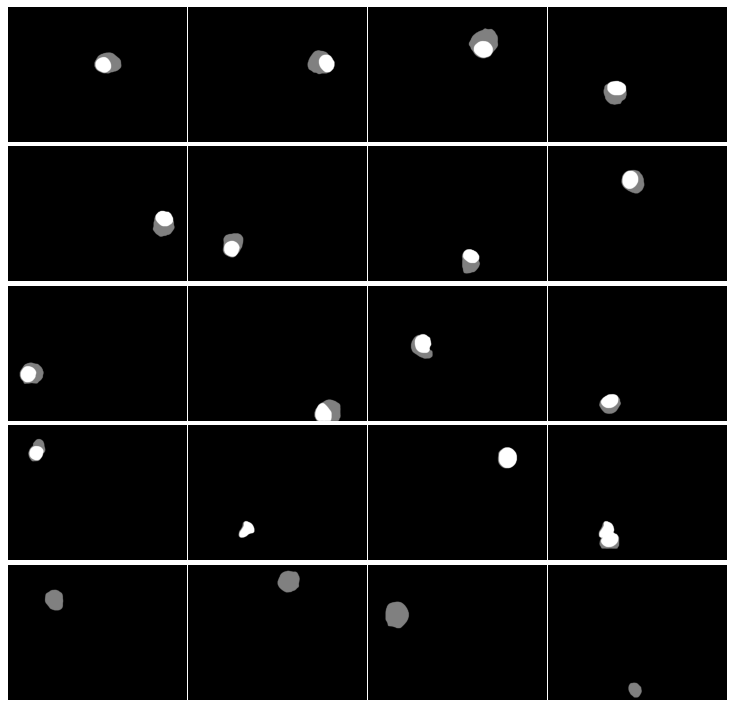

96 2219.bmp


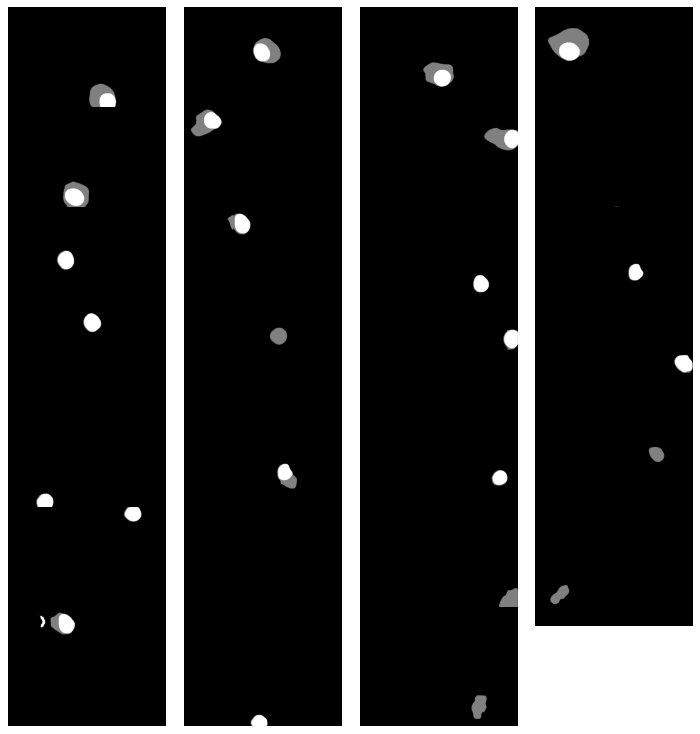

97 2220.bmp


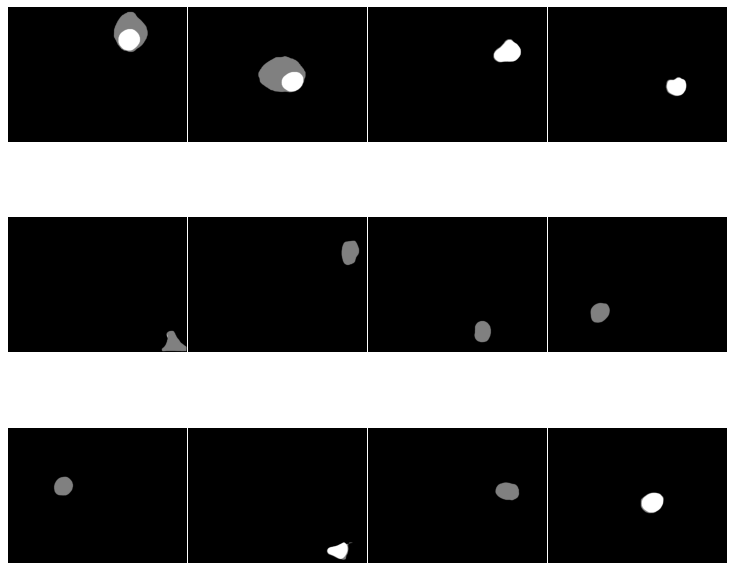

98 2232.bmp


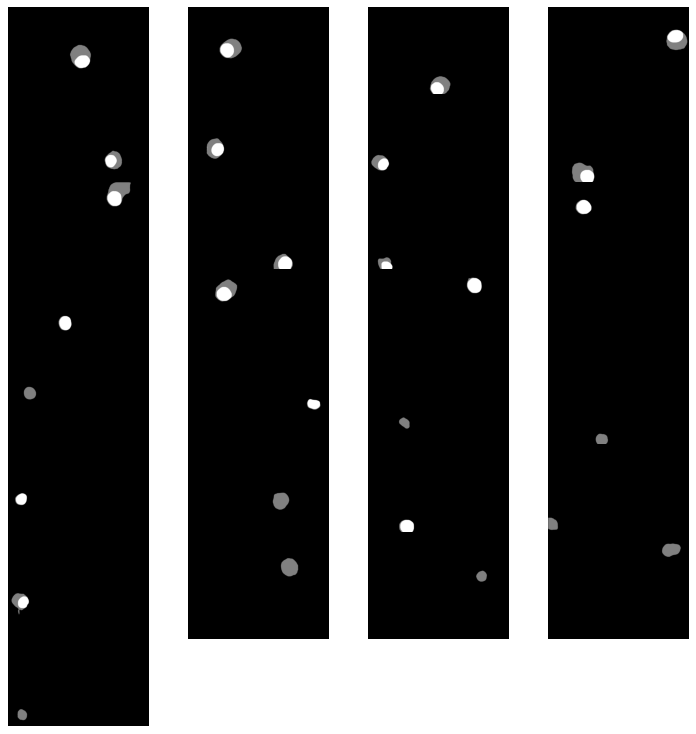

99 2235.bmp


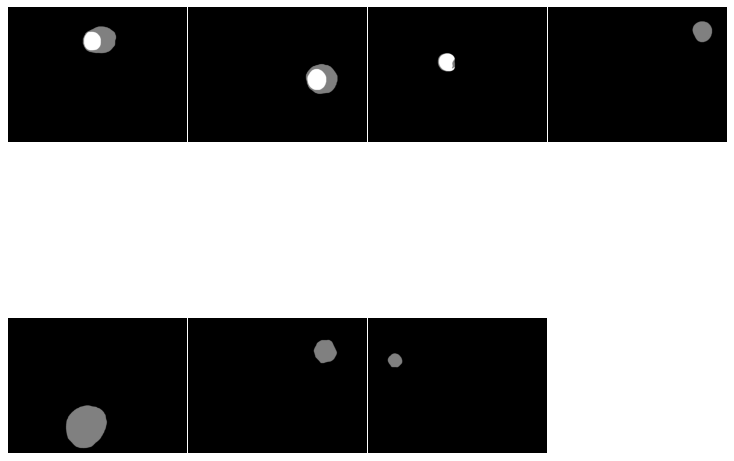

100 2247.bmp


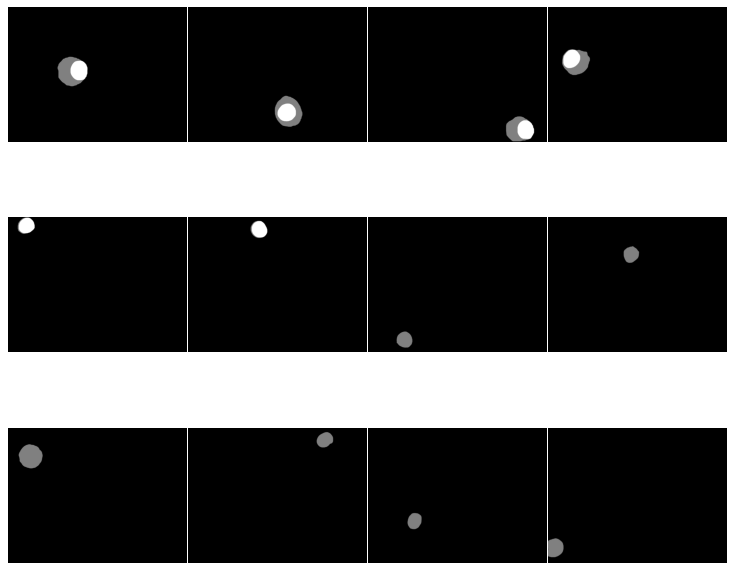

101 2249.bmp


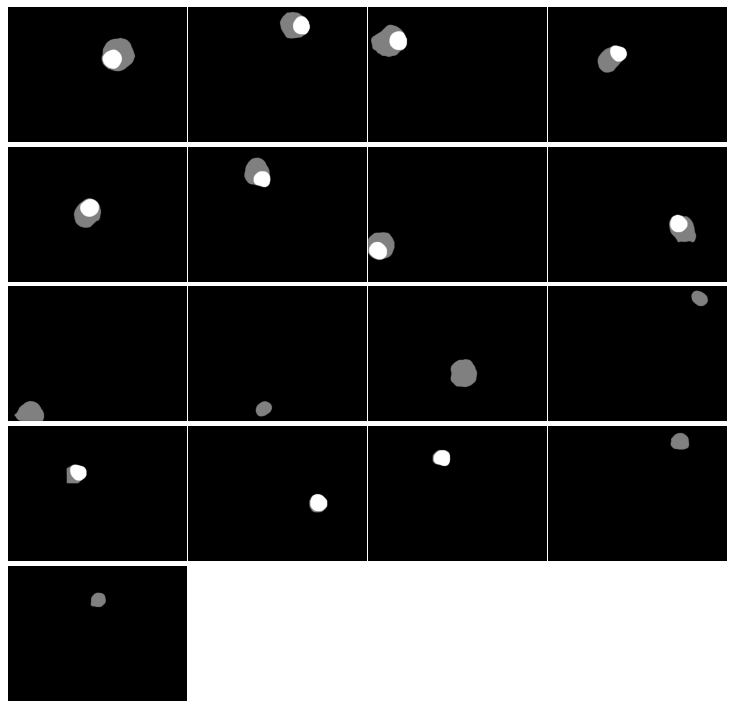

102 2256.bmp


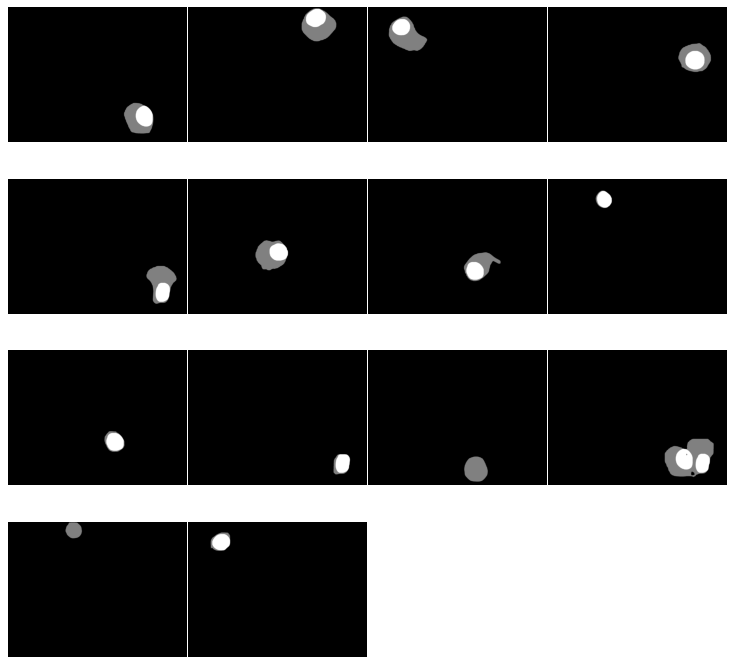

103 2259.bmp


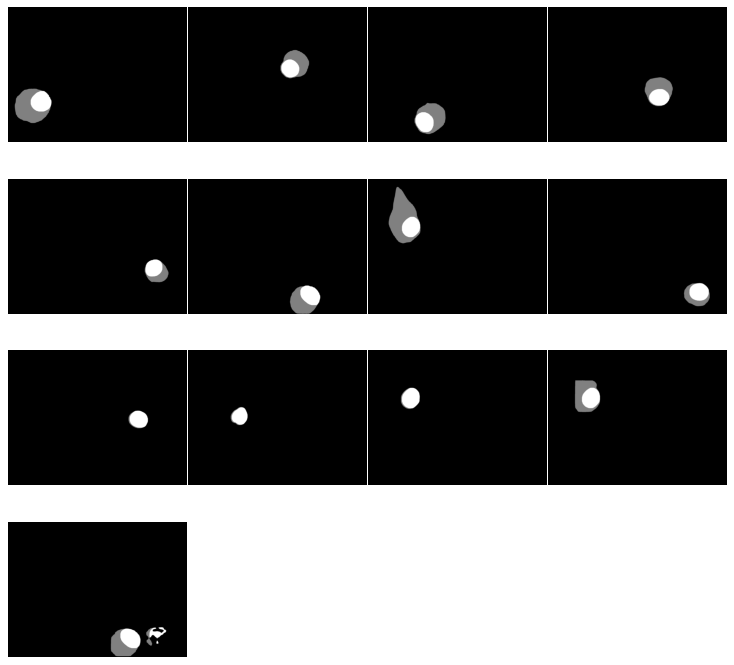

104 2260.bmp


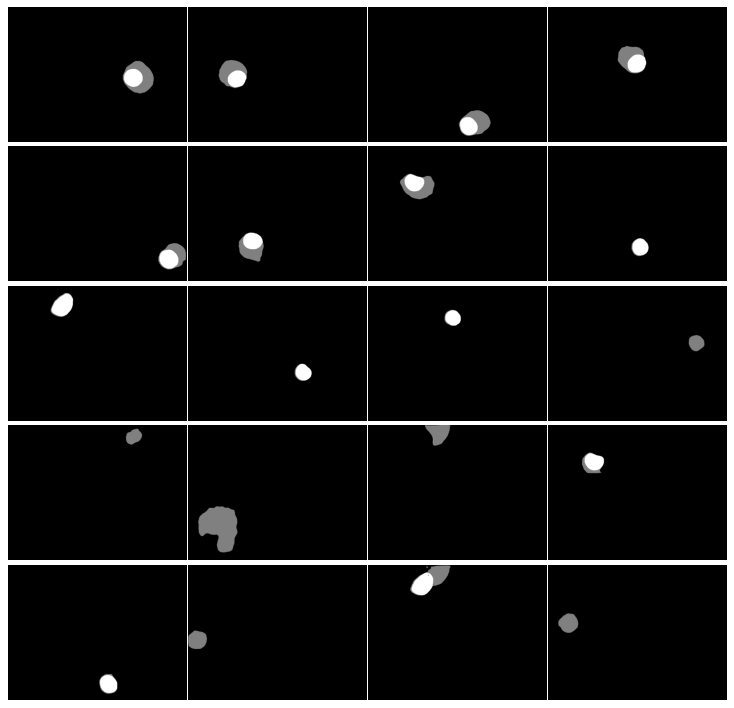

105 2279.bmp


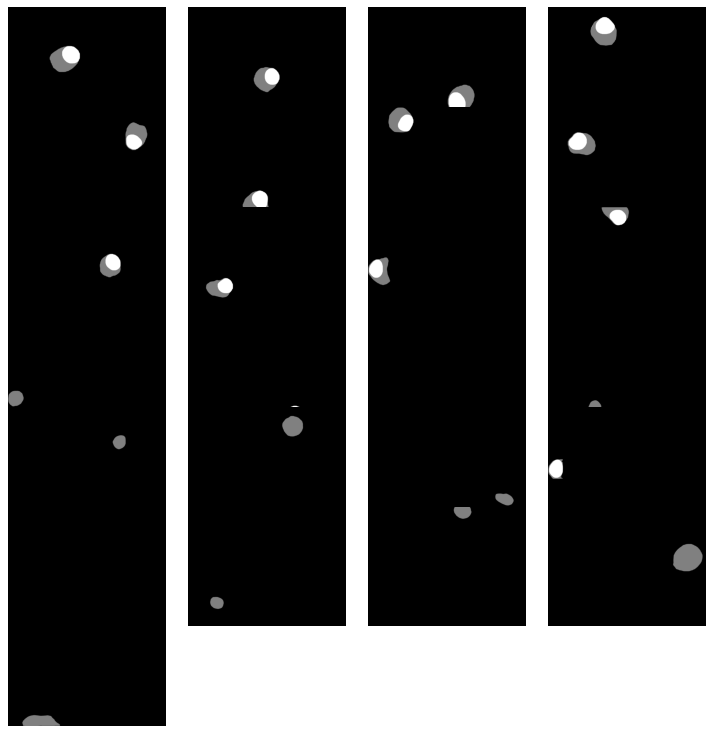

106 2283.bmp


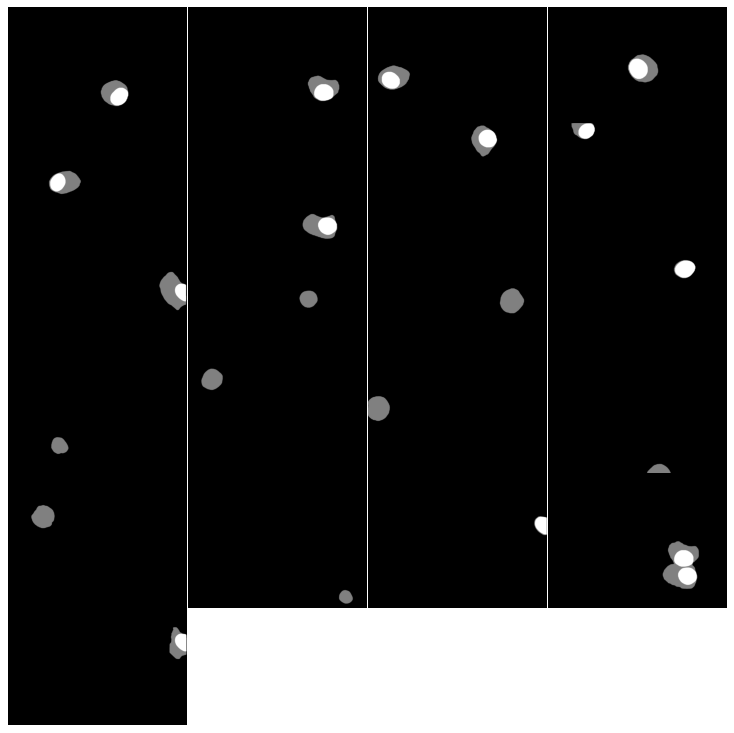

107 2293.bmp


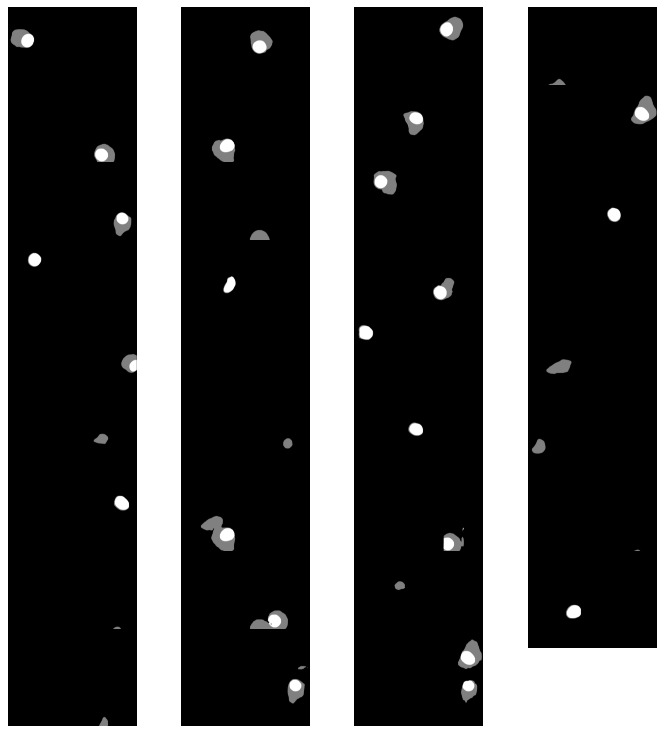

108 2294.bmp


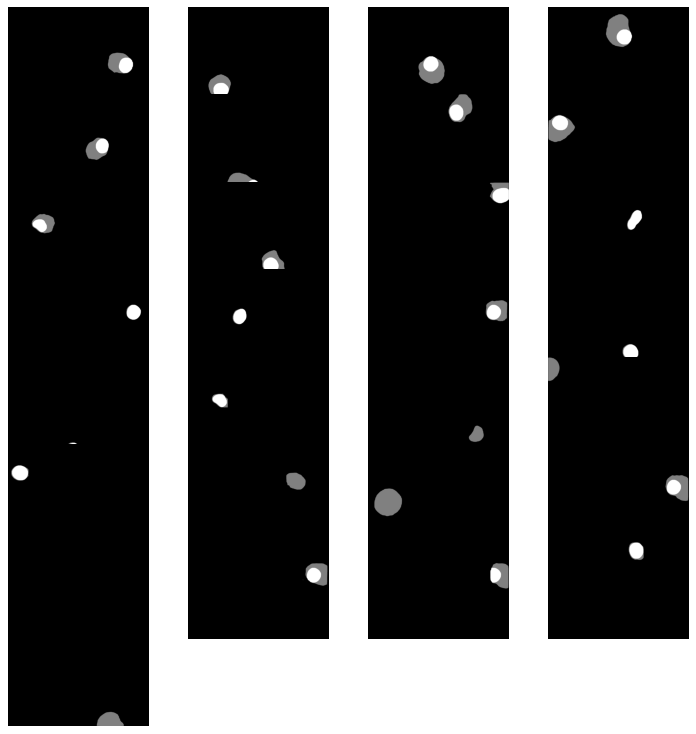

109 2300.bmp


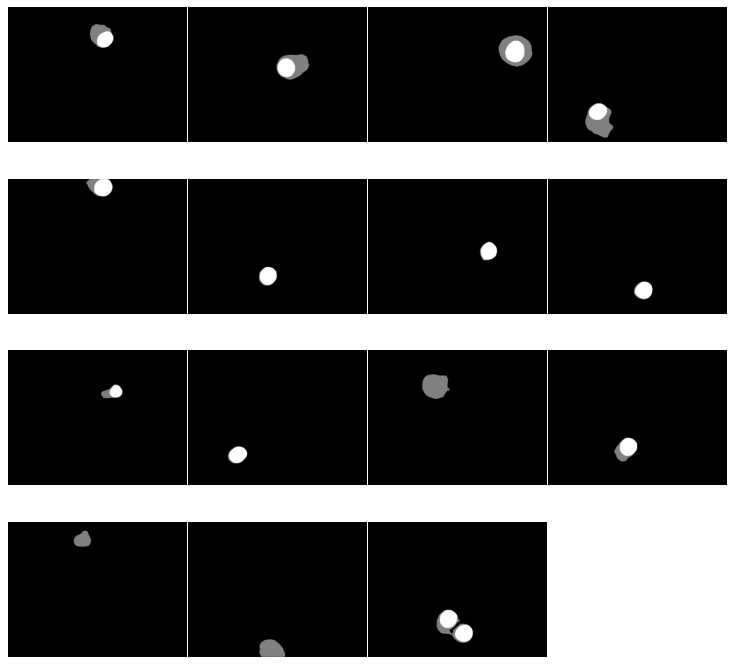

110 2303.bmp


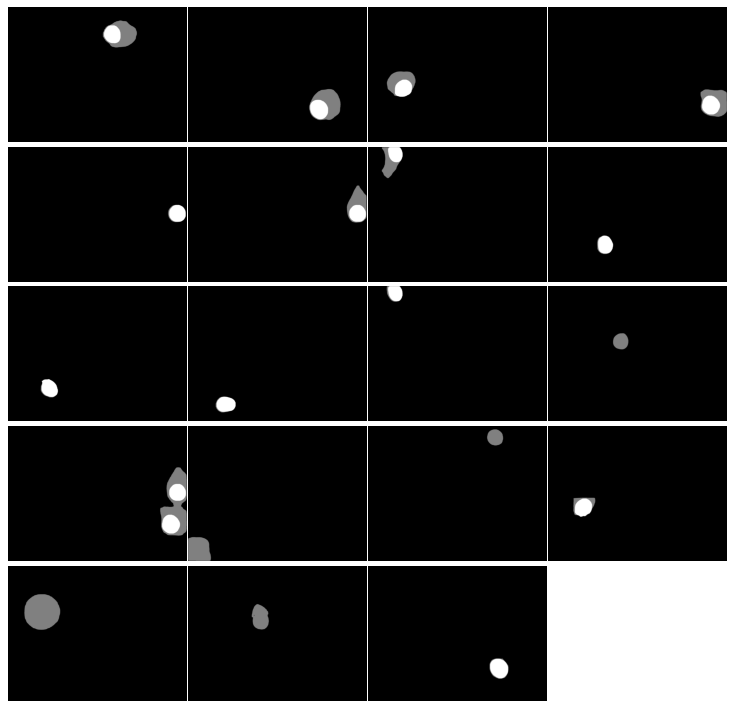

111 2316.bmp


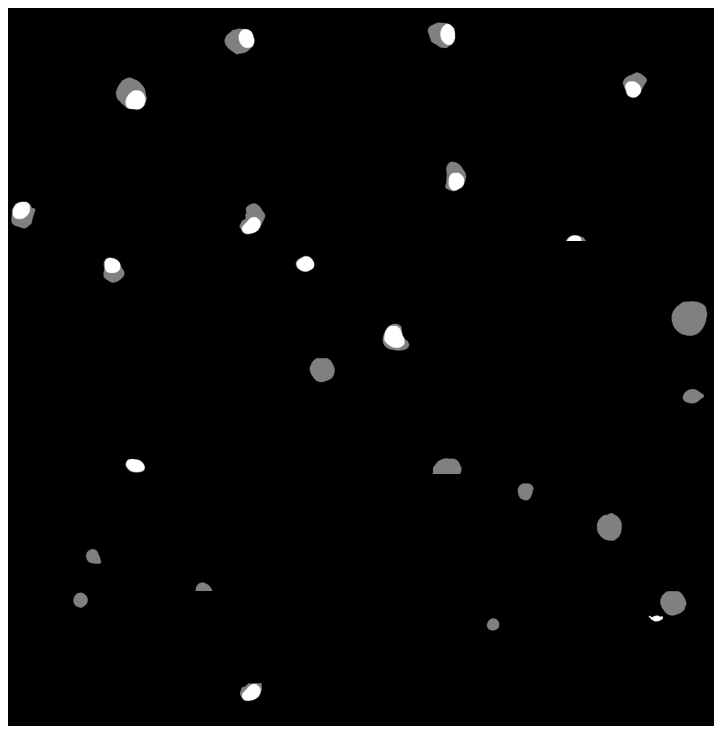

112 2323.bmp


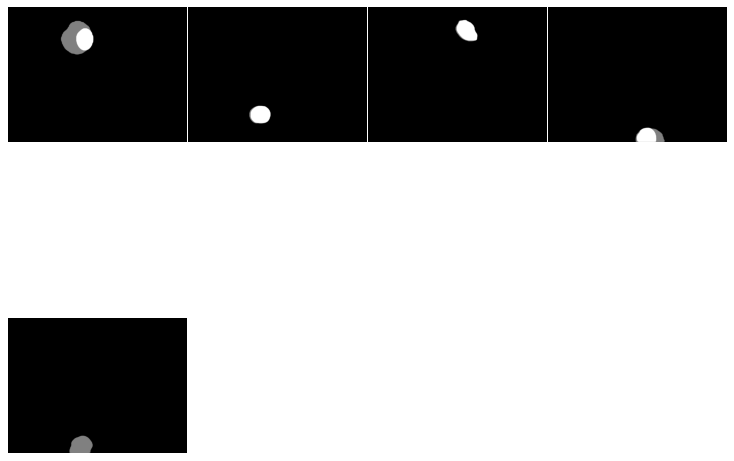

113 2325.bmp


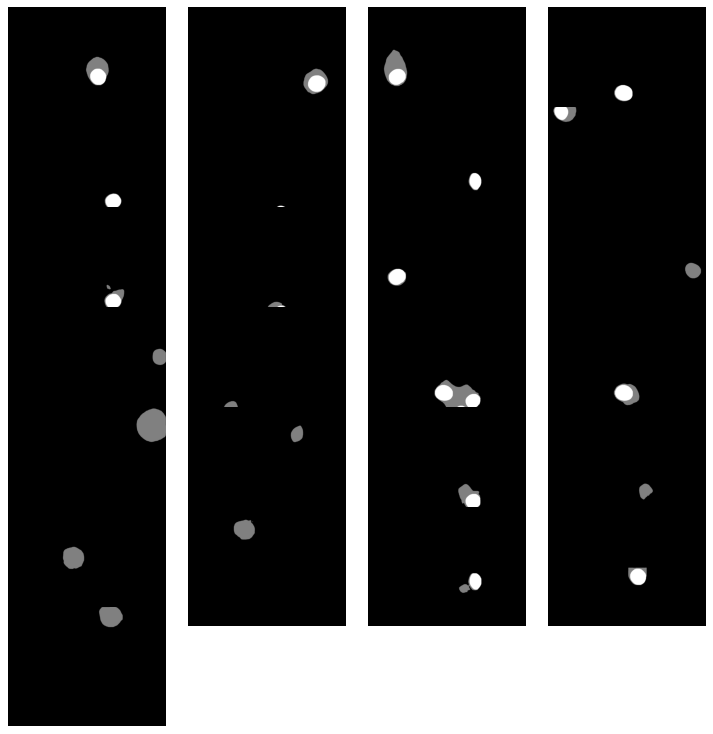

114 2326.bmp


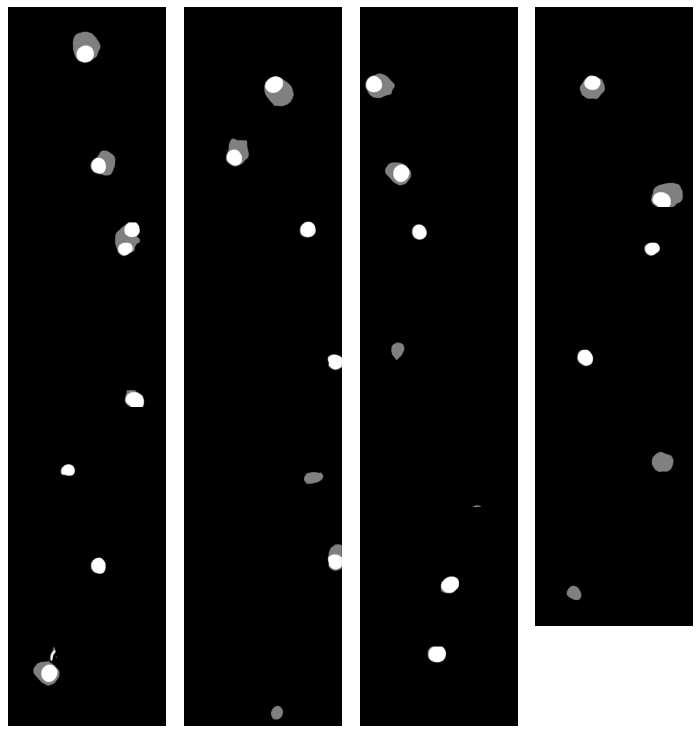

115 2327.bmp


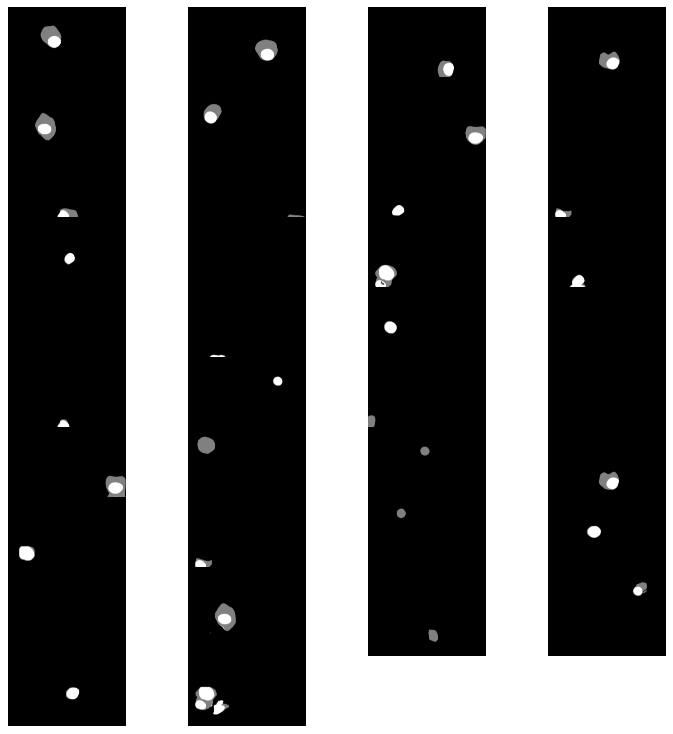

116 2332.bmp


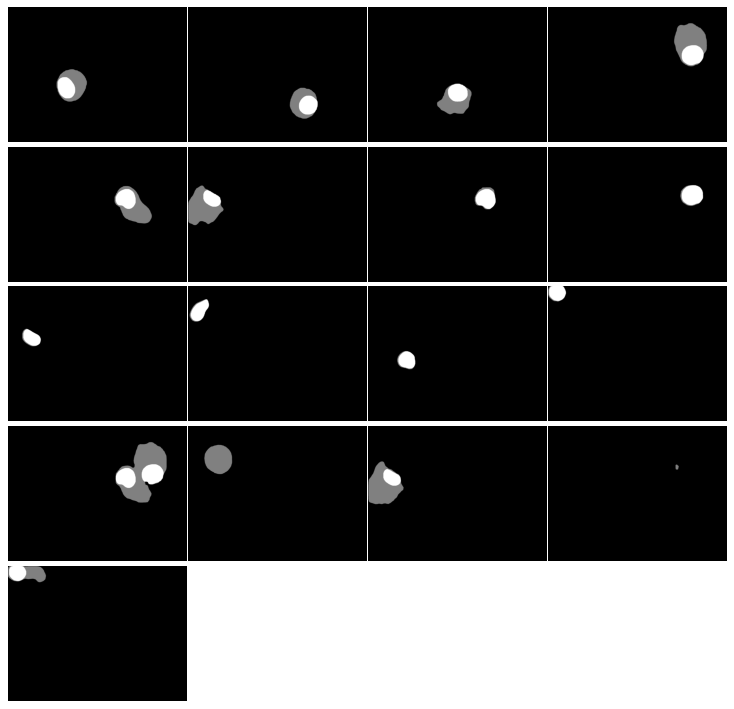

117 2334.bmp


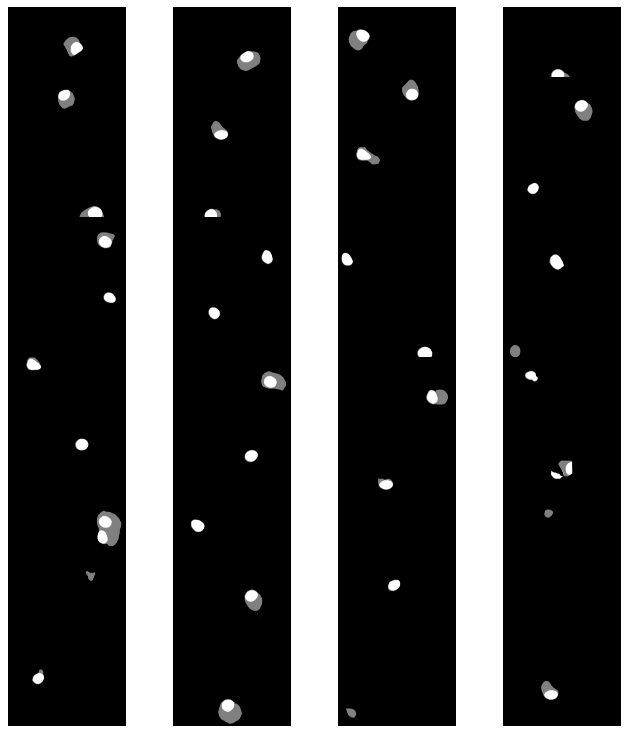

118 2341.bmp


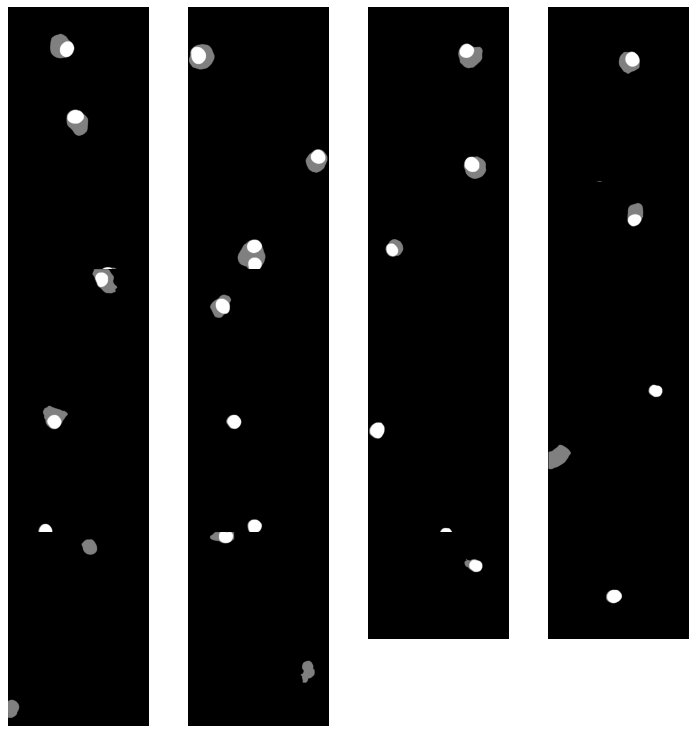

119 2344.bmp


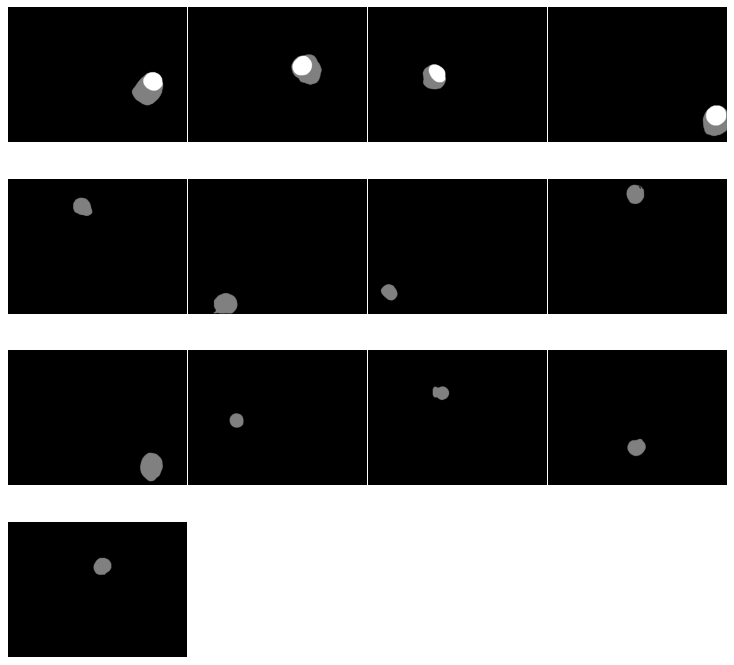

120 2347.bmp


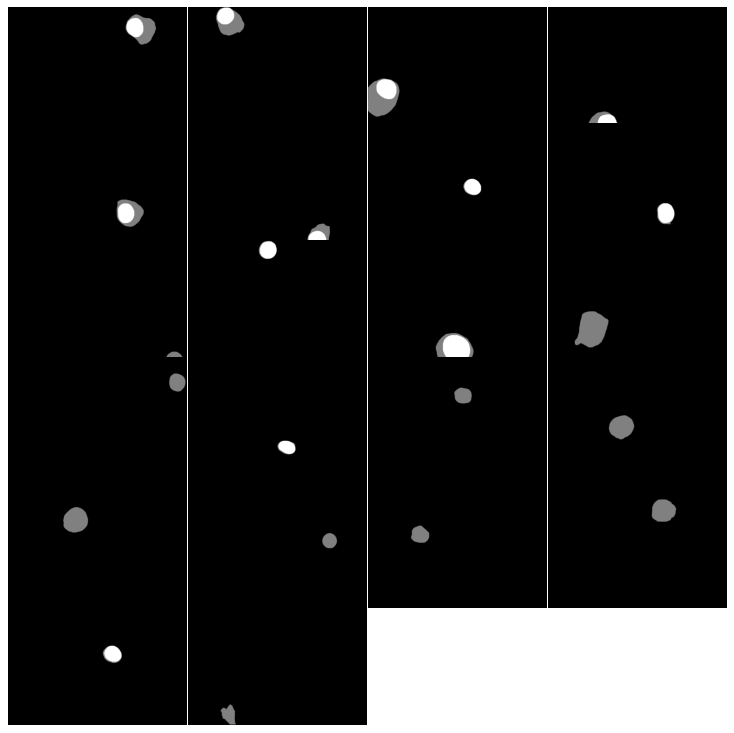

121 2358.bmp


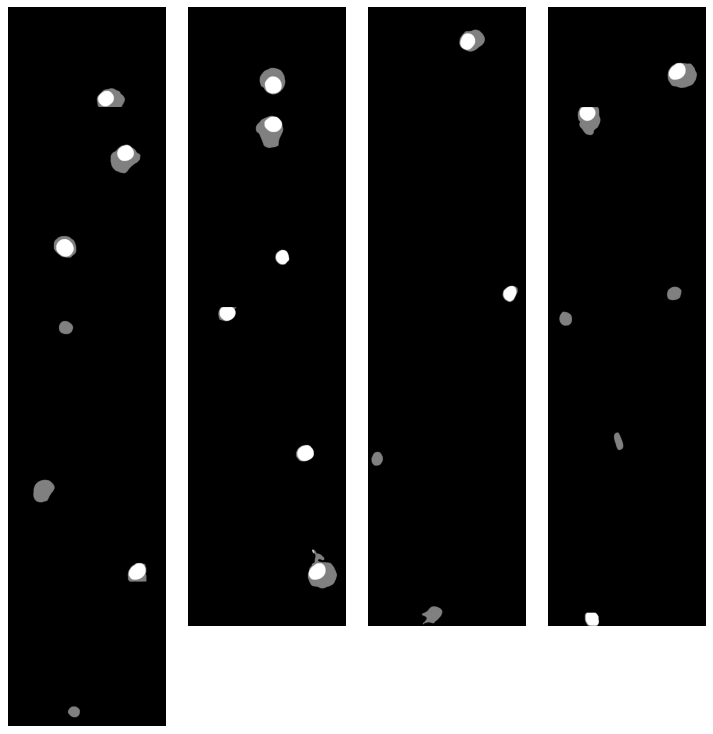

122 2361.bmp


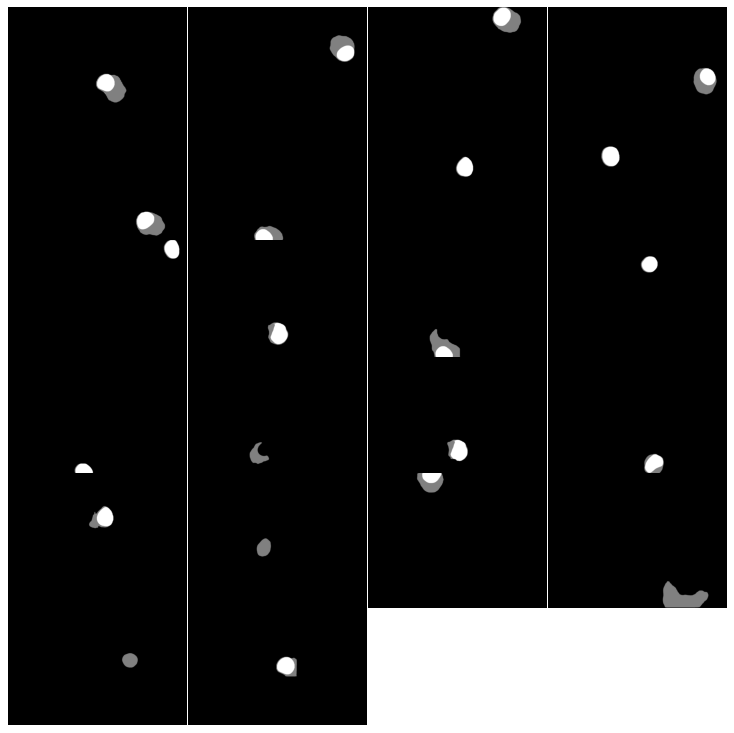

123 2370.bmp


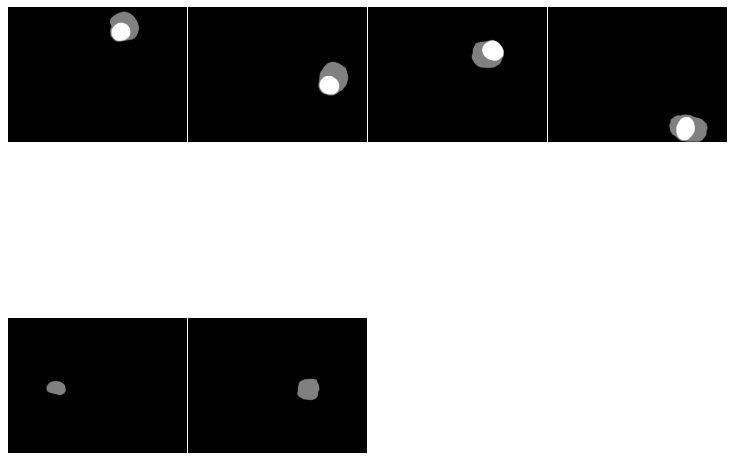

124 2372.bmp


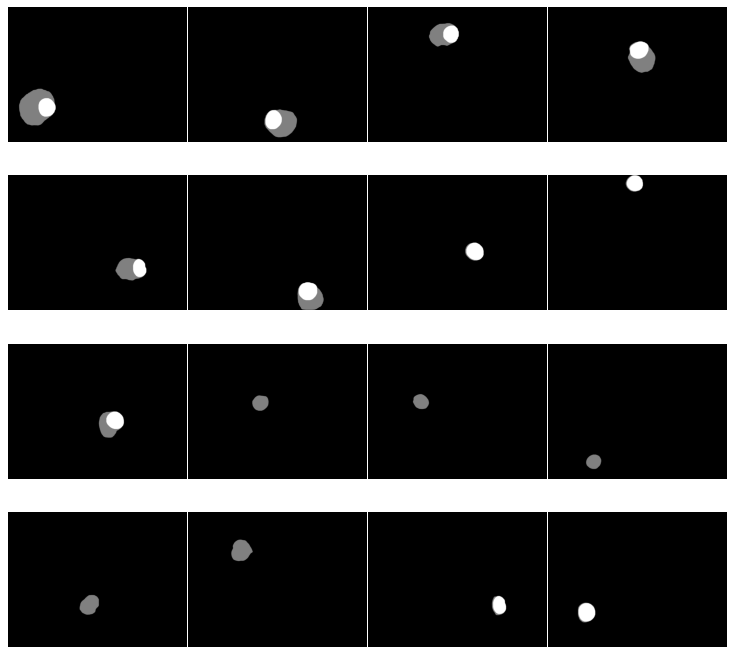

125 2376.bmp


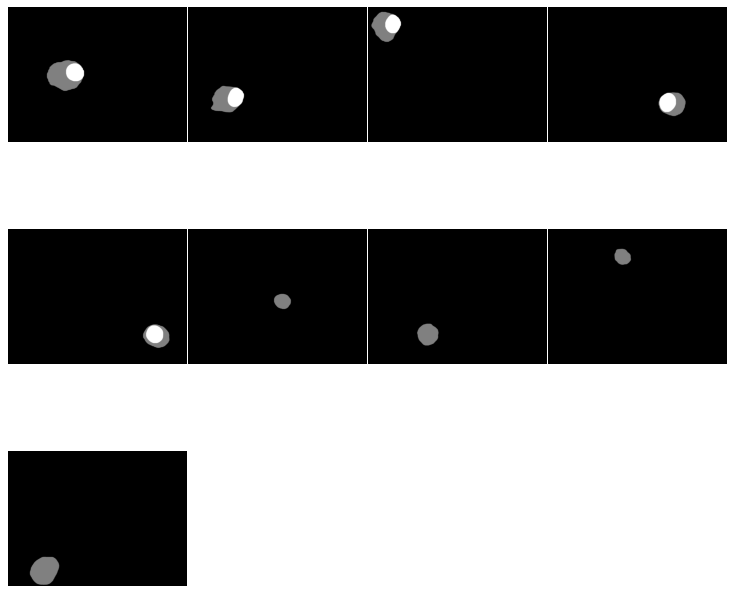

126 2379.bmp


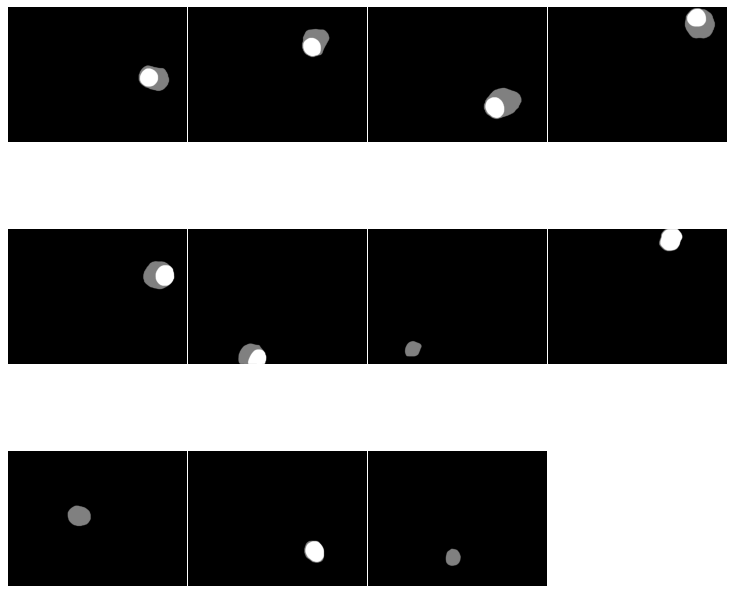

127 2388.bmp


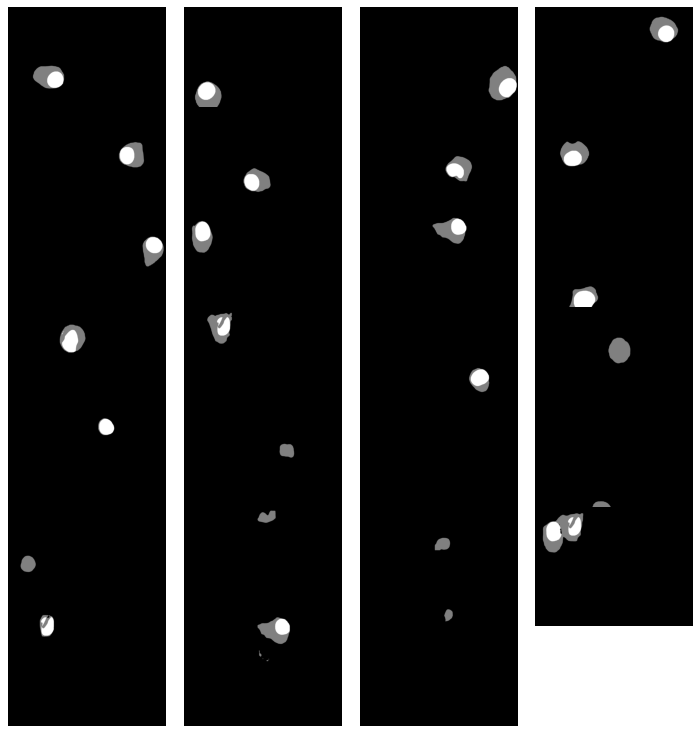

128 2389.bmp


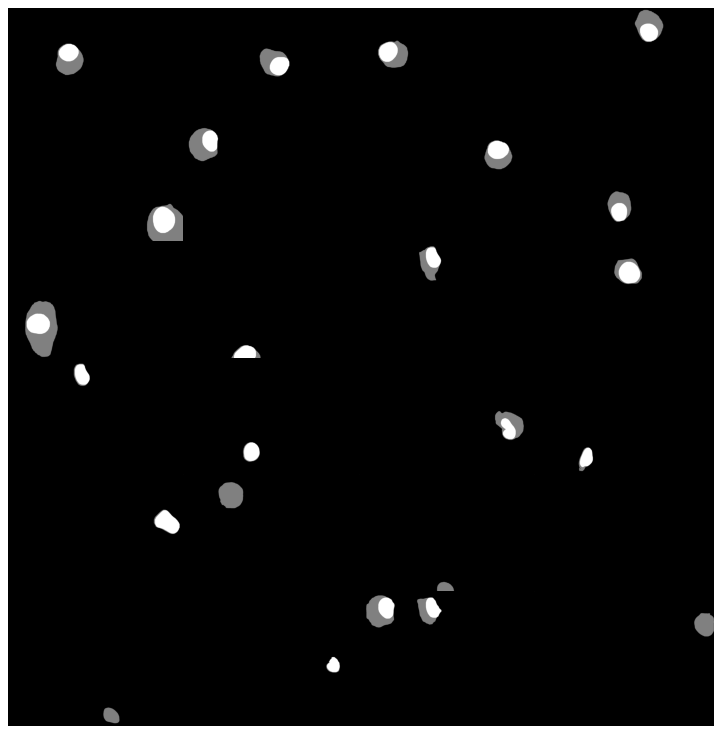

129 2399.bmp


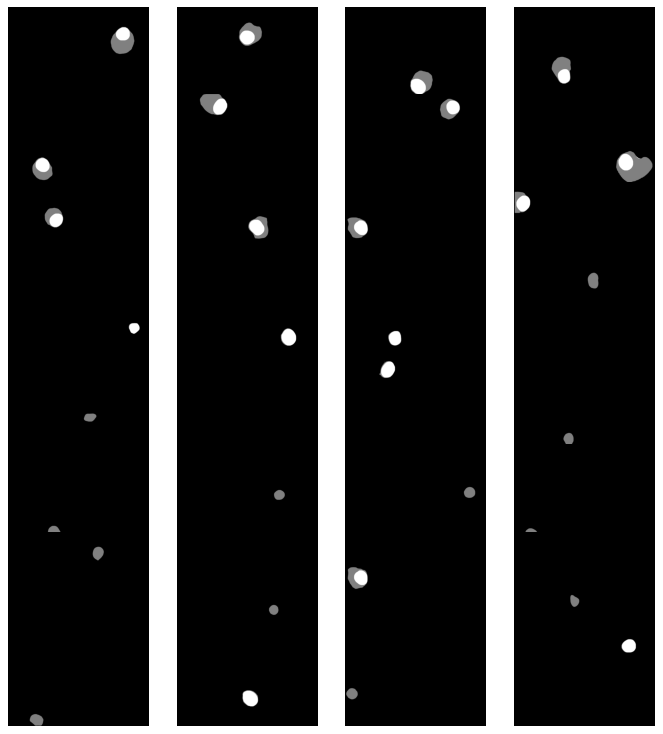

130 2400.bmp


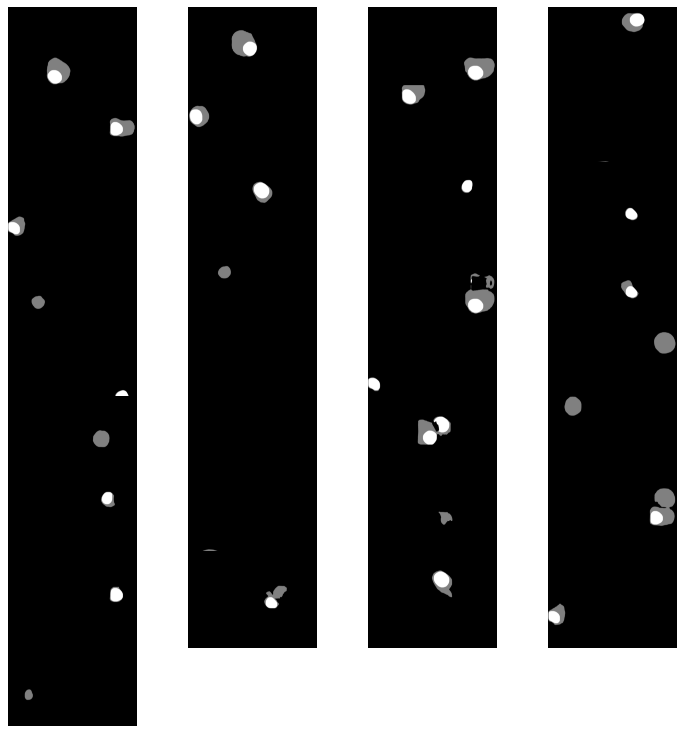

131 2402.bmp


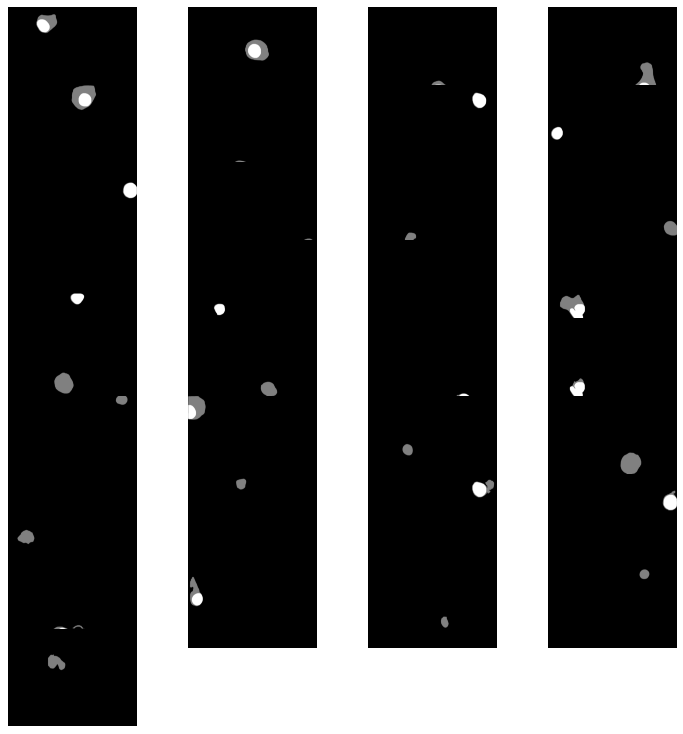

132 2405.bmp


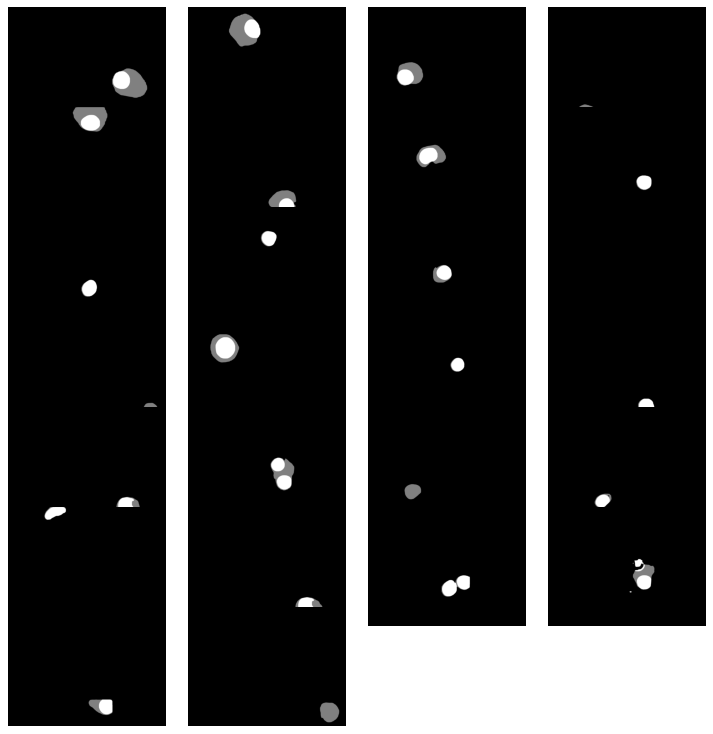

133 2407.bmp


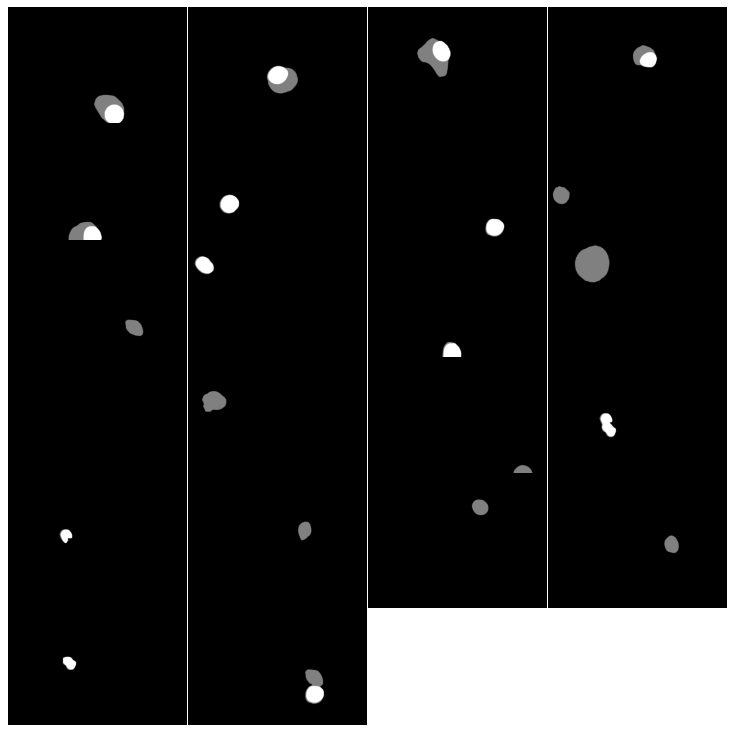

134 2409.bmp


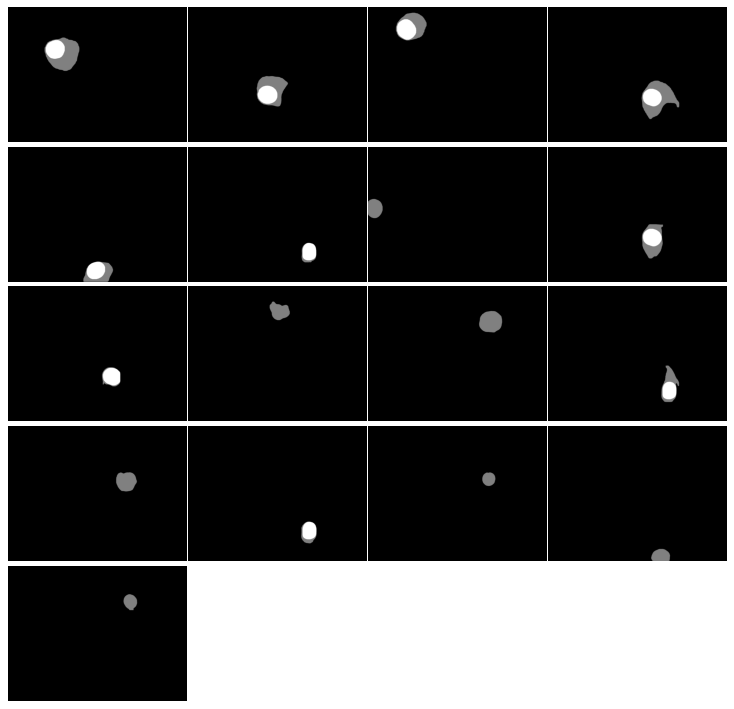

135 2411.bmp


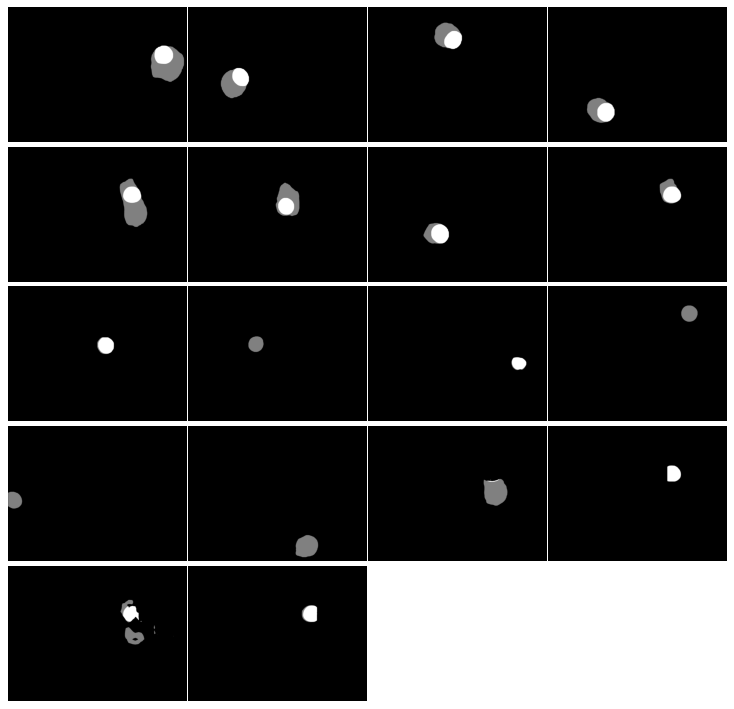

136 2412.bmp


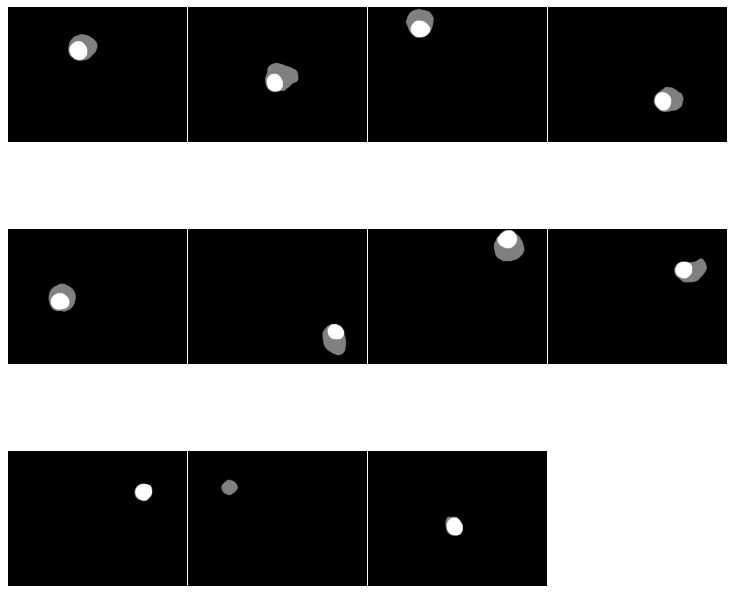

137 2419.bmp


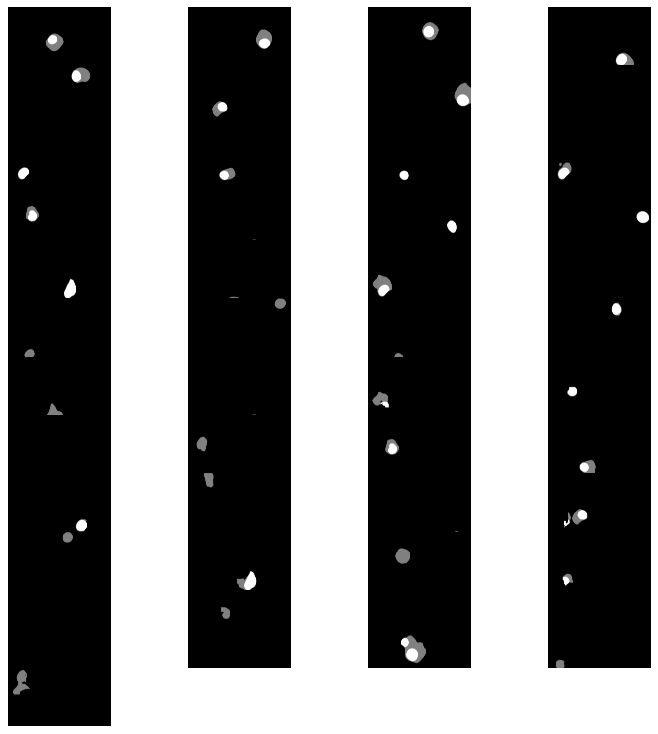

138 2421.bmp


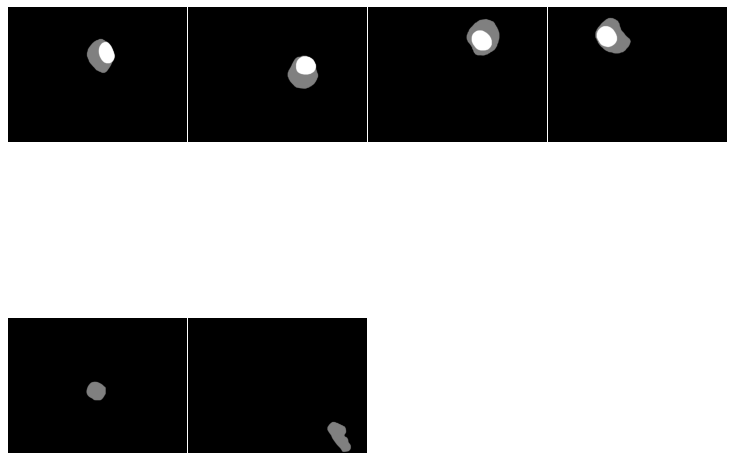

139 2441.bmp


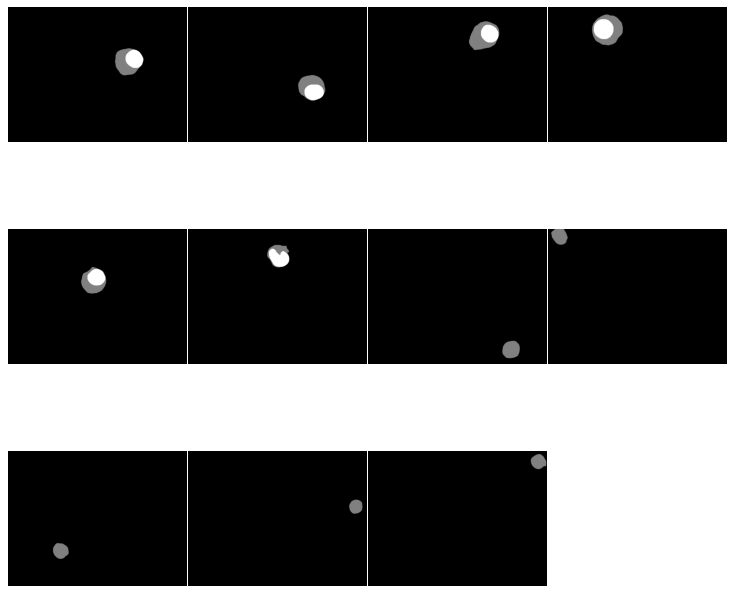

140 301.bmp


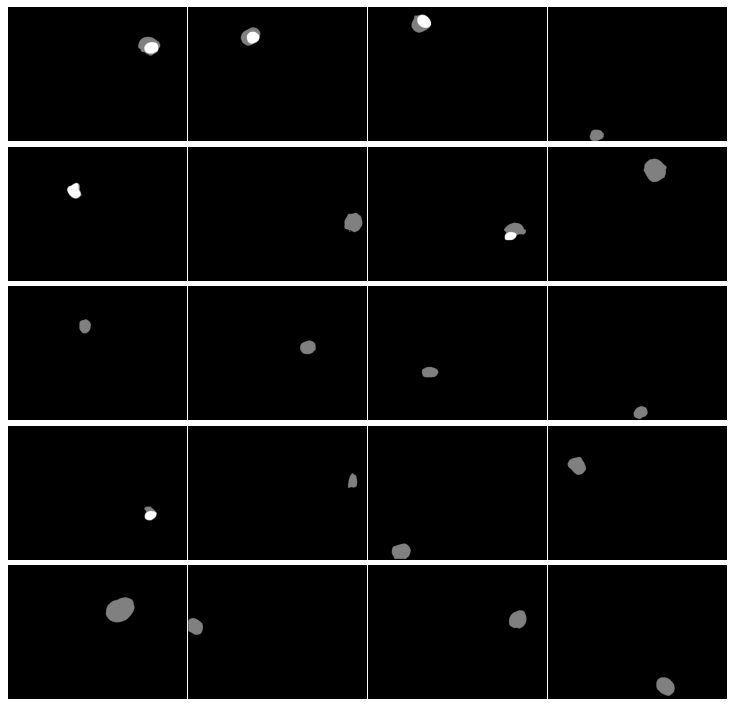

141 302.bmp


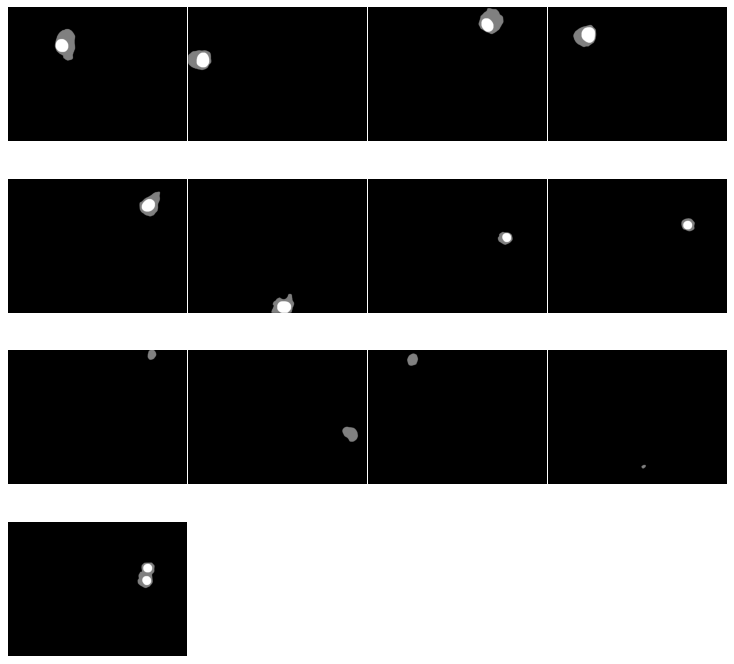

142 401.bmp


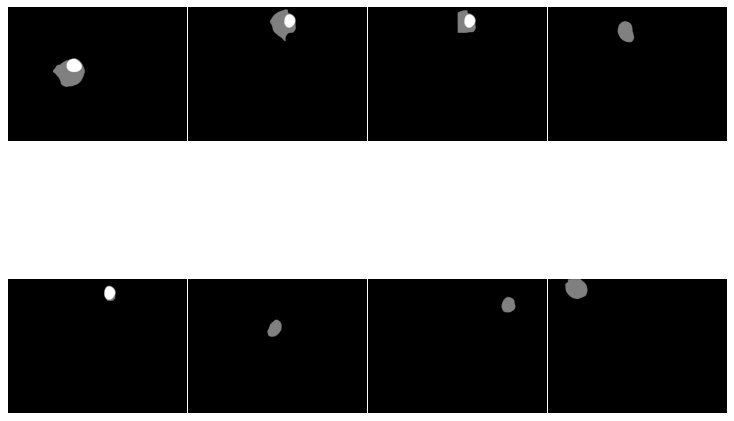

143 402.bmp


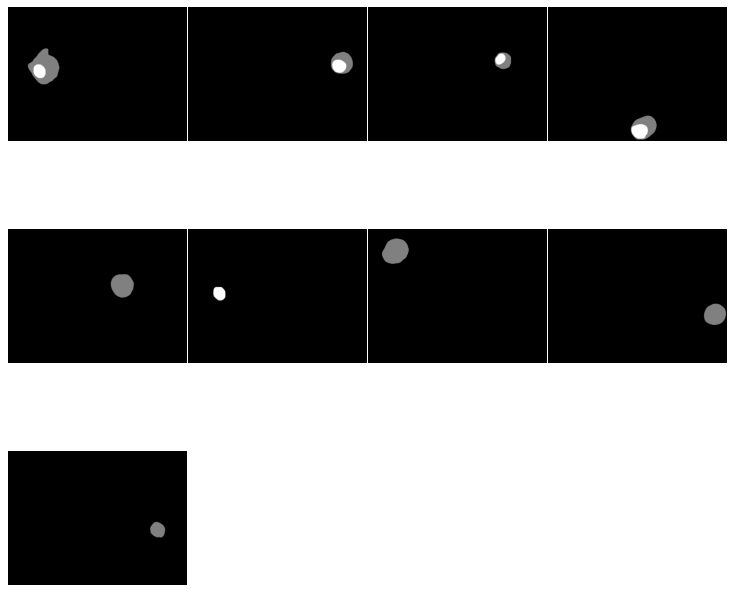

144 404.bmp


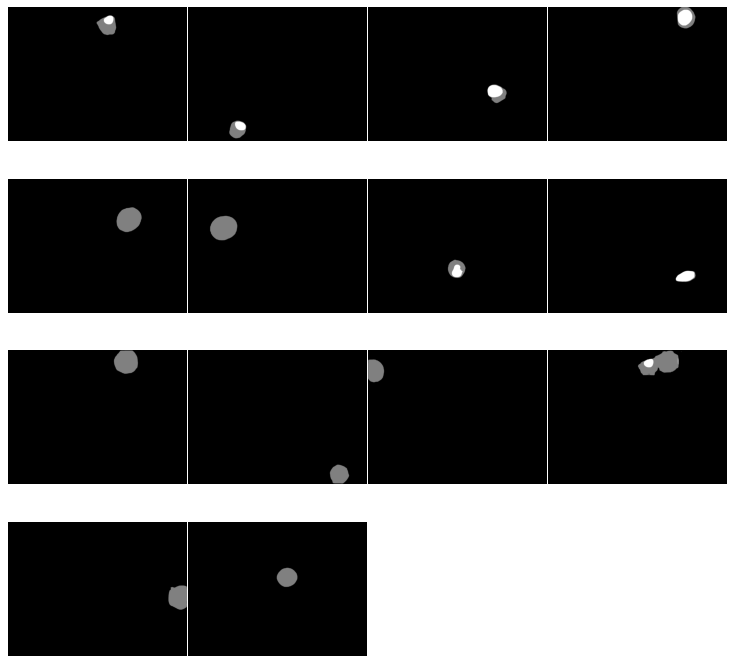

145 405.bmp


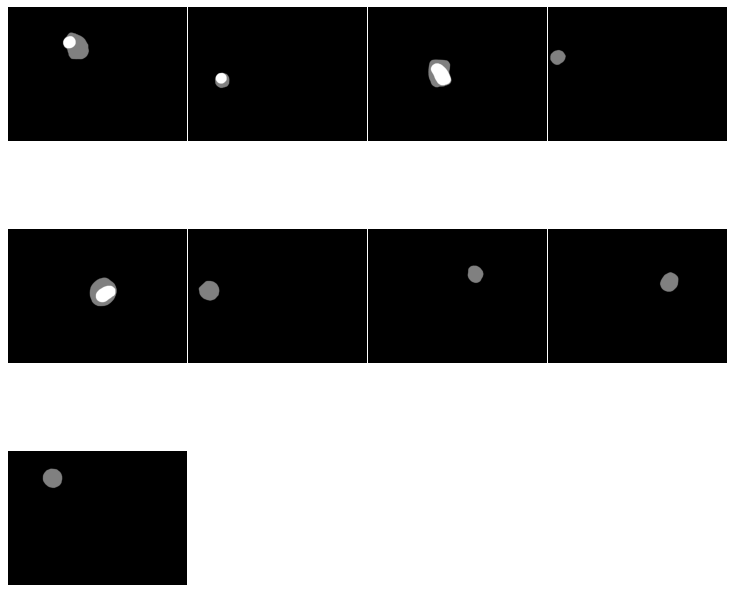

146 406.bmp


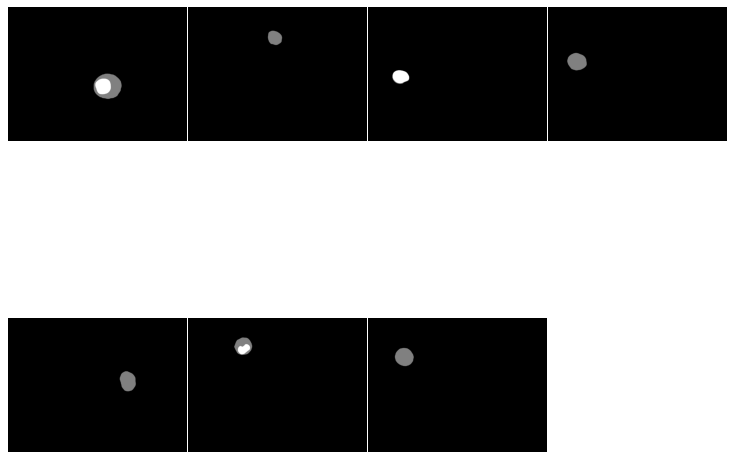

147 415.bmp


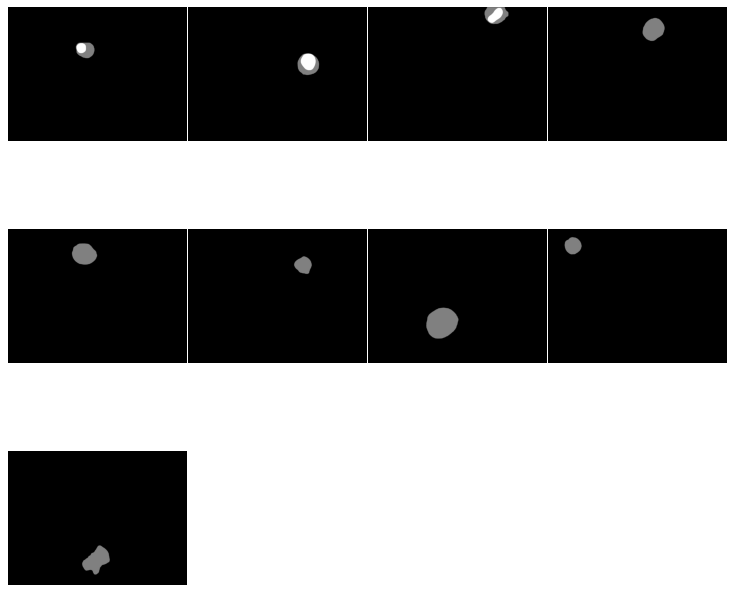

148 502.bmp


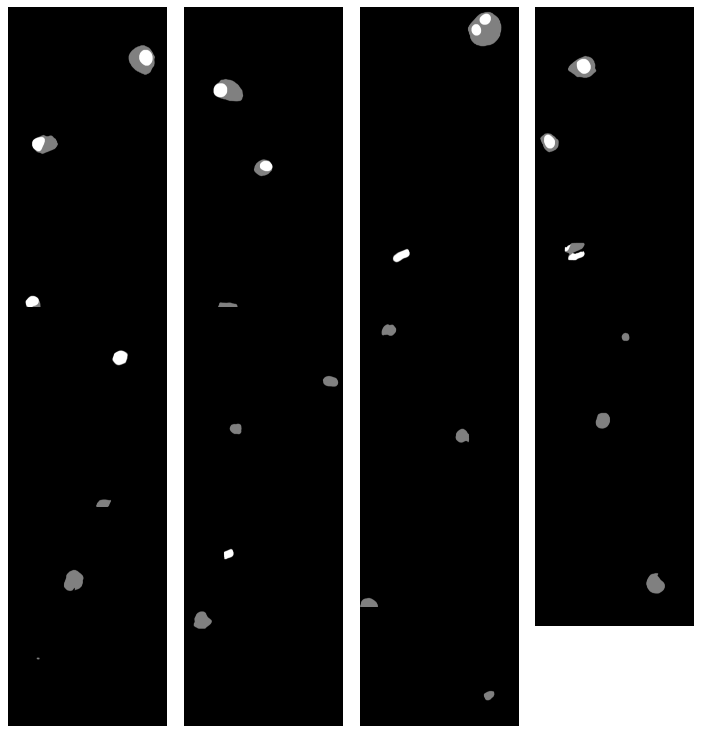

149 505.bmp


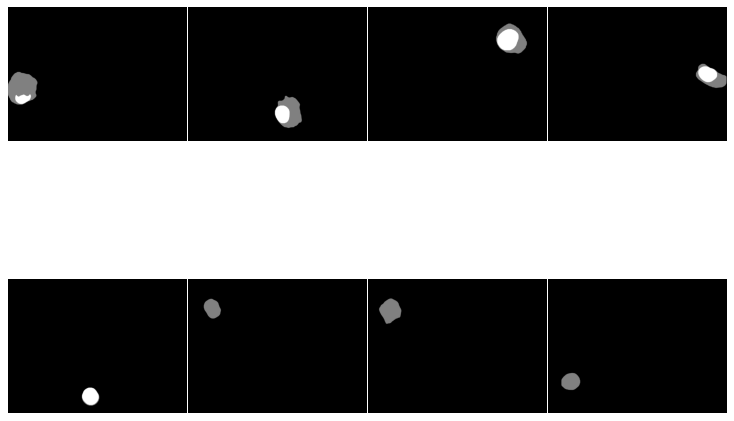

150 508.bmp


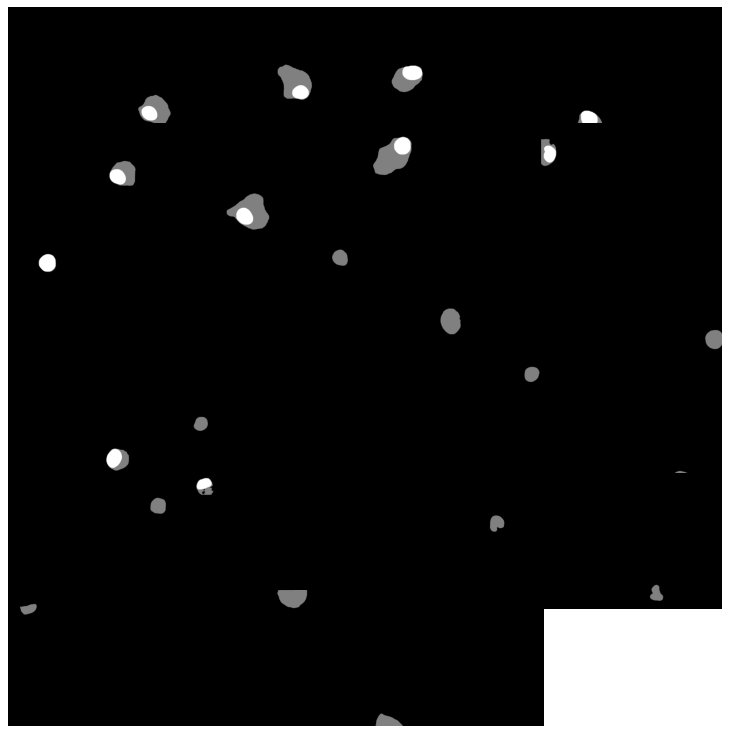

151 509.bmp


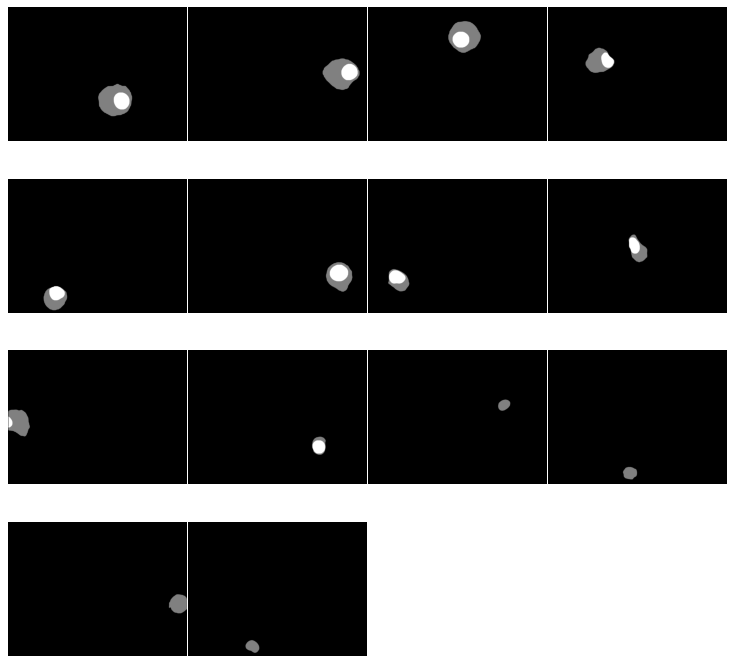

152 511.bmp


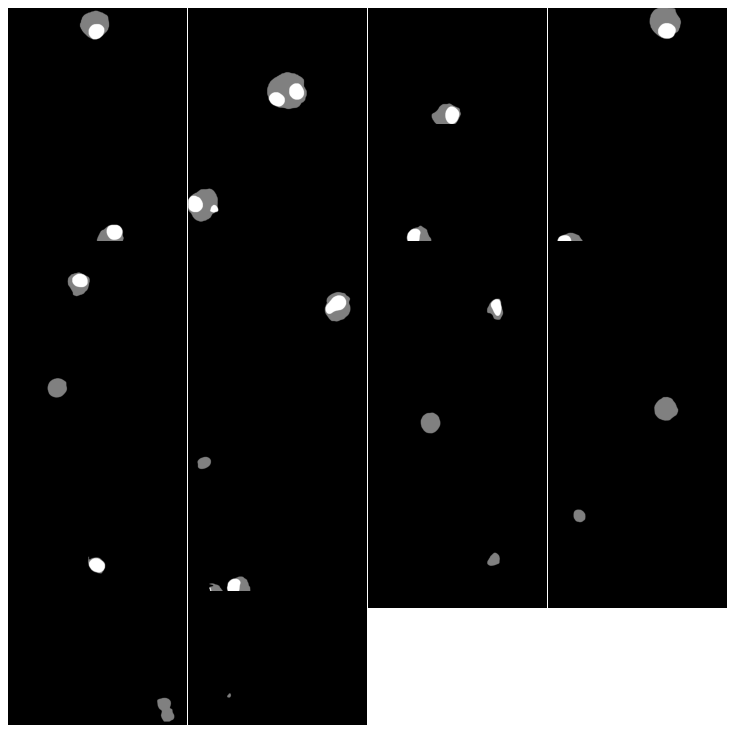

153 514.bmp


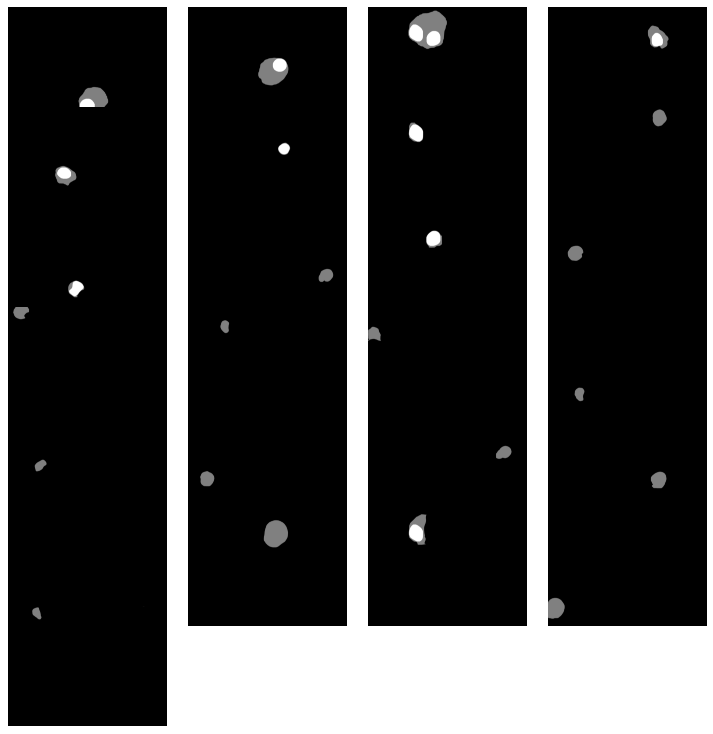

154 515.bmp


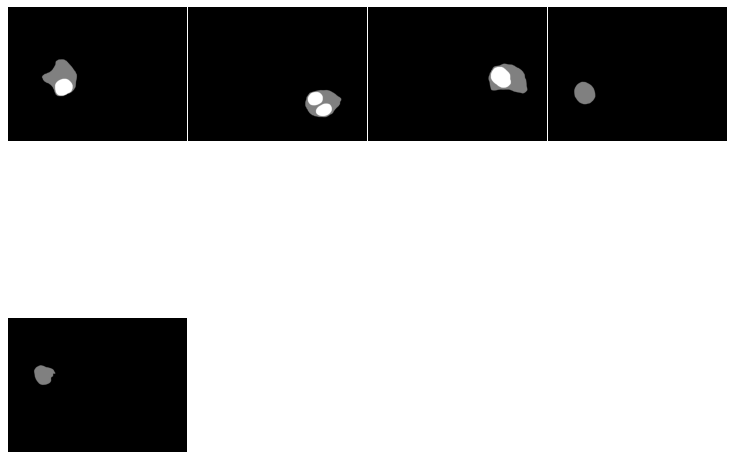

155 519.bmp


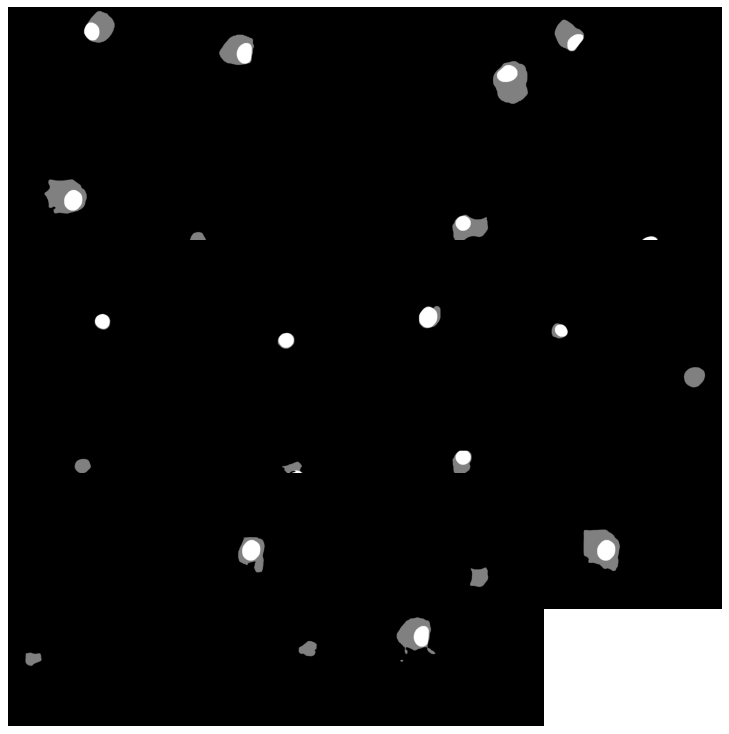

156 602.bmp


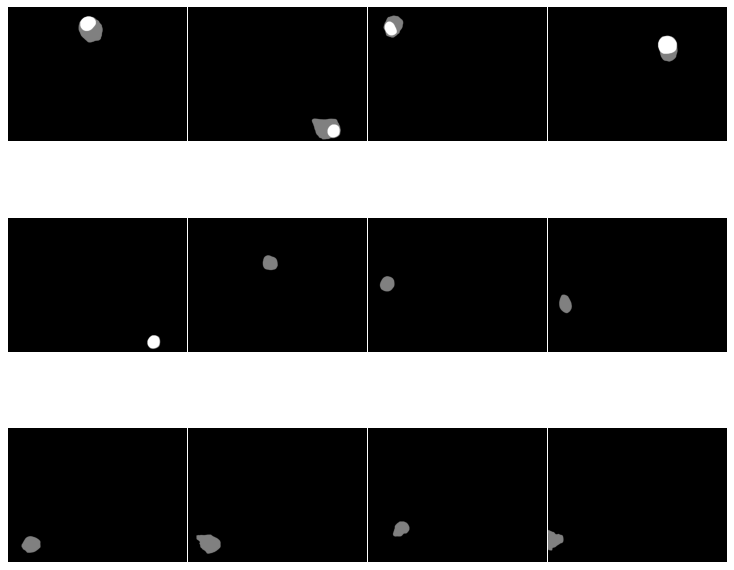

157 604.bmp


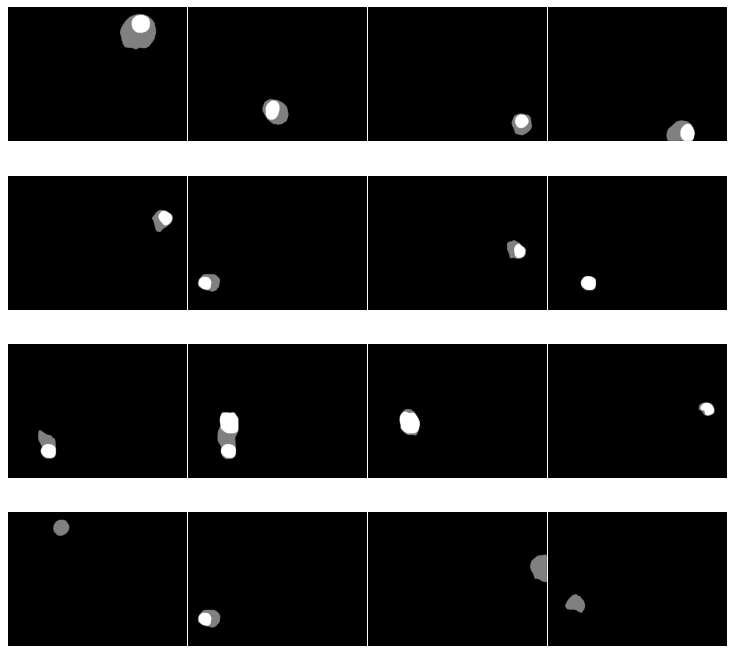

158 605.bmp


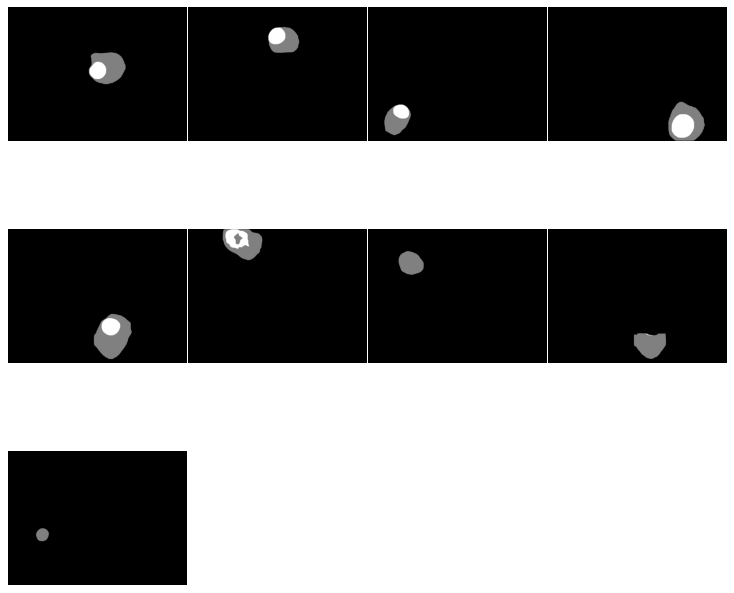

159 607.bmp


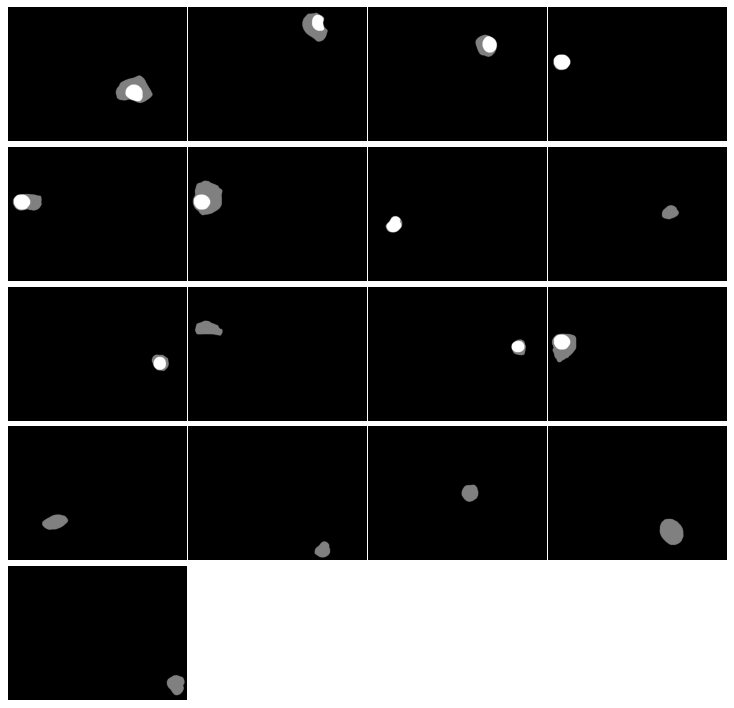

160 608.bmp


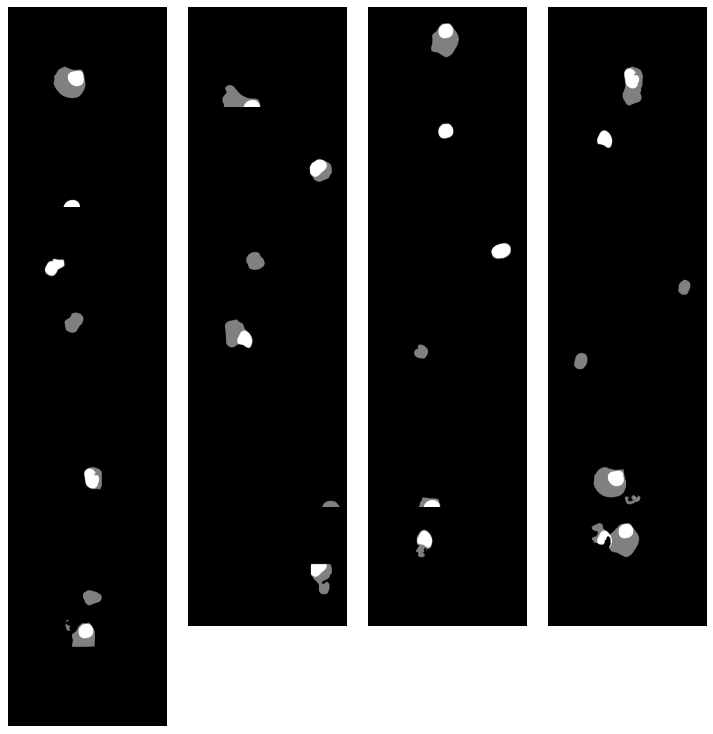

161 609.bmp


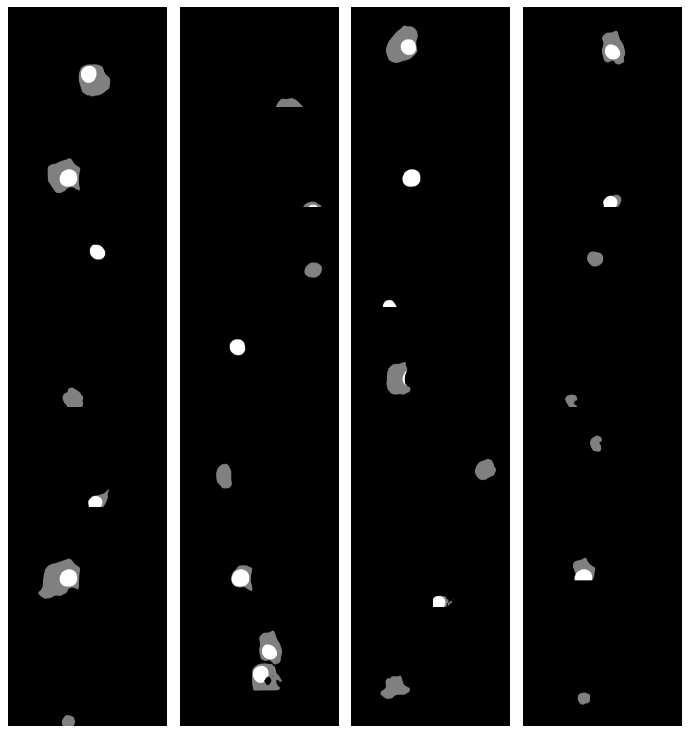

162 9279.bmp


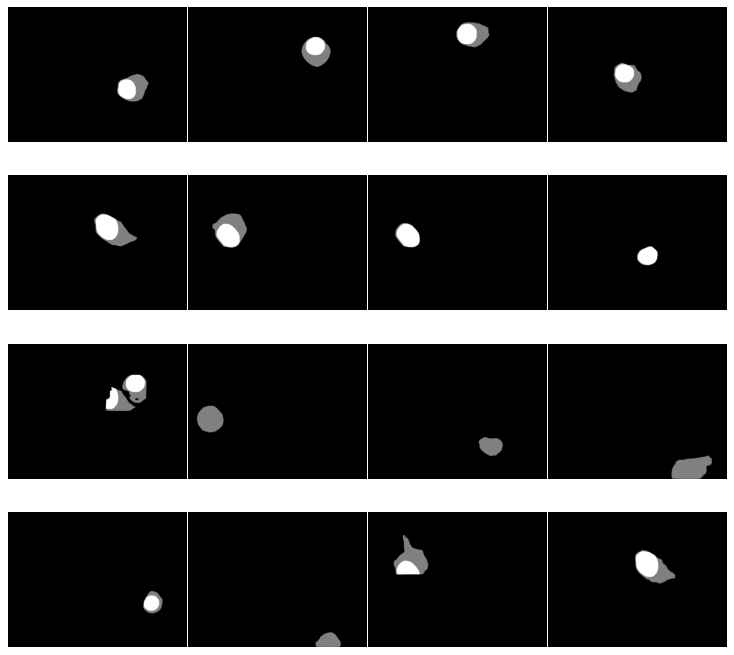

163 9282.bmp


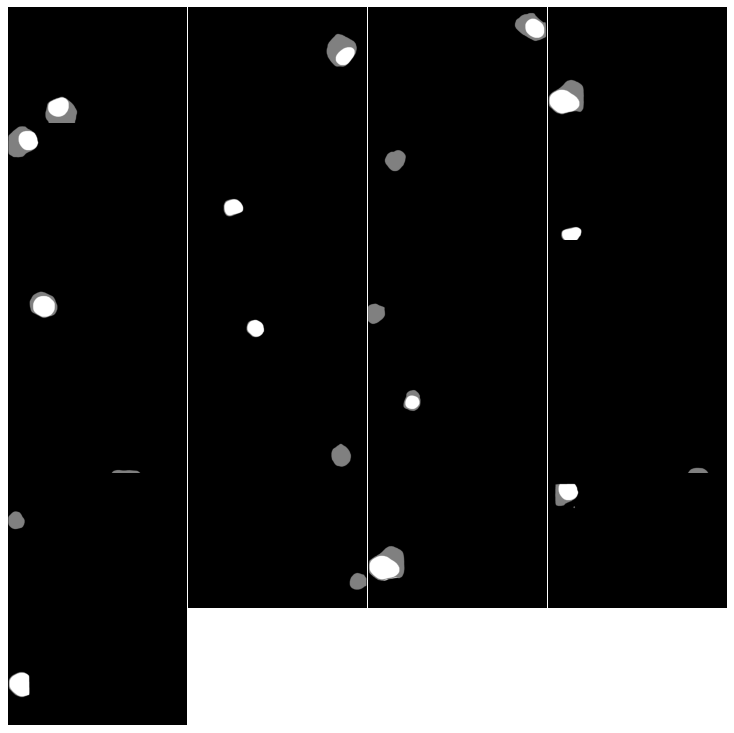

164 9285.bmp


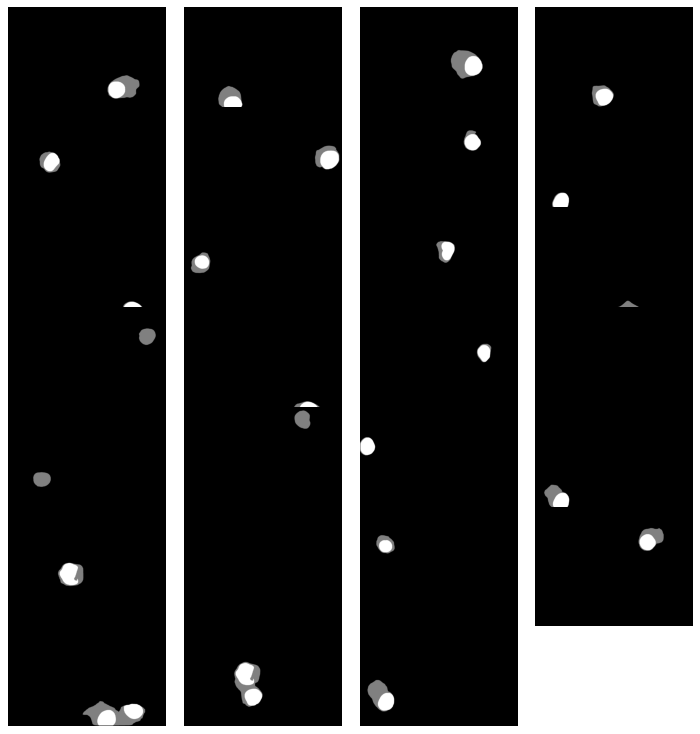

165 9287.bmp


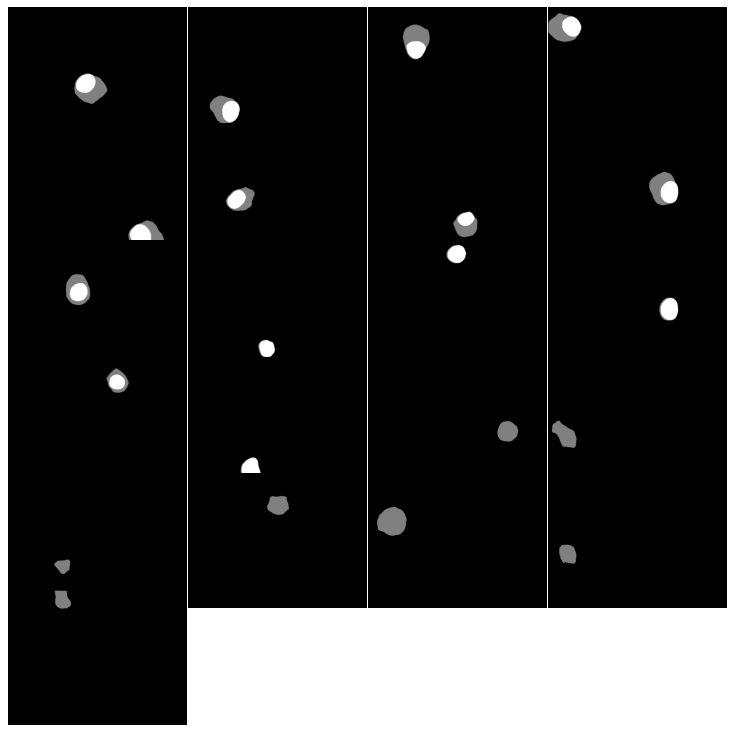

166 9288.bmp


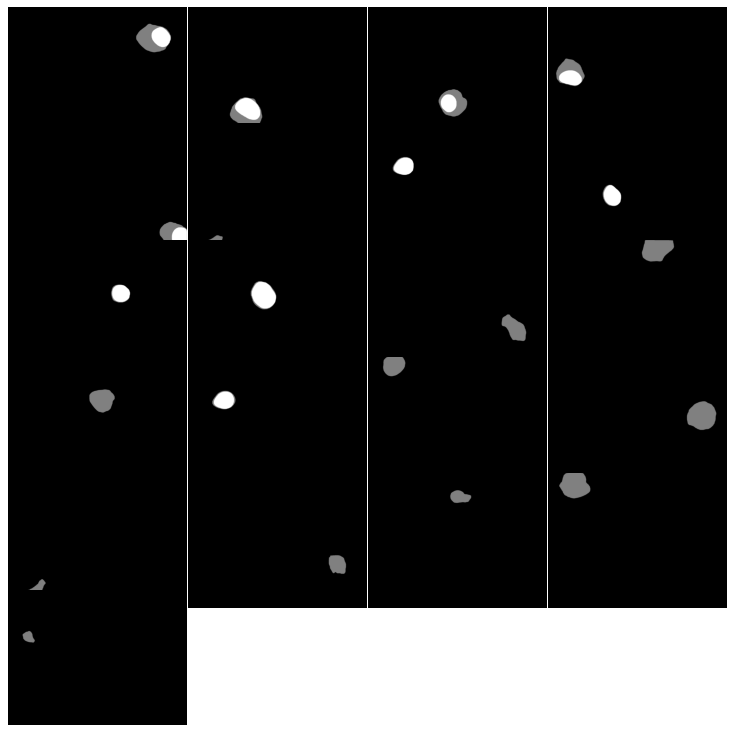

167 9291.bmp


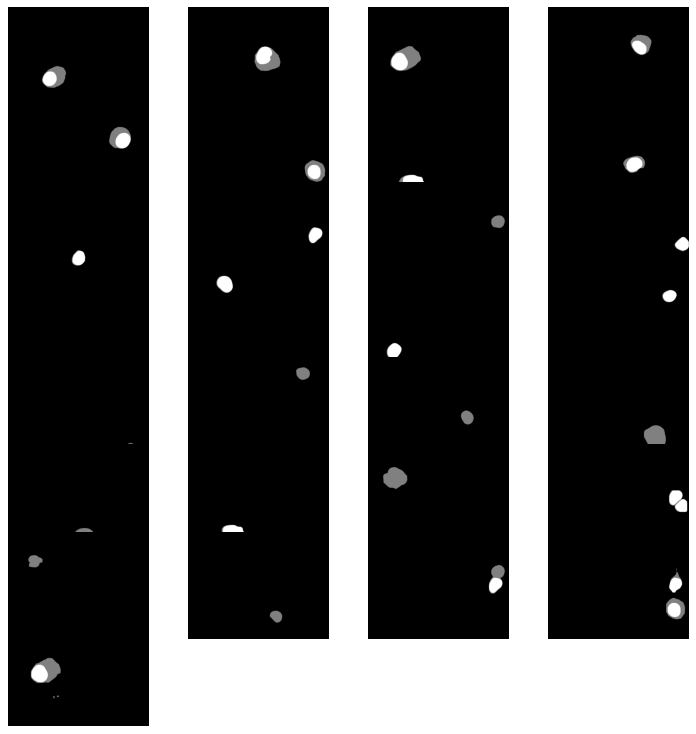

168 9301.bmp


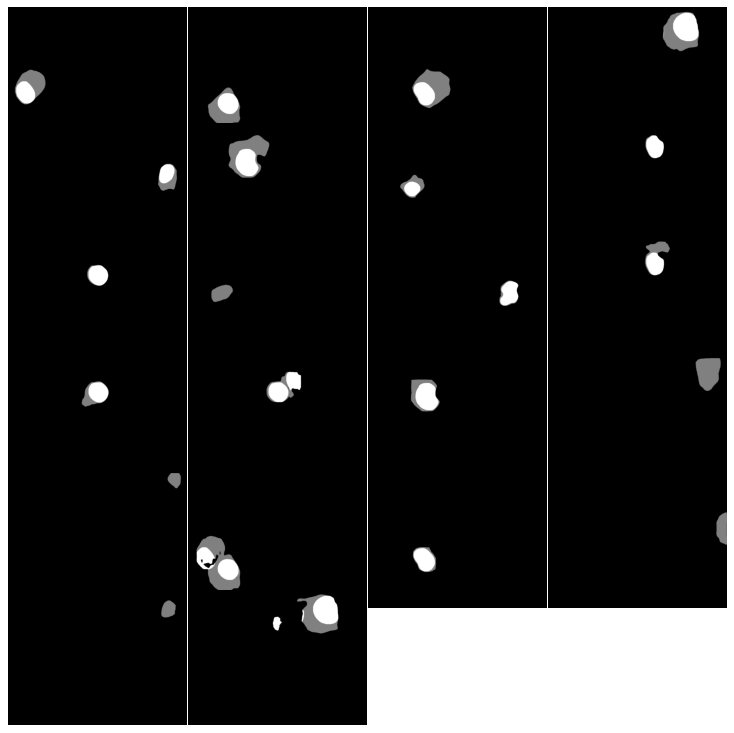

169 9305.bmp


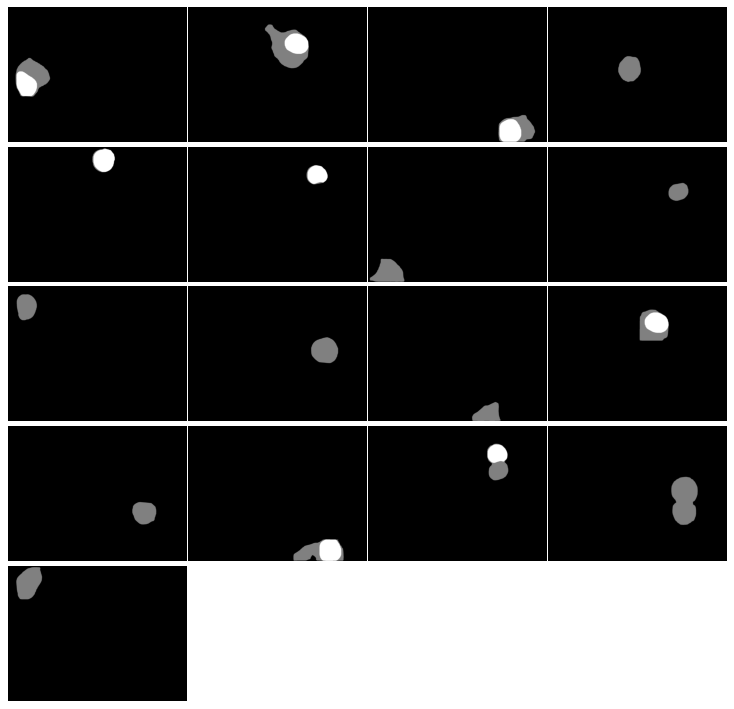

170 9311.bmp


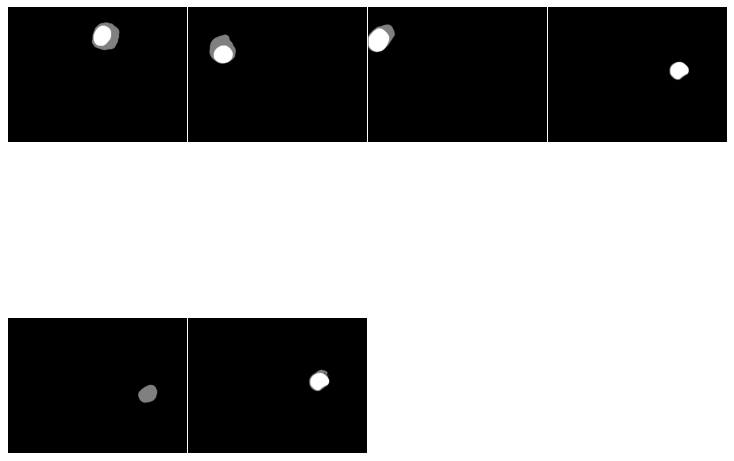

171 9316.bmp


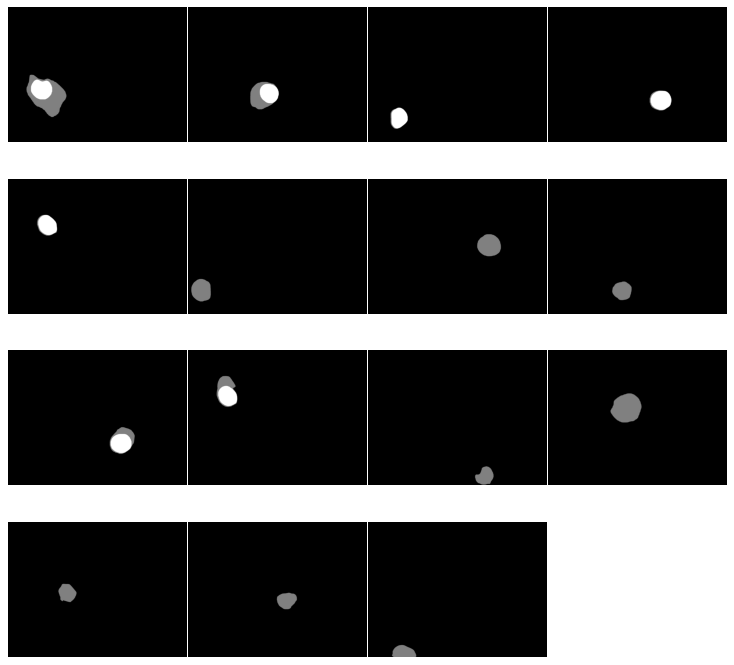

172 9326.bmp


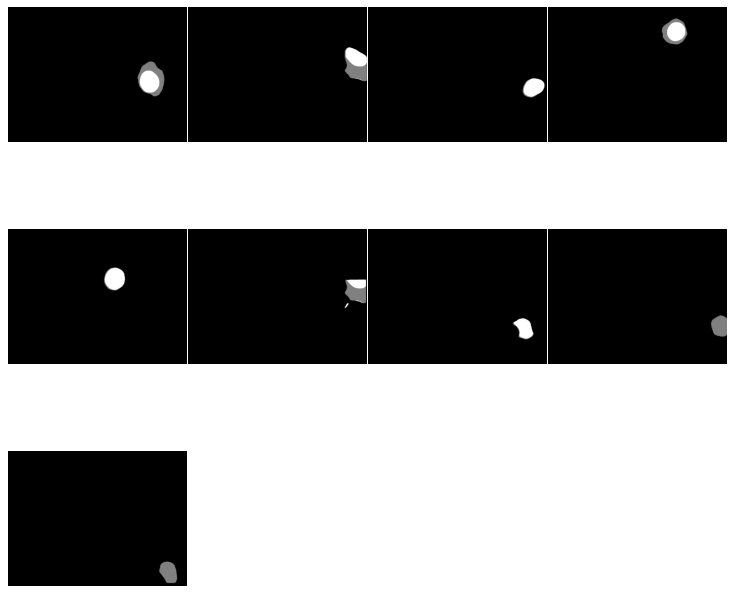

173 9328.bmp


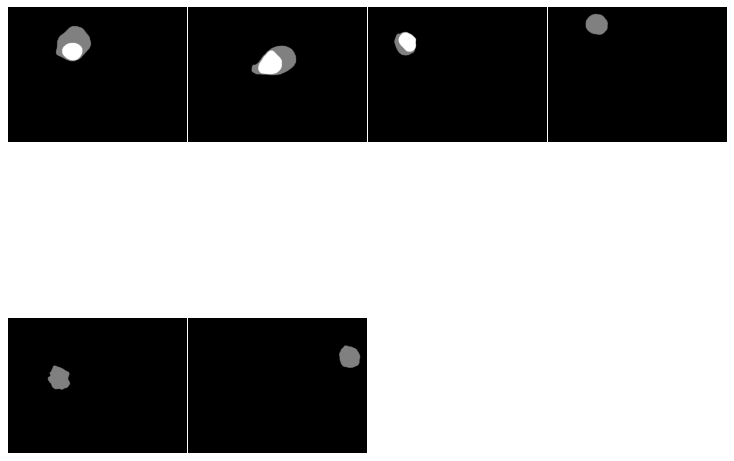

174 9330.bmp


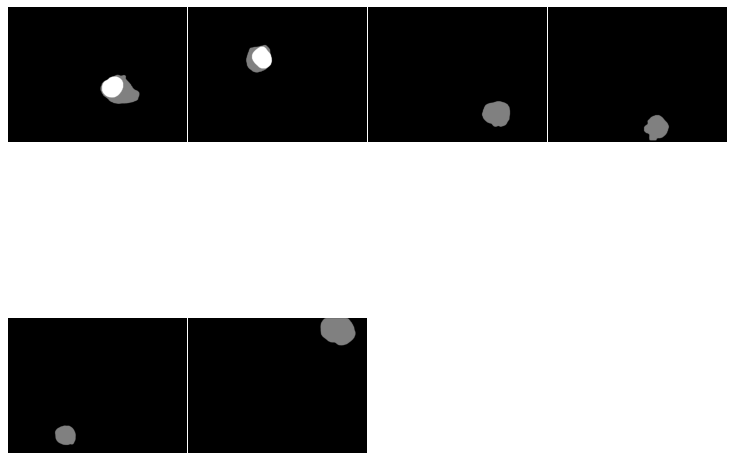

175 9332.bmp


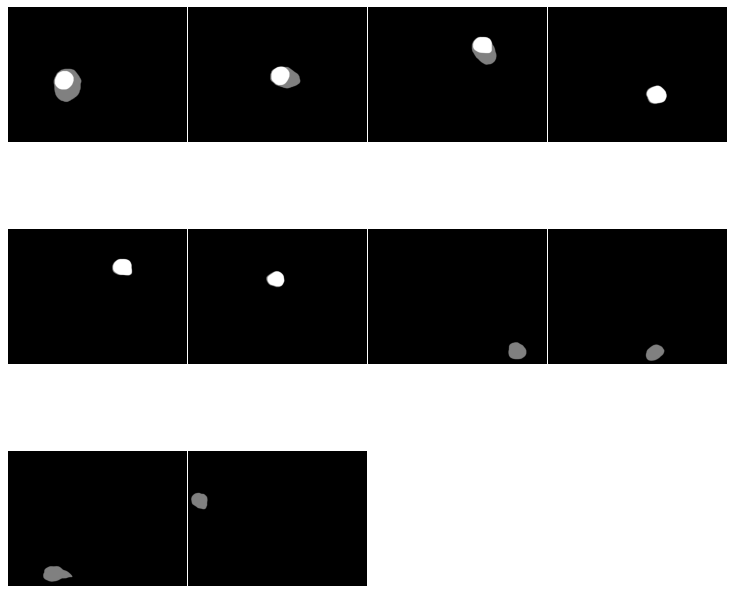

176 9335.bmp


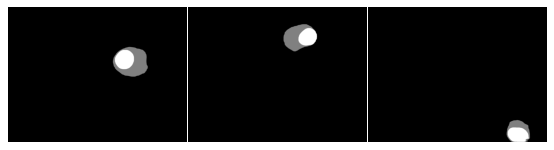

177 9341.bmp


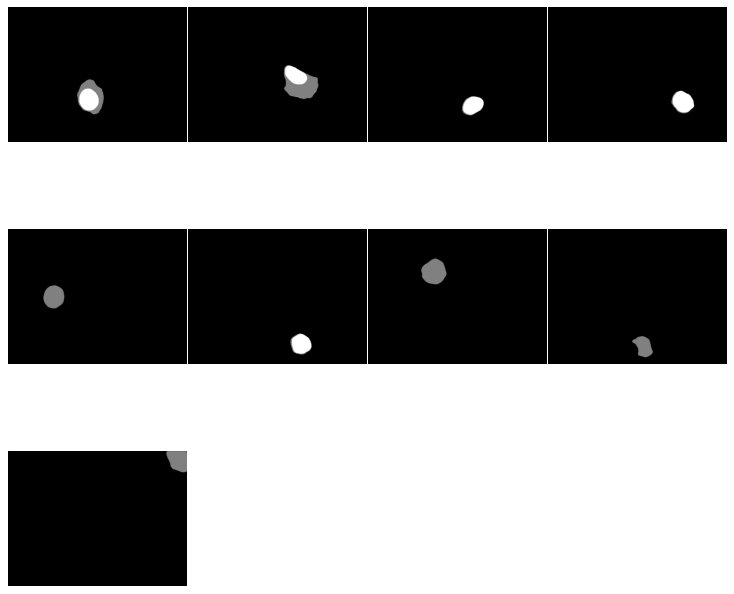

178 9344.bmp


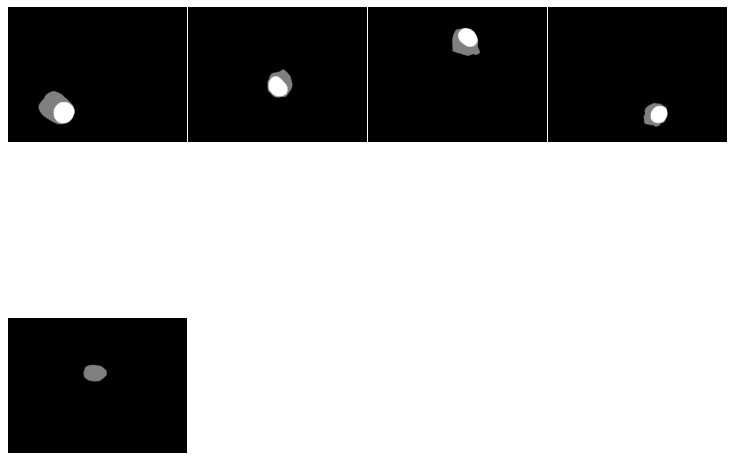

179 9345.bmp


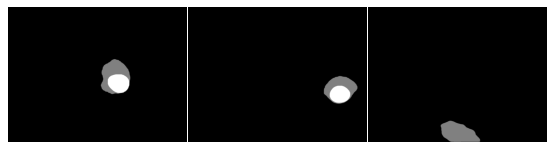

180 9349.bmp


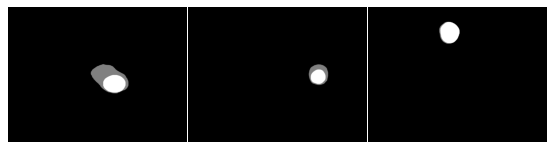

181 9355.bmp


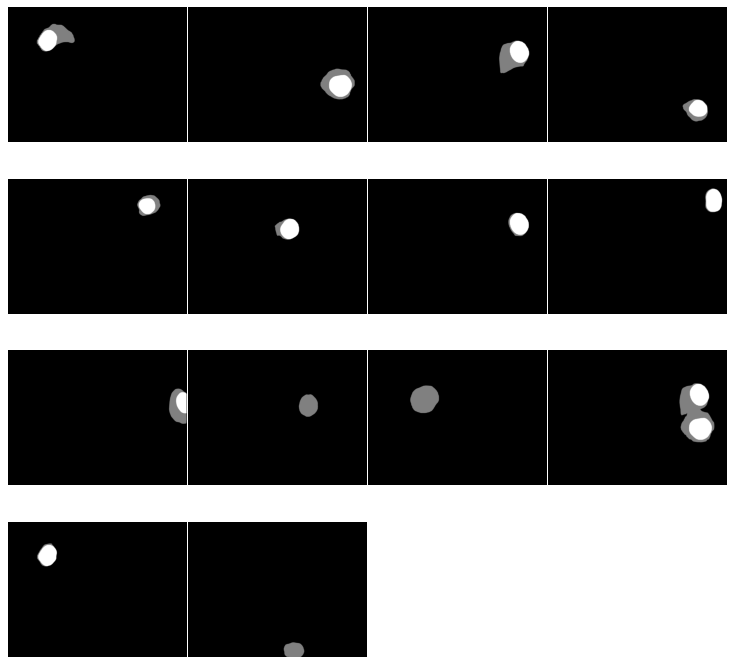

182 9366.bmp


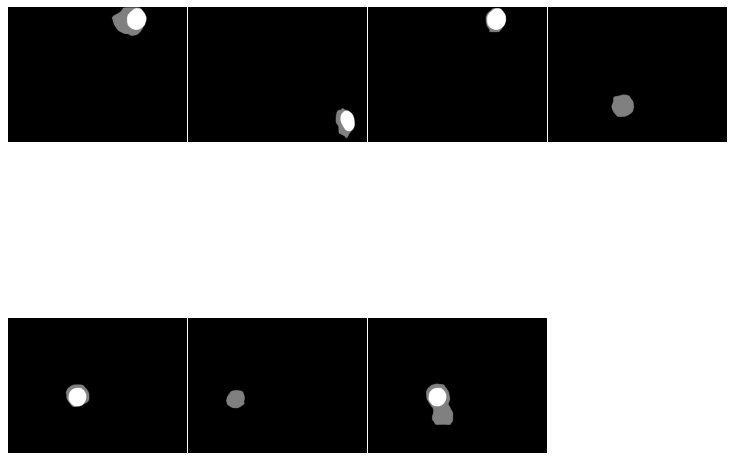

183 9371.bmp


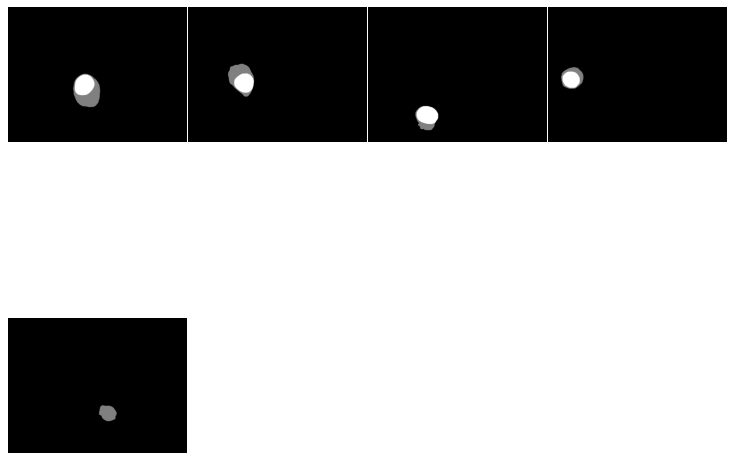

184 9375.bmp


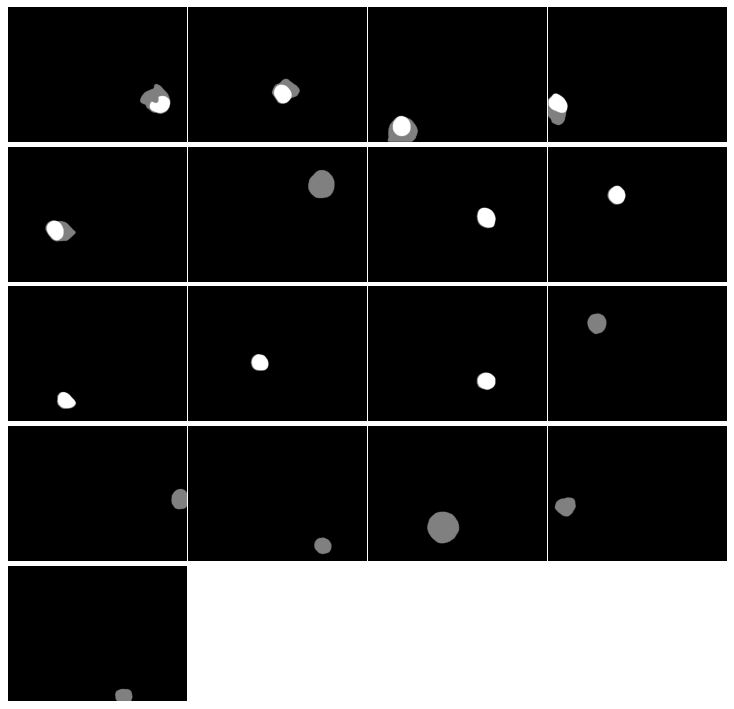

185 9378.bmp


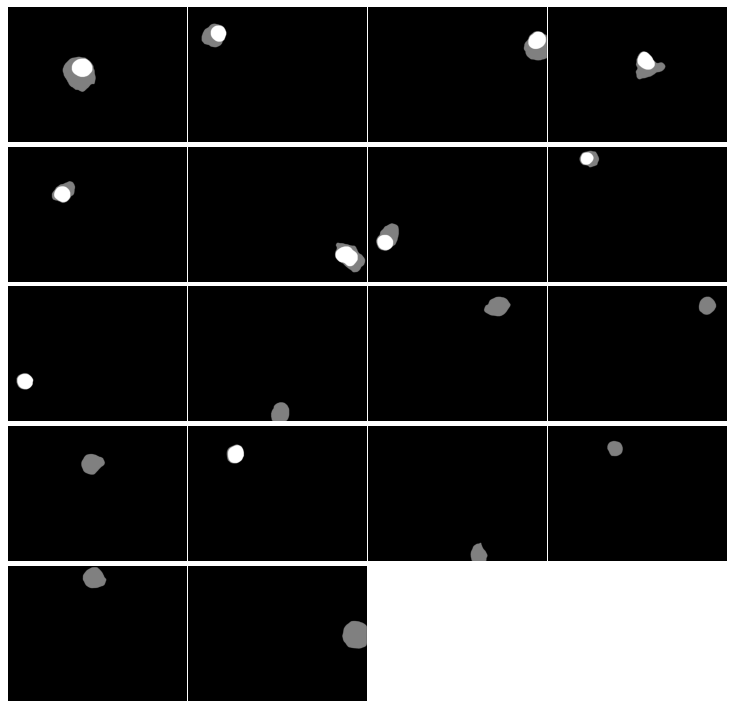

186 9386.bmp


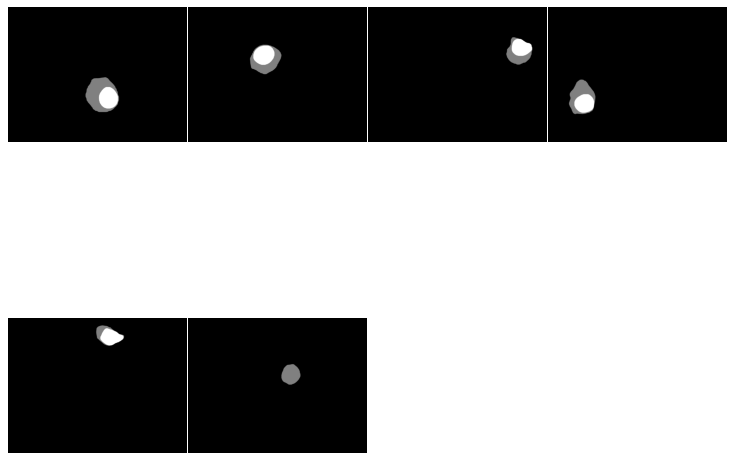

187 9392.bmp


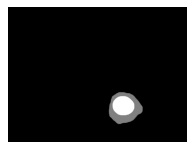

188 9393.bmp


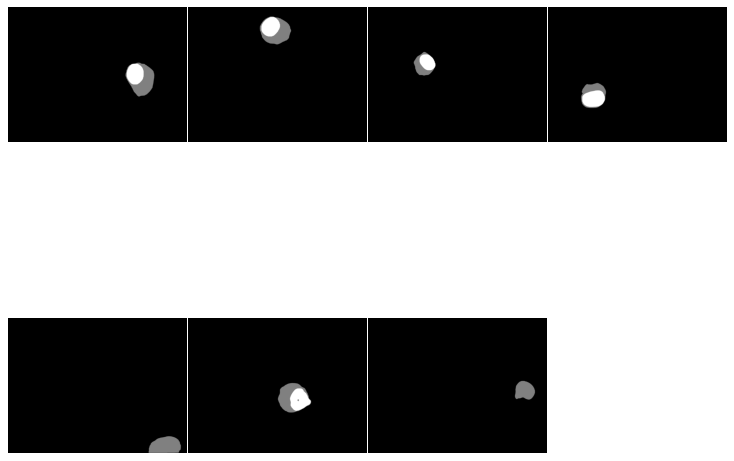

189 9394.bmp


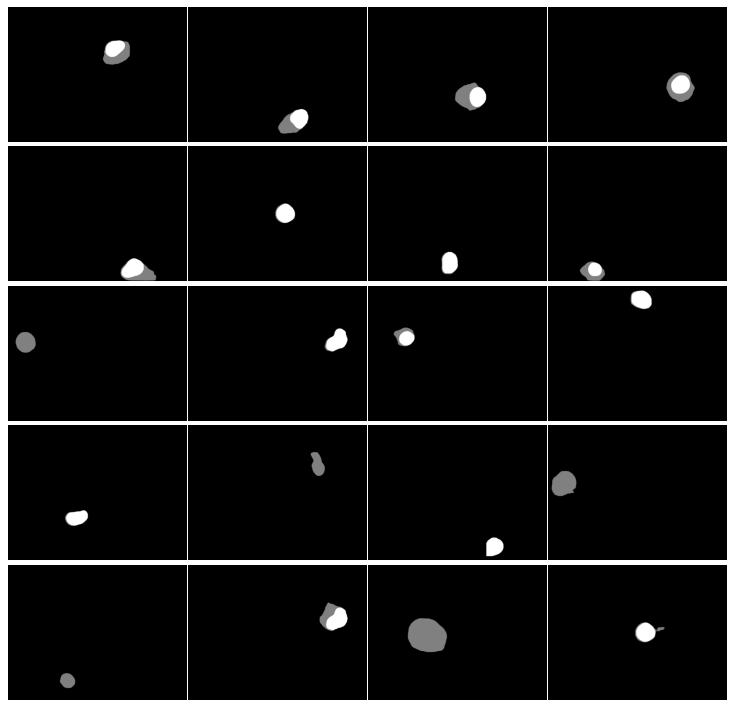

190 9400.bmp


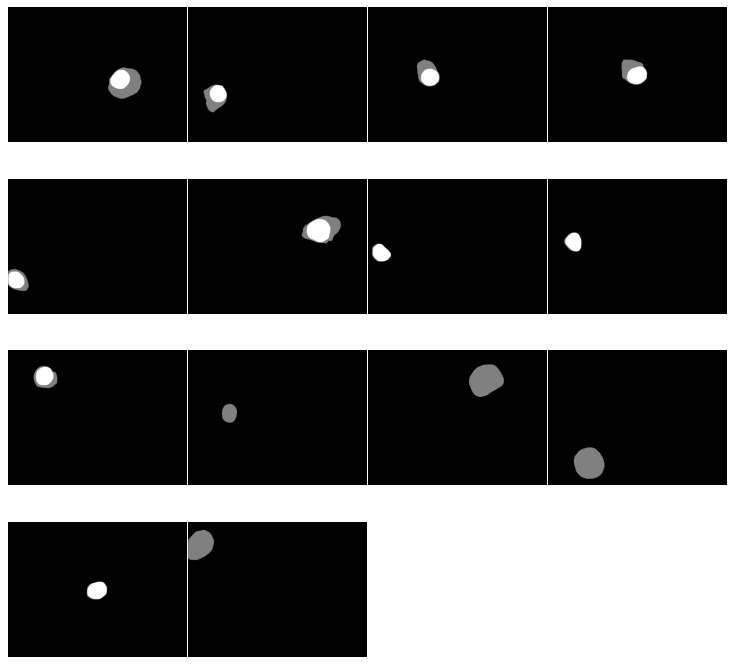

191 9403.bmp


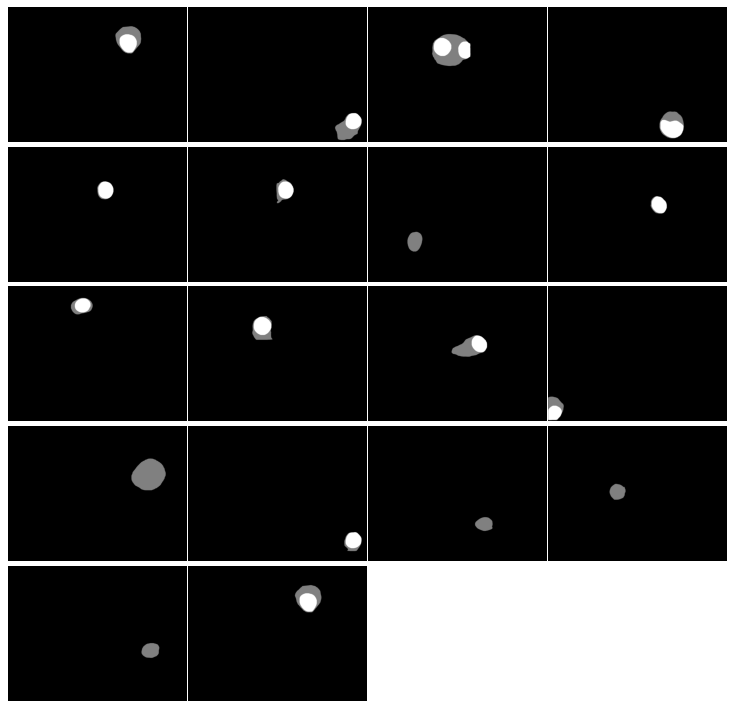

192 9404.bmp


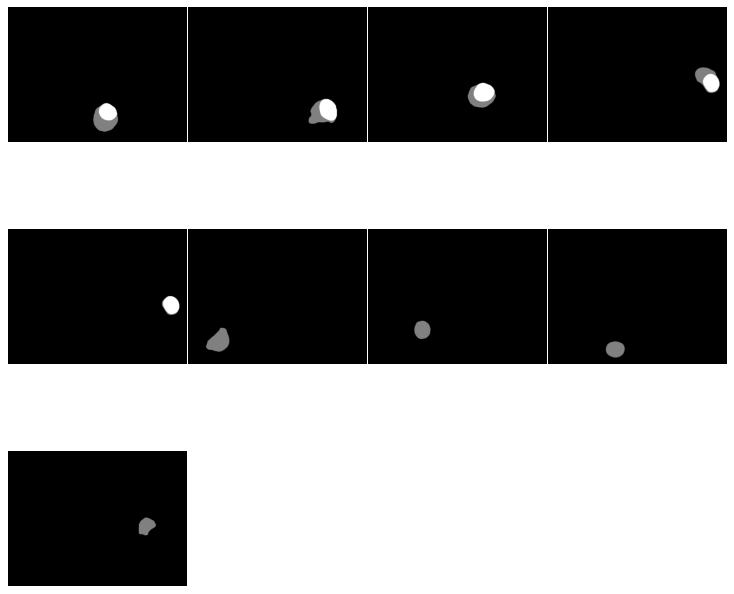

193 9414.bmp


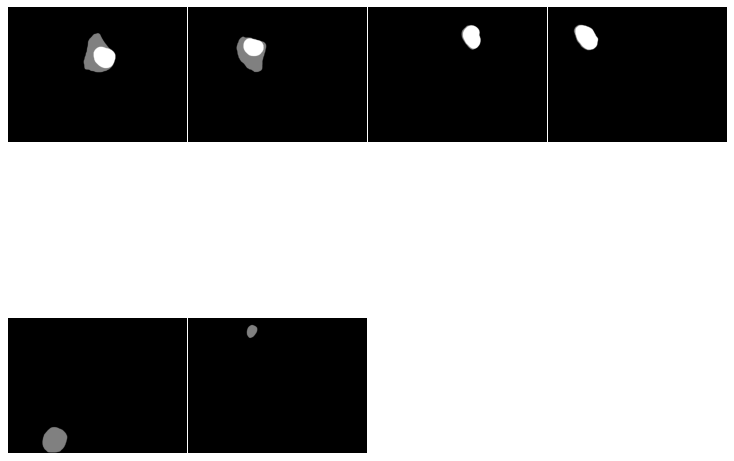

194 9415.bmp


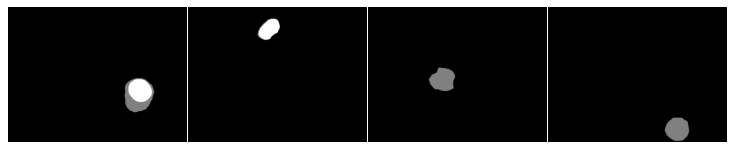

195 9429.bmp


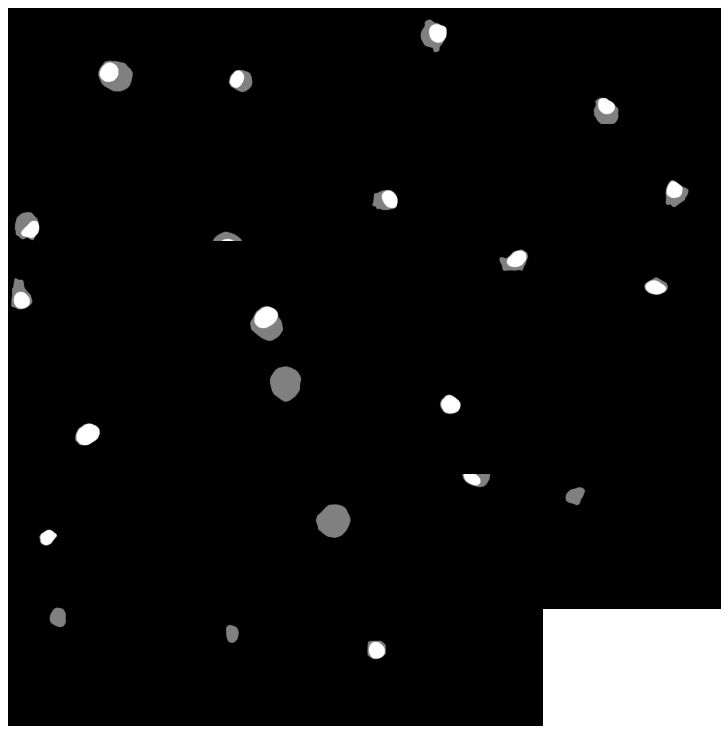

196 9434.bmp


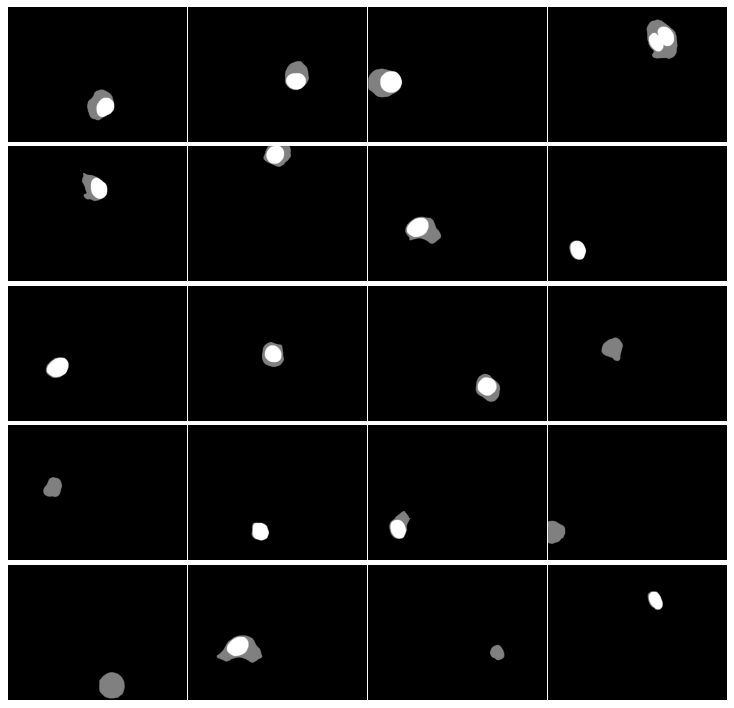

197 9437.bmp


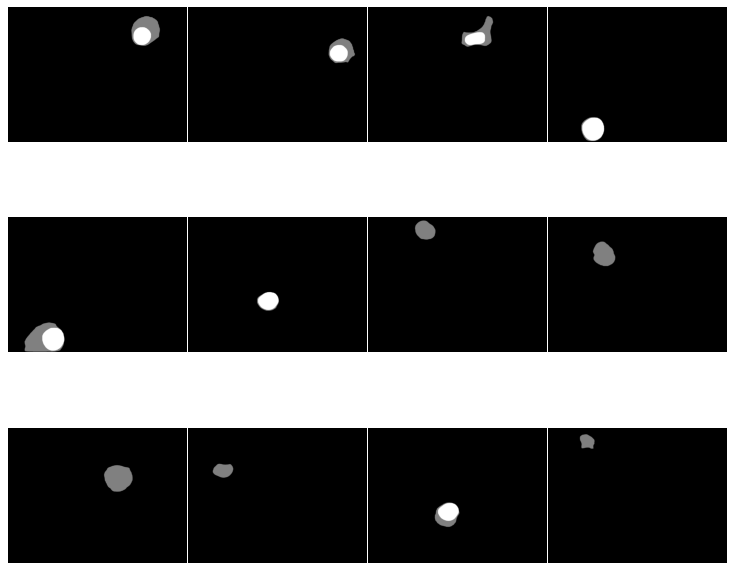

198 9446.bmp


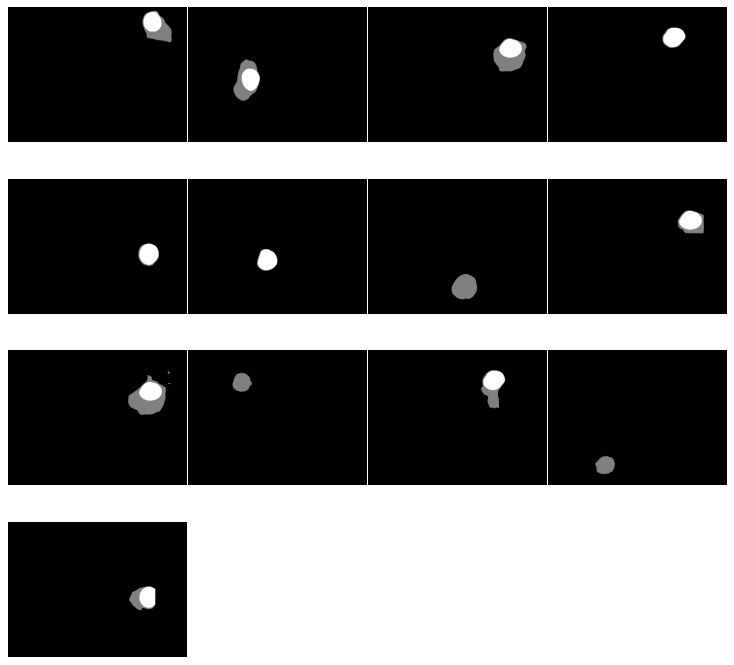

199 9457.bmp


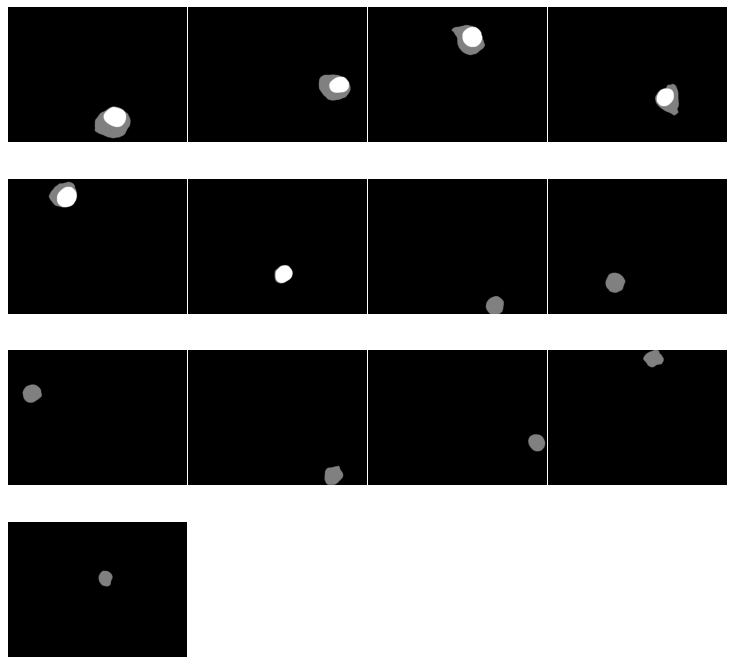

200 9467.bmp


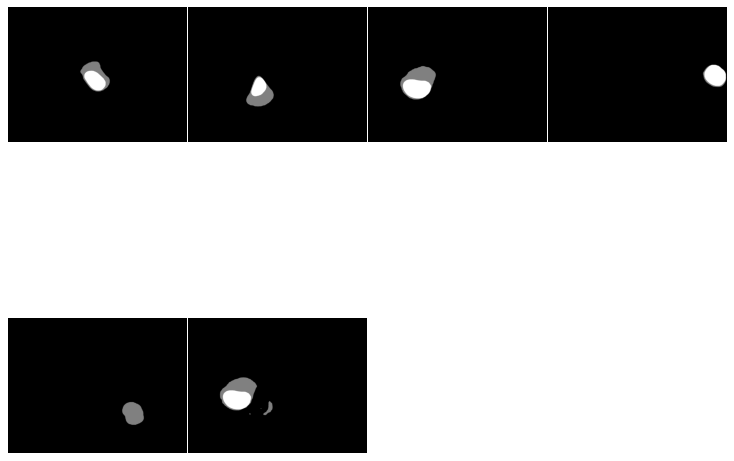

201 9468.bmp


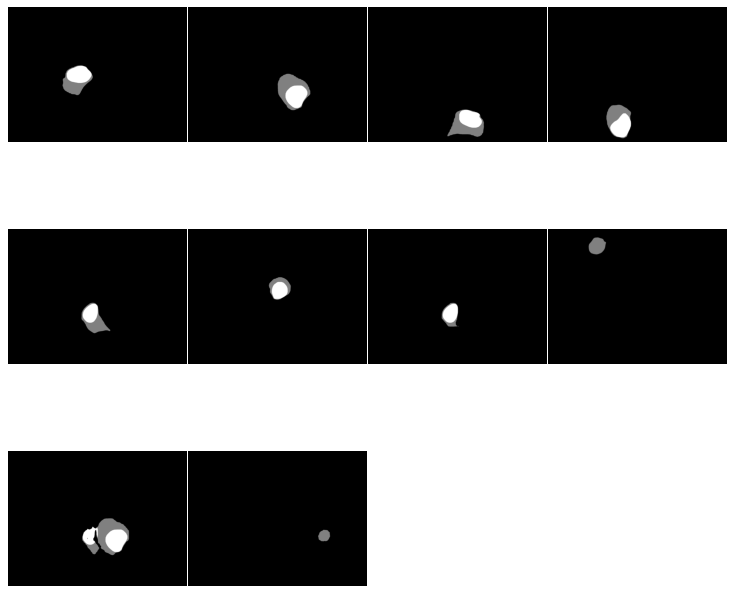

202 9470.bmp


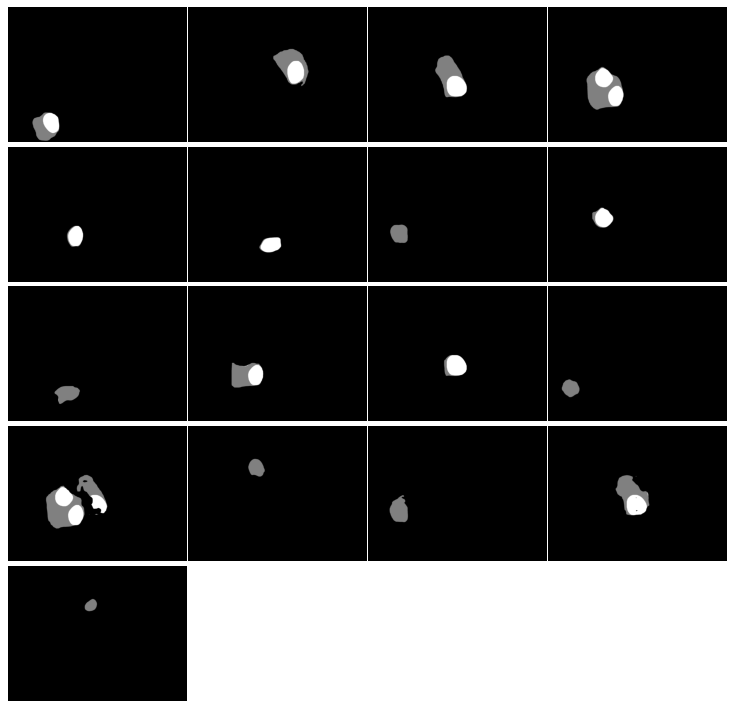

203 9477.bmp


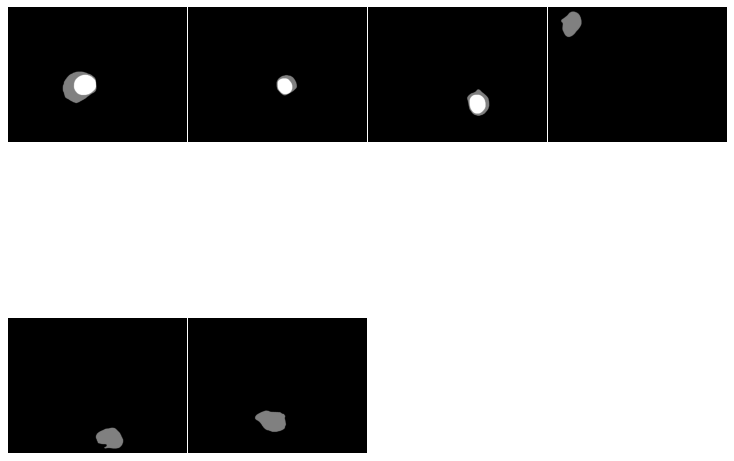

204 9485.bmp


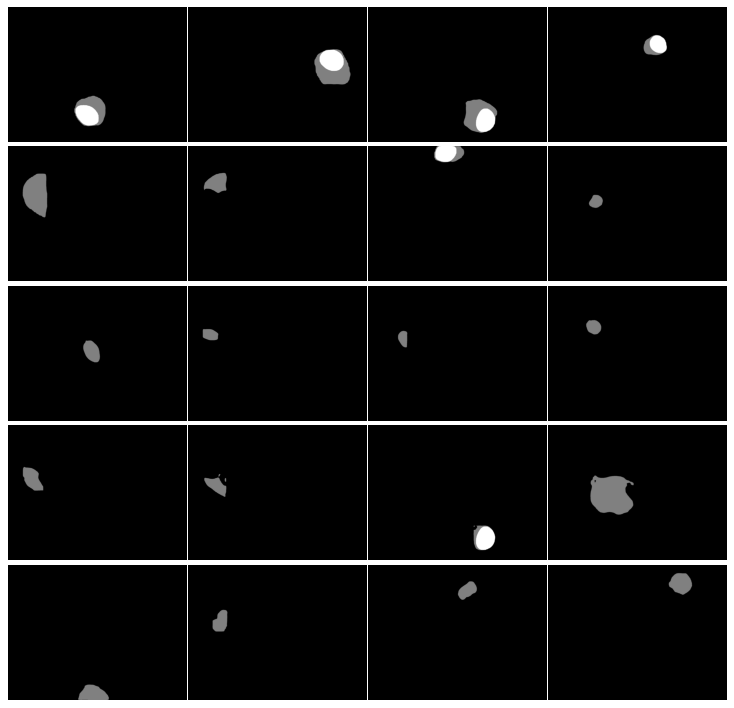

205 9495.bmp


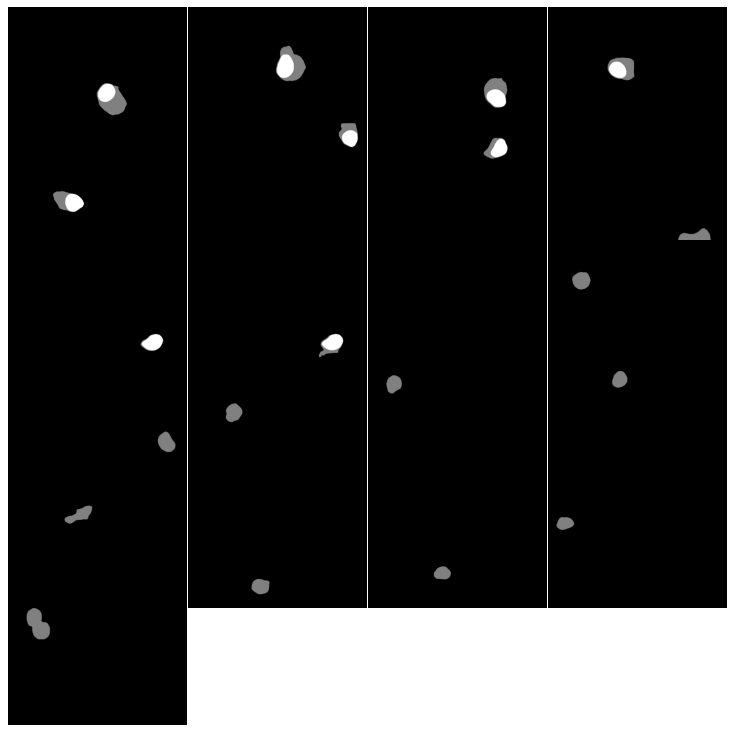

206 9500.bmp


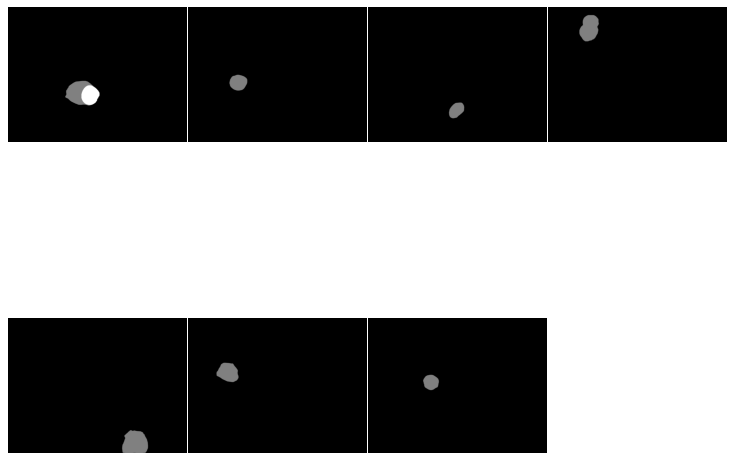

207 9515.bmp


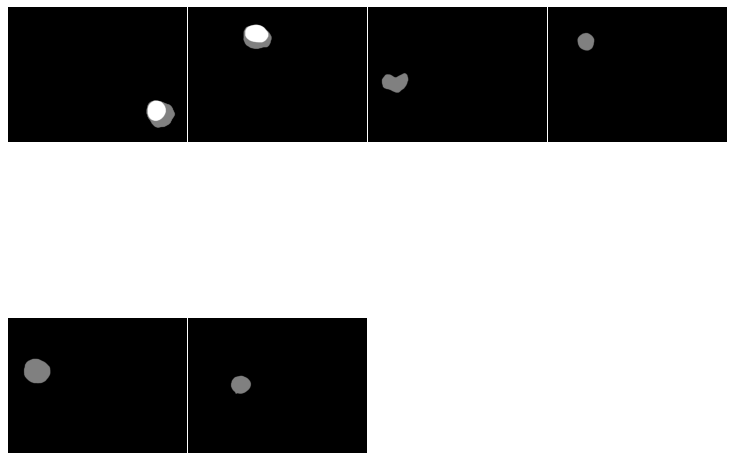

208 9522.bmp


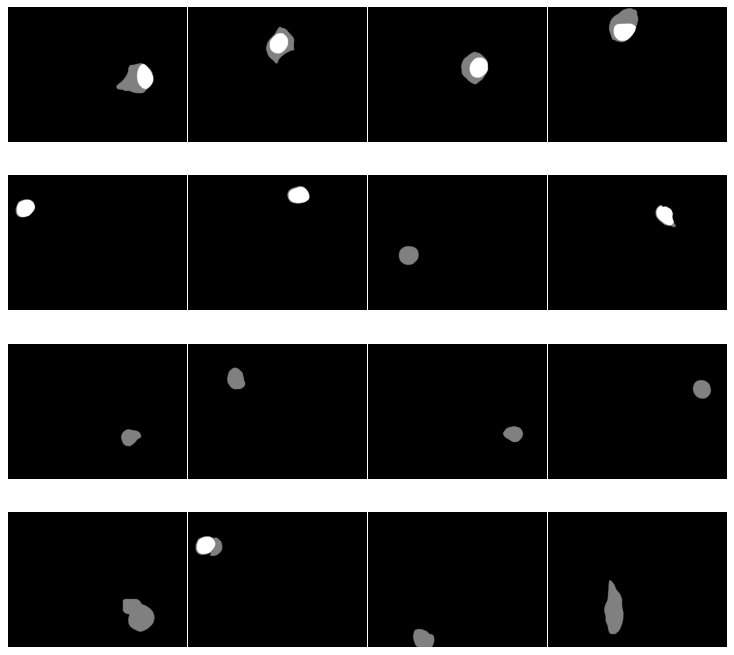

209 9524.bmp


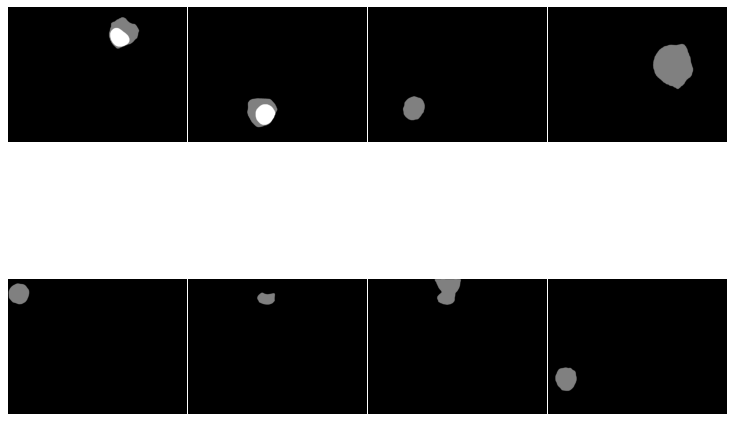

210 9525.bmp


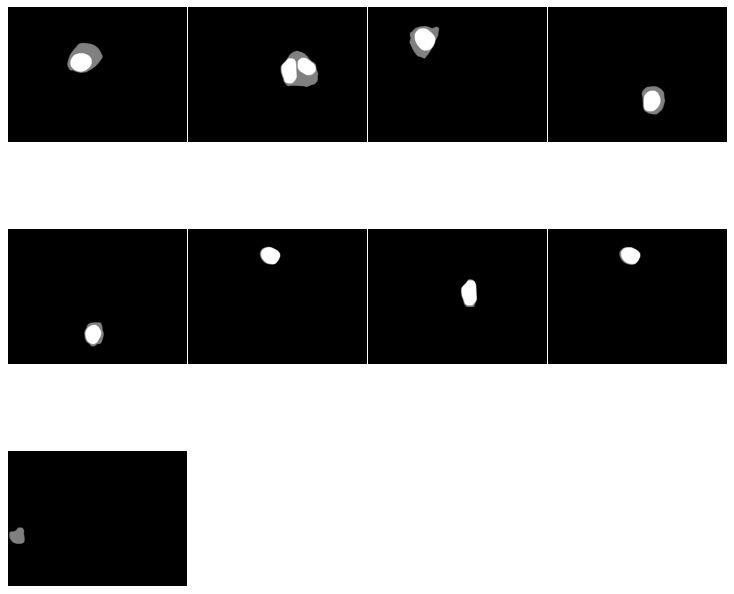

211 9530.bmp


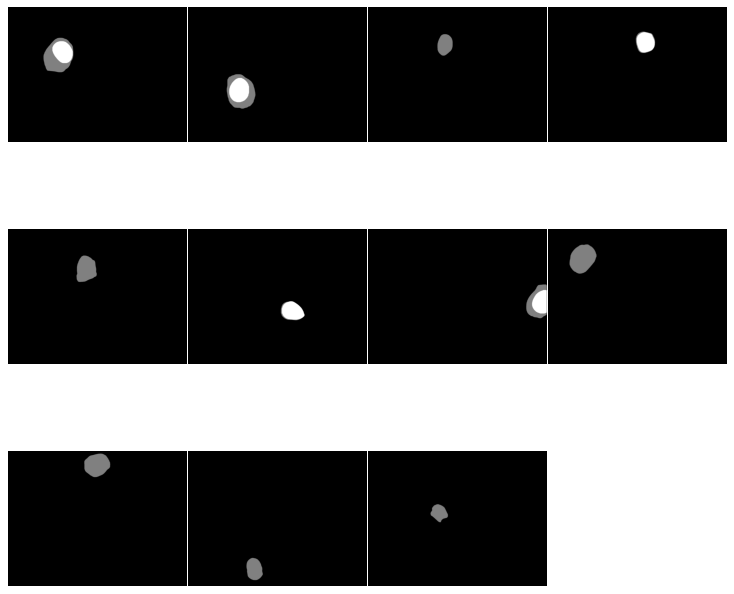

212 9532.bmp


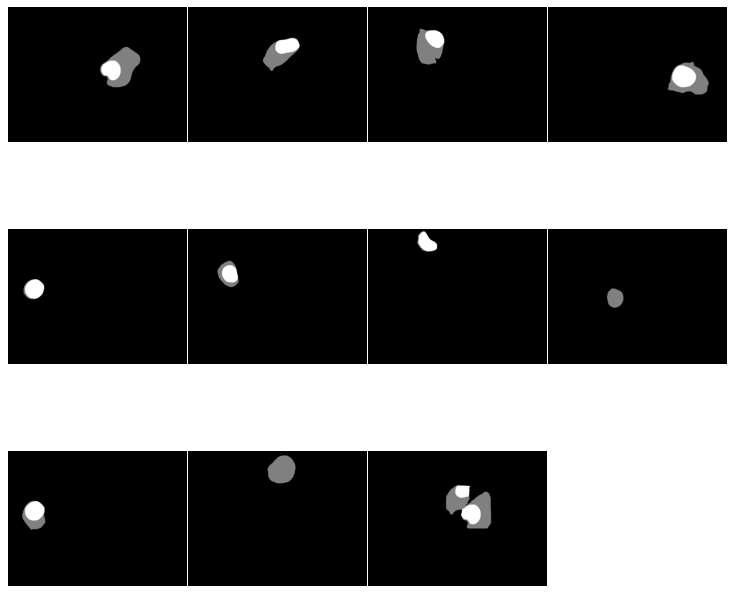

213 9578.bmp


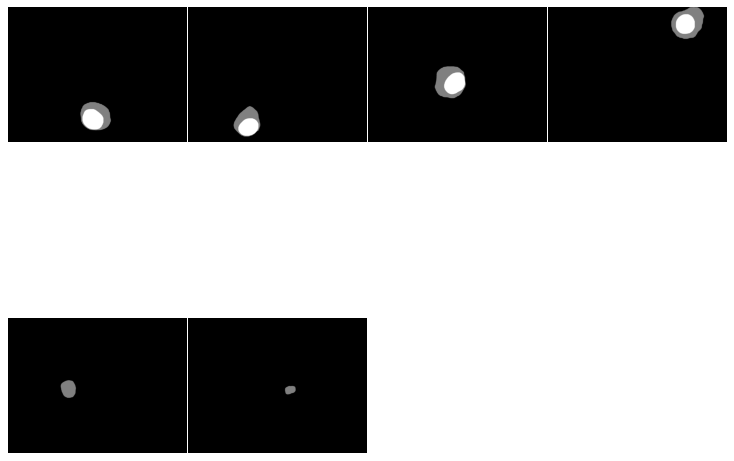

214 9586.bmp


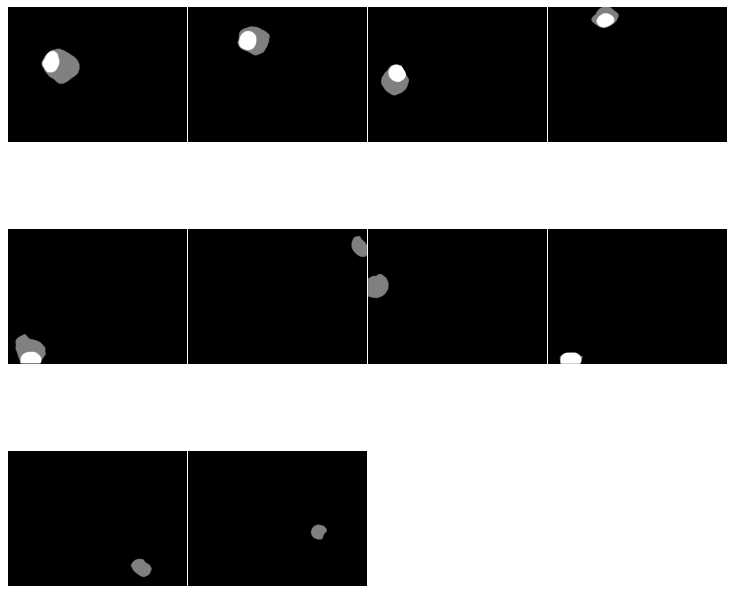

215 9587.bmp


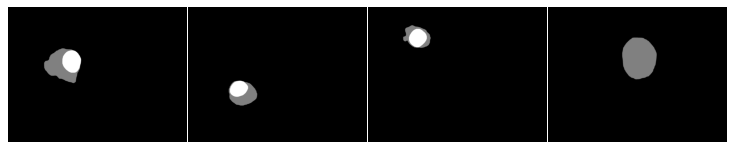

216 9589.bmp


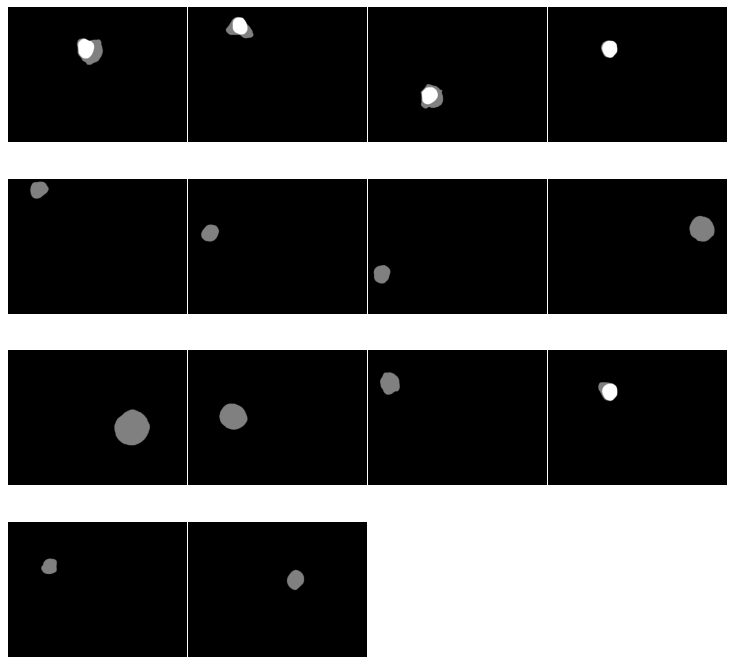

217 9592.bmp


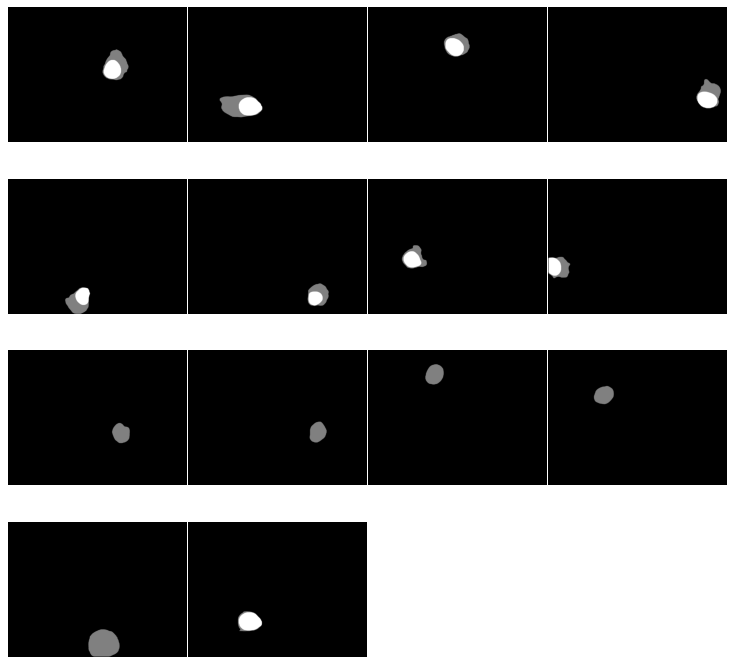

218 9603.bmp


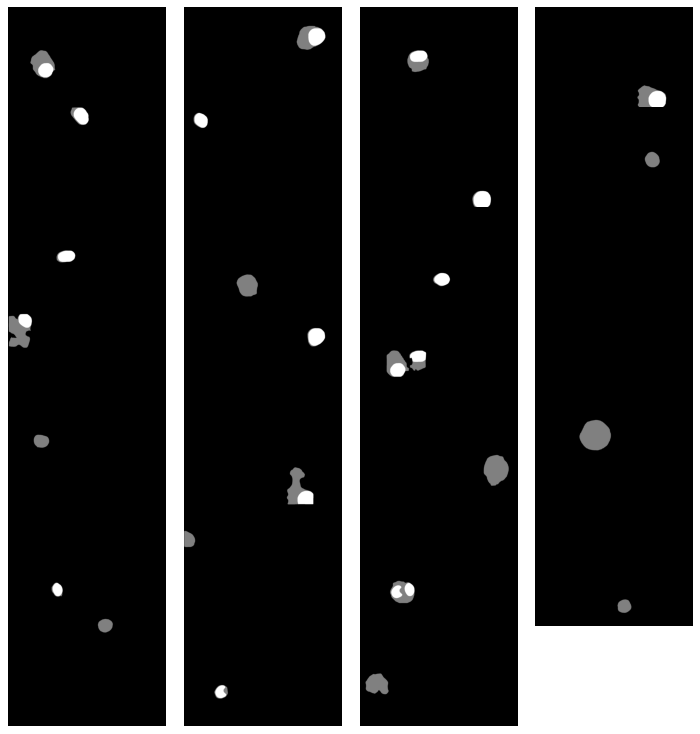

219 9616.bmp


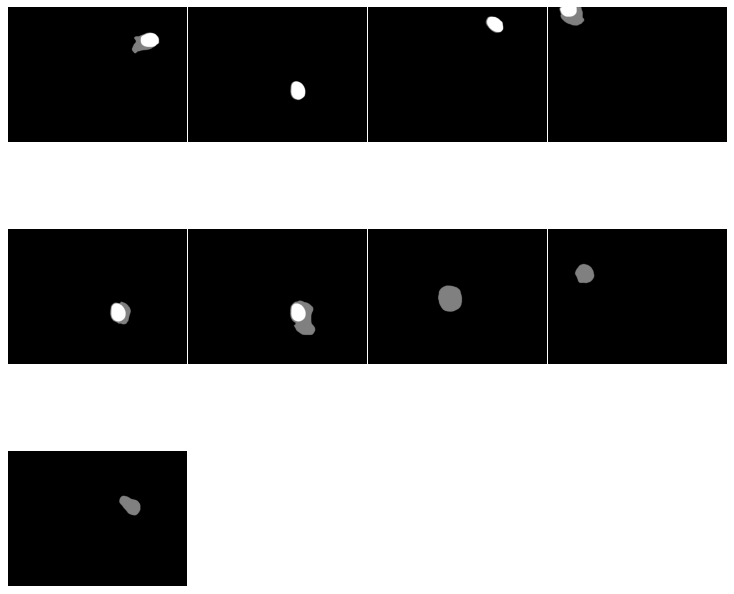

220 9618.bmp


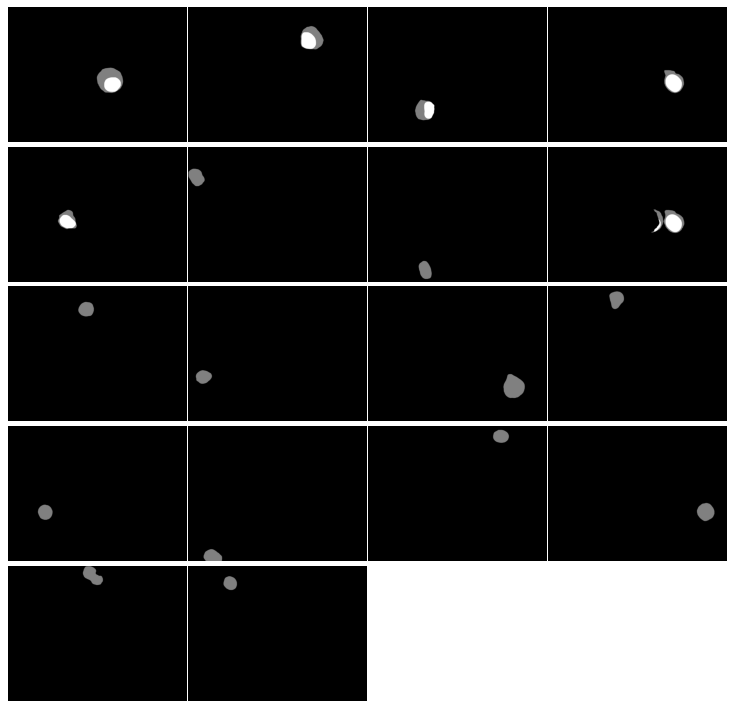

221 9624.bmp


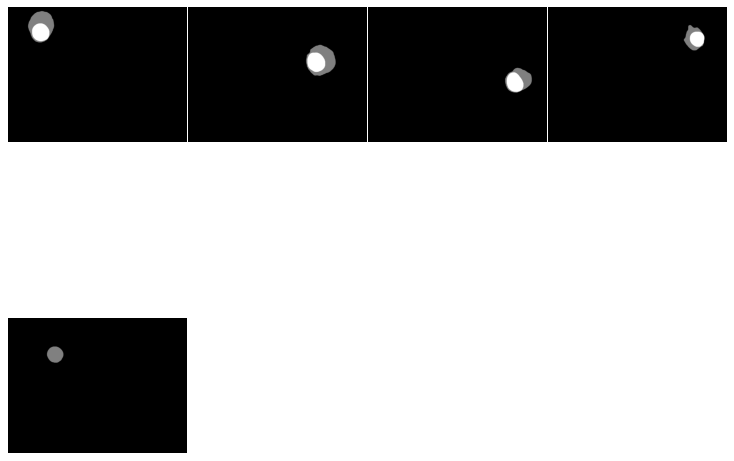

222 9646.bmp


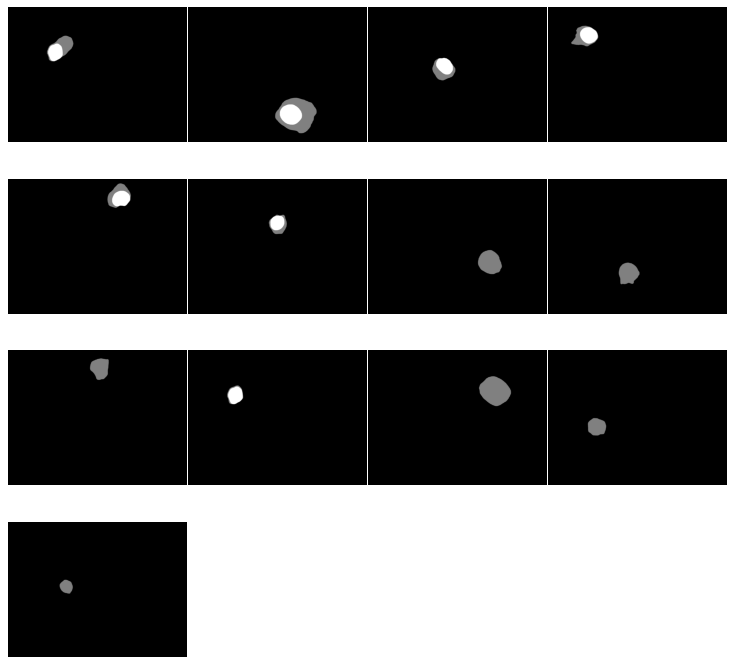

223 9651.bmp


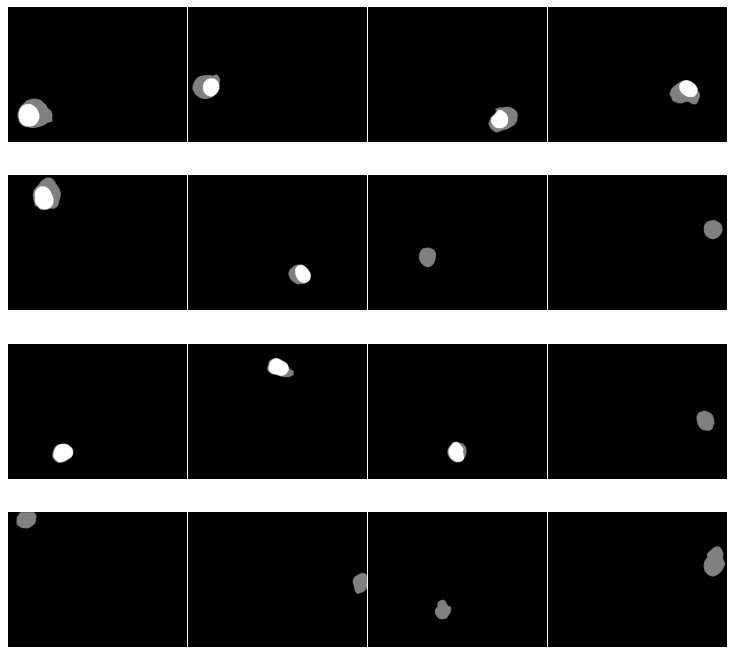

224 9655.bmp


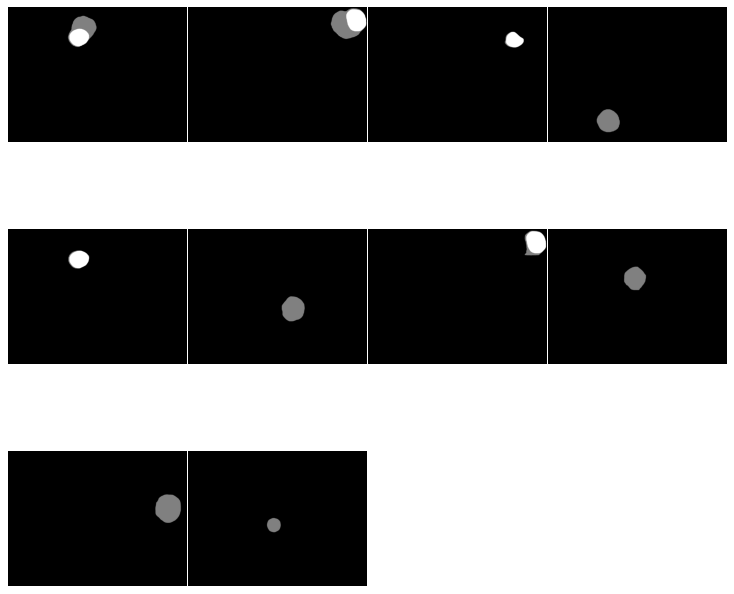

225 9661.bmp


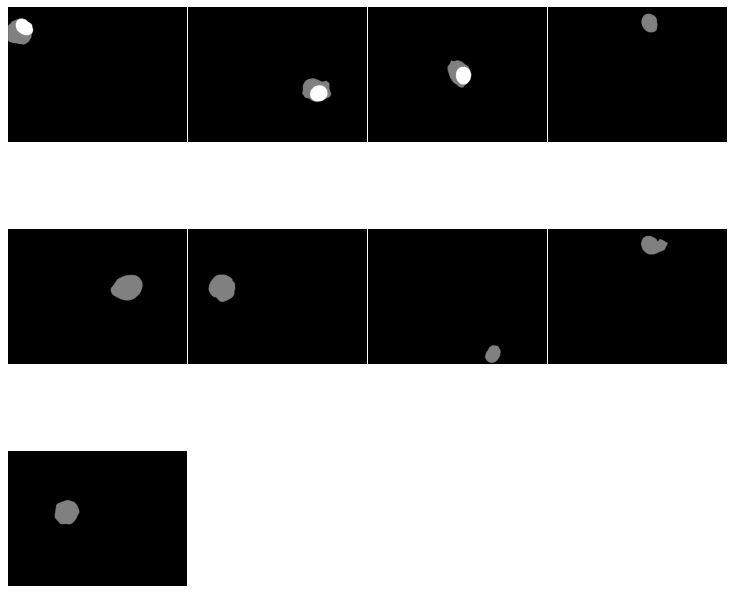

226 9663.bmp


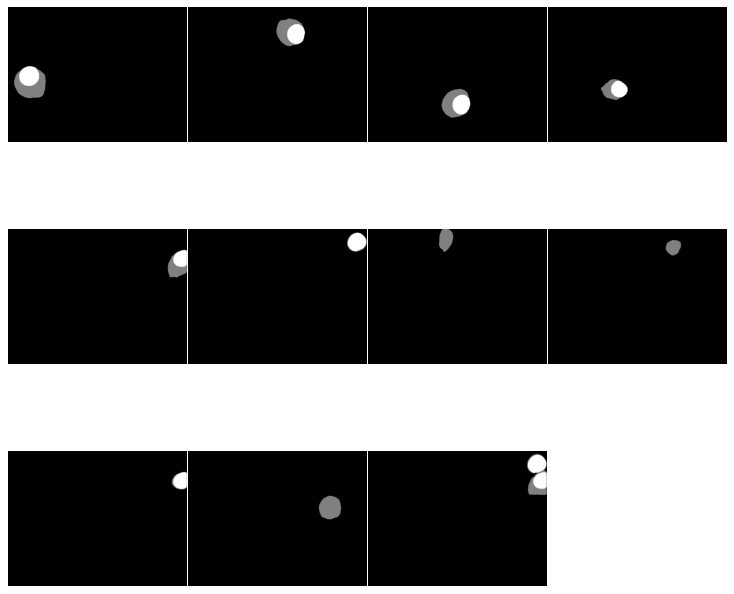

227 9669.bmp


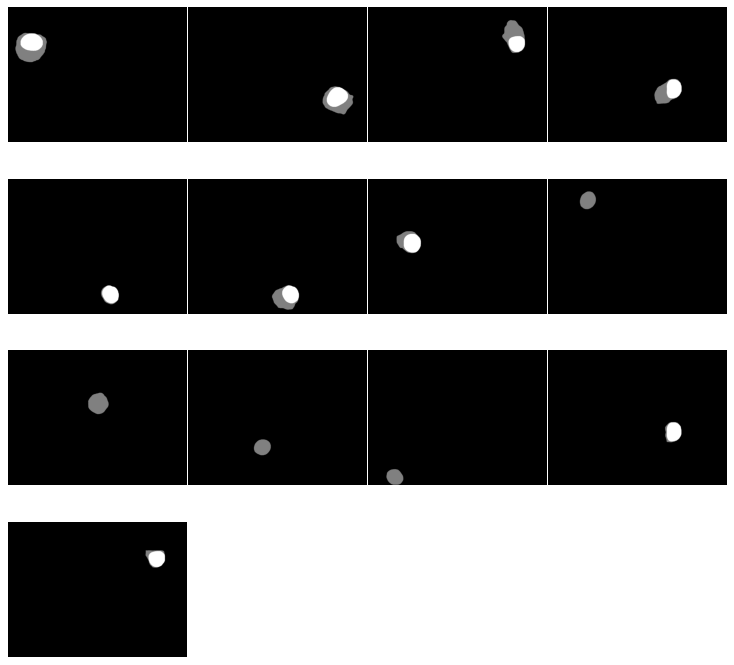

228 9675.bmp


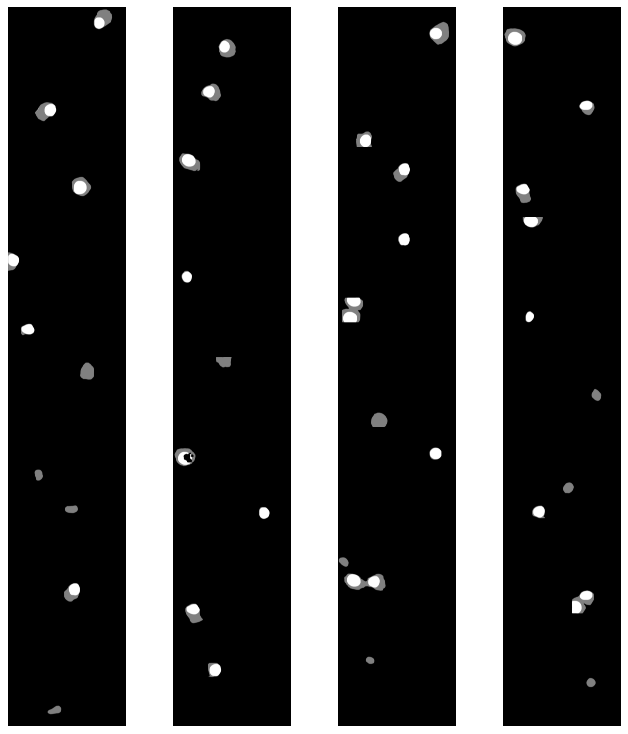

229 9676.bmp


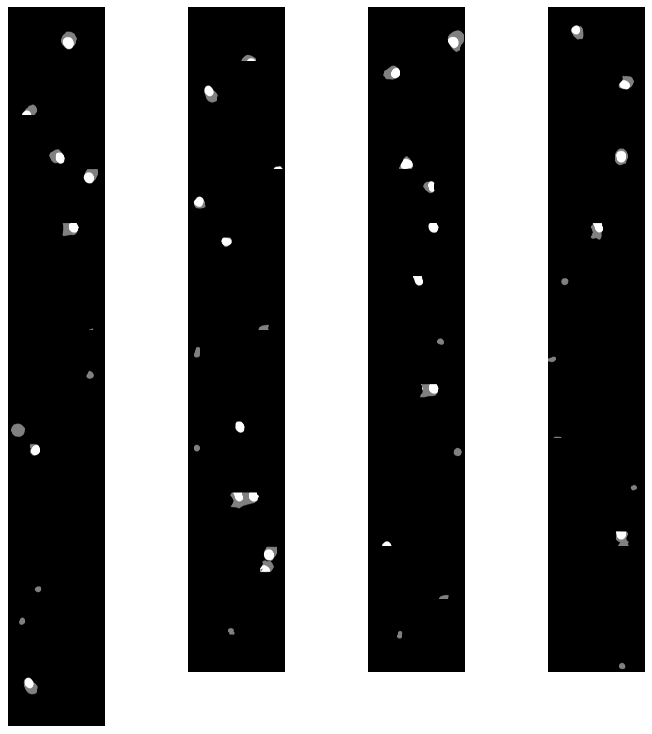

230 9682.bmp


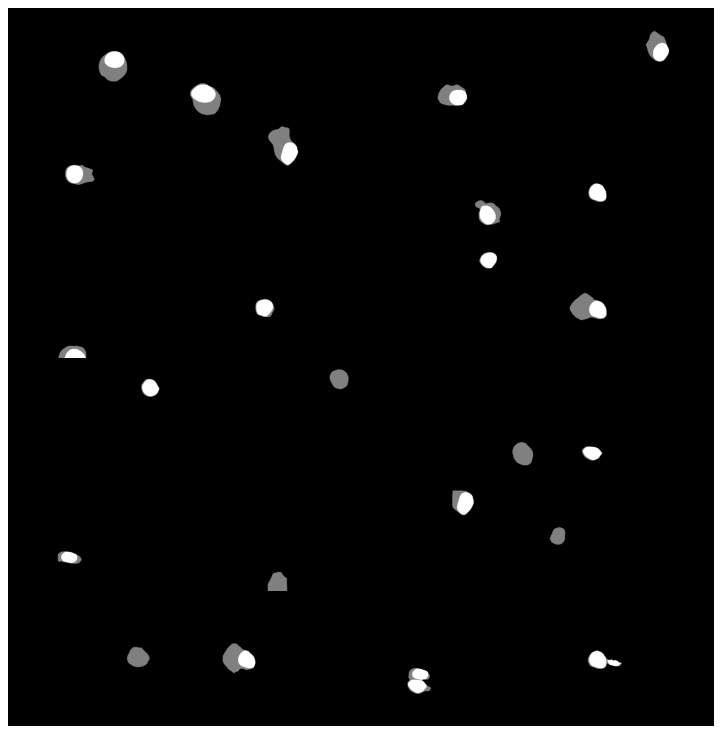

231 9711.bmp


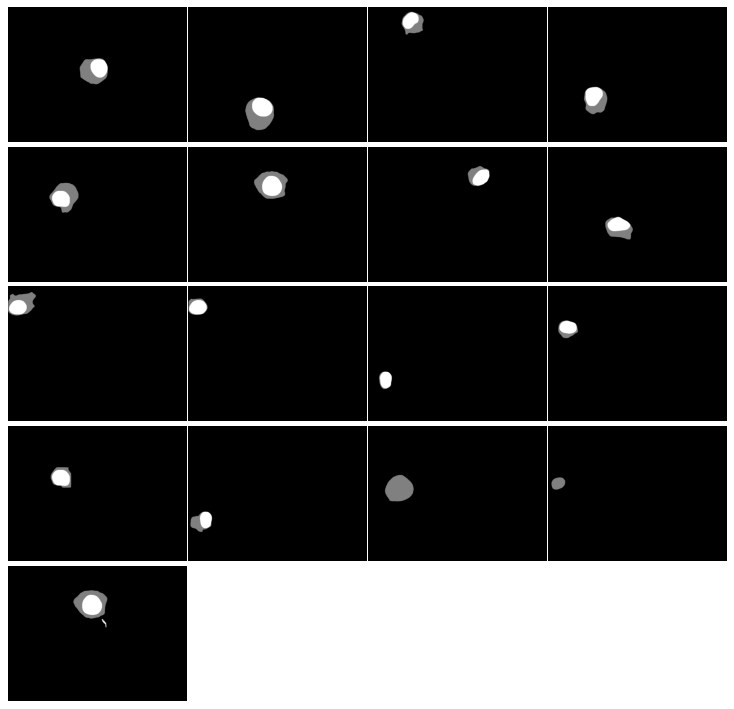

232 9715.bmp


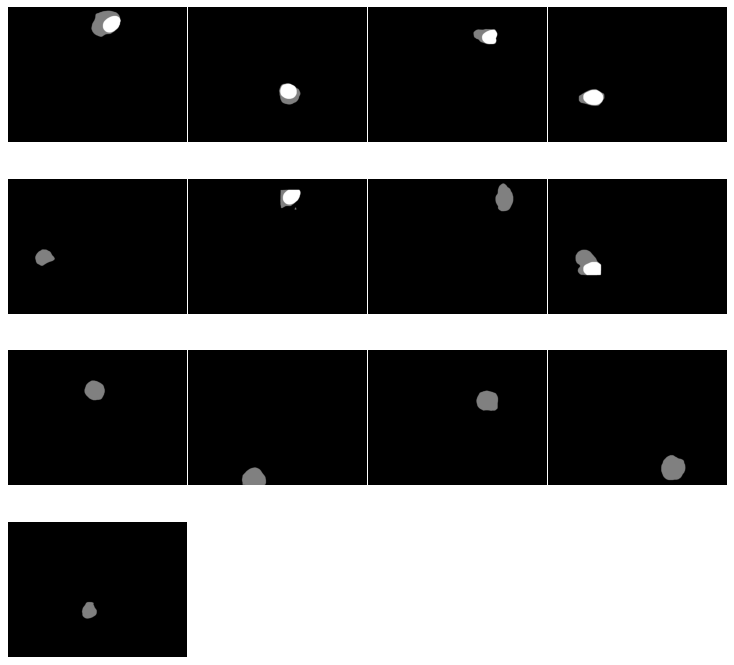

233 9716.bmp


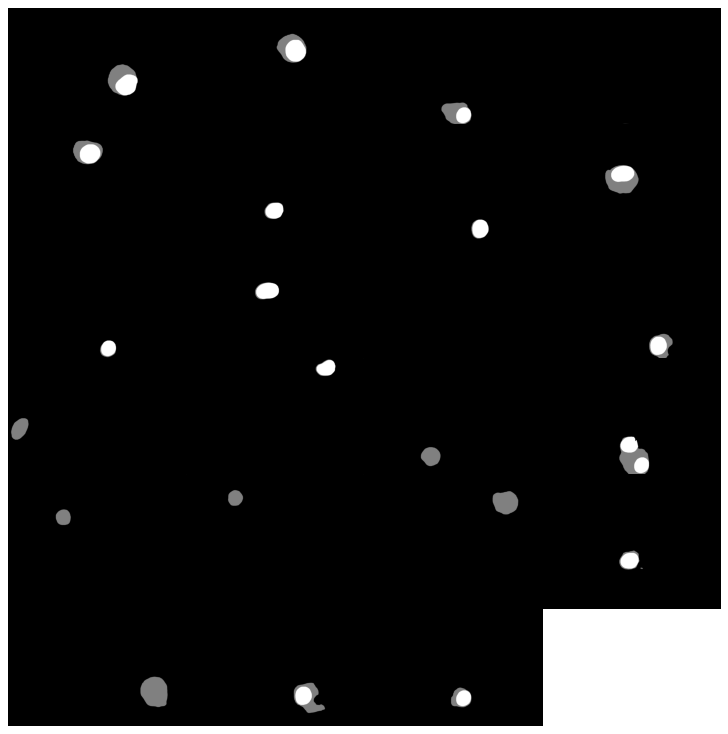

234 9733.bmp


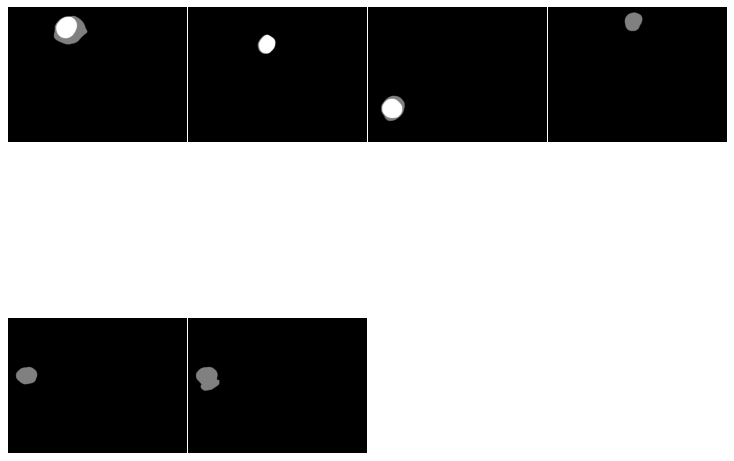

235 9735.bmp


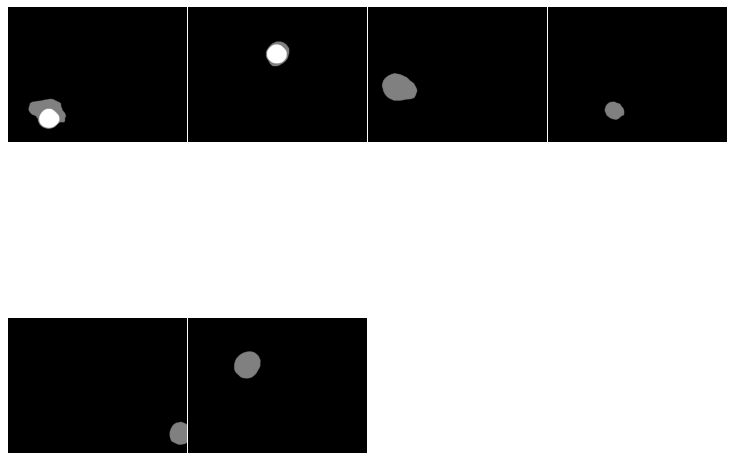

236 9740.bmp


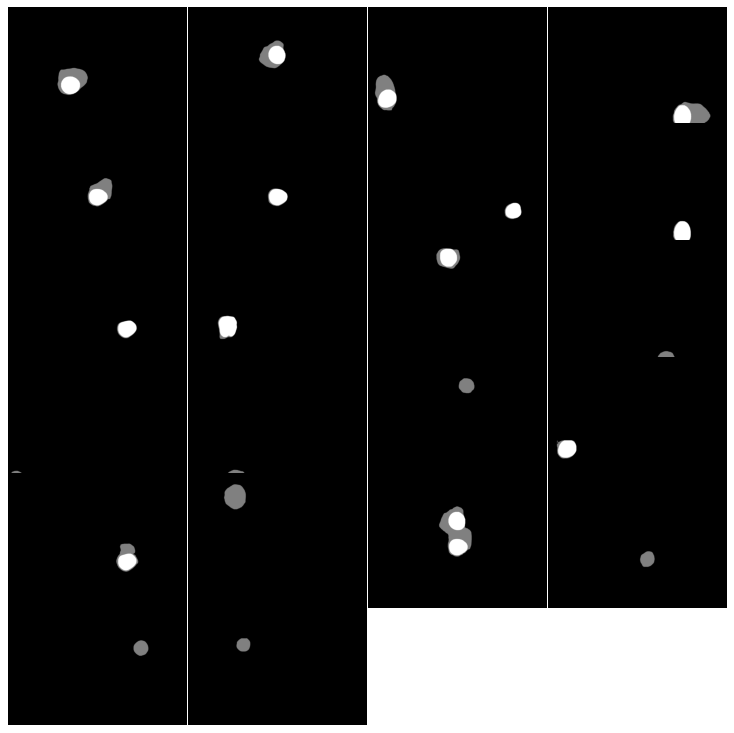

237 9742.bmp


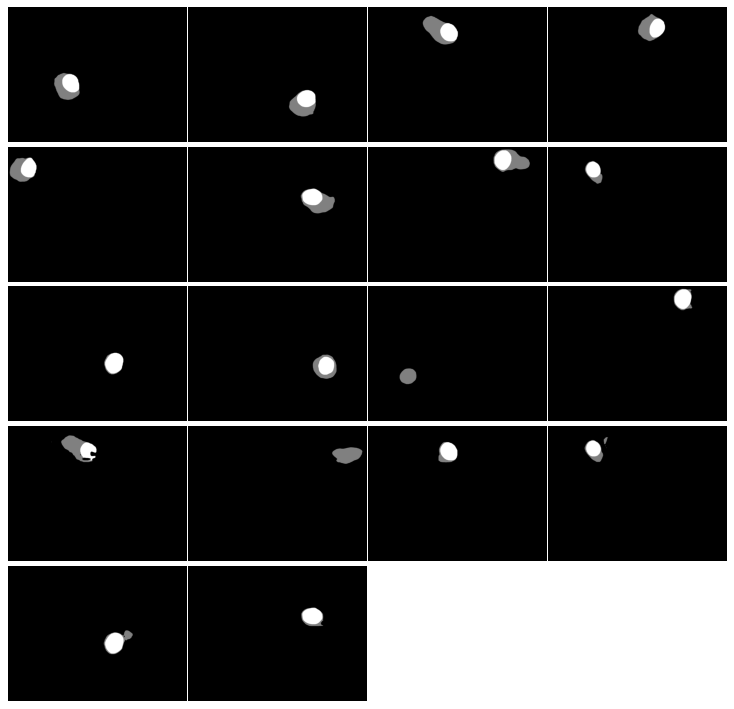

238 9744.bmp


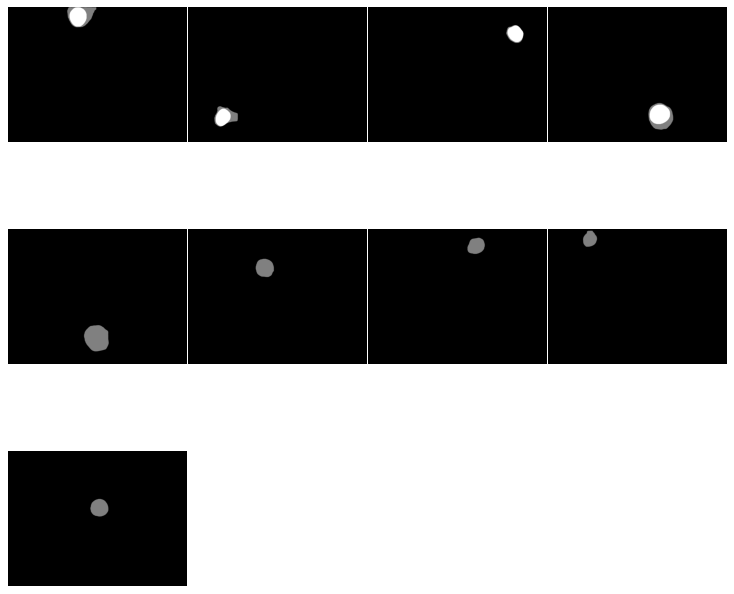

239 9753.bmp


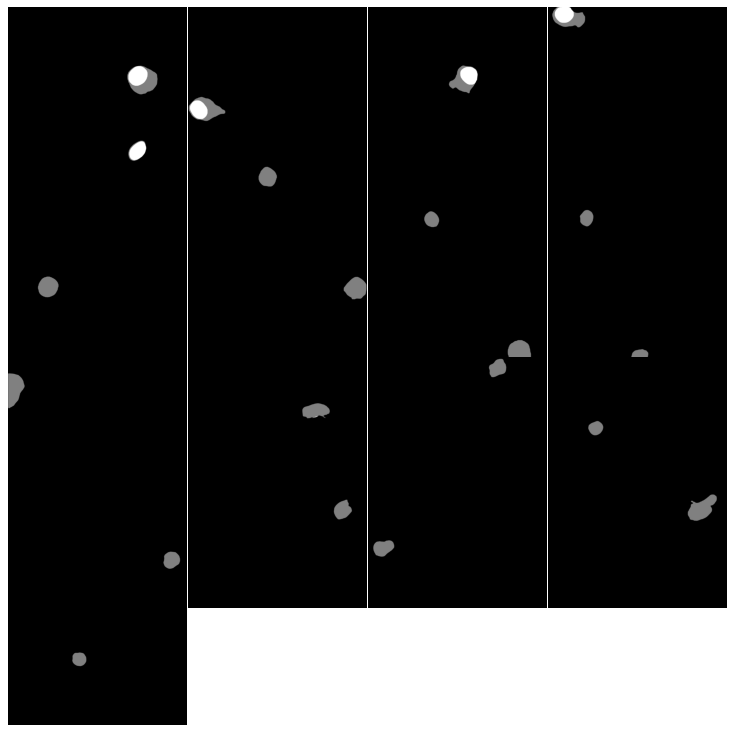

240 9755.bmp


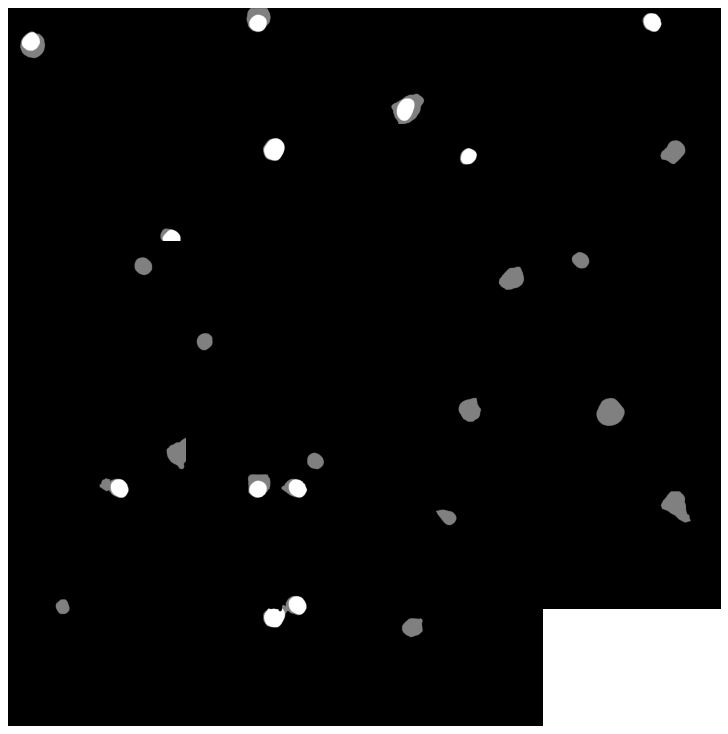

241 9761.bmp


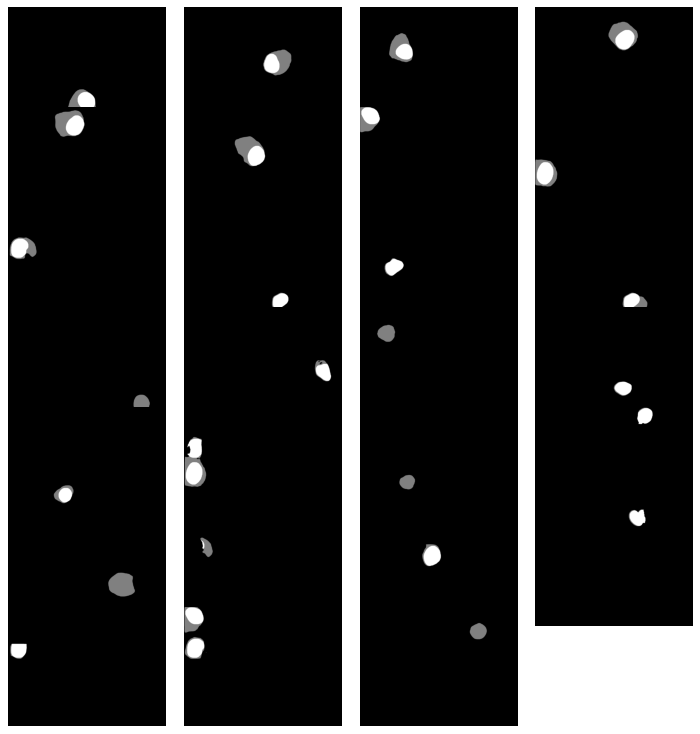

242 9763.bmp


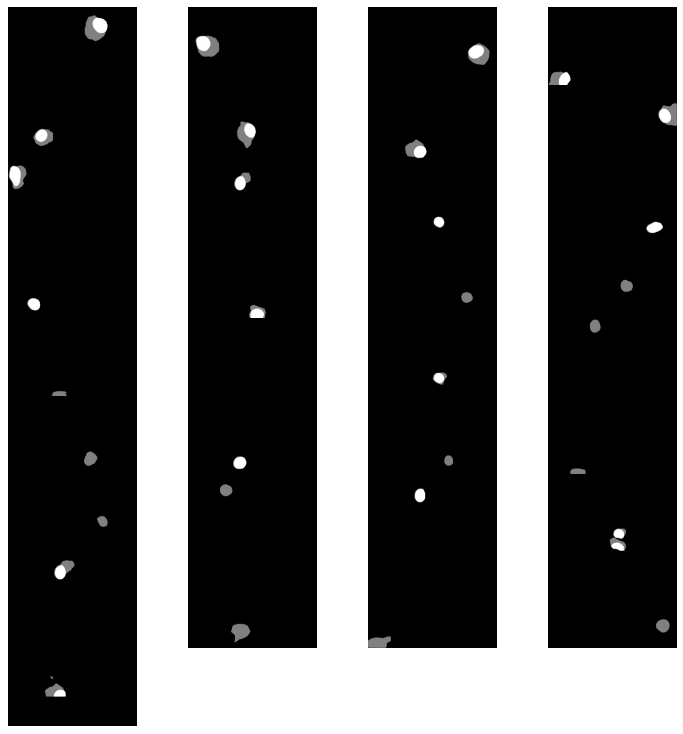

243 9764.bmp


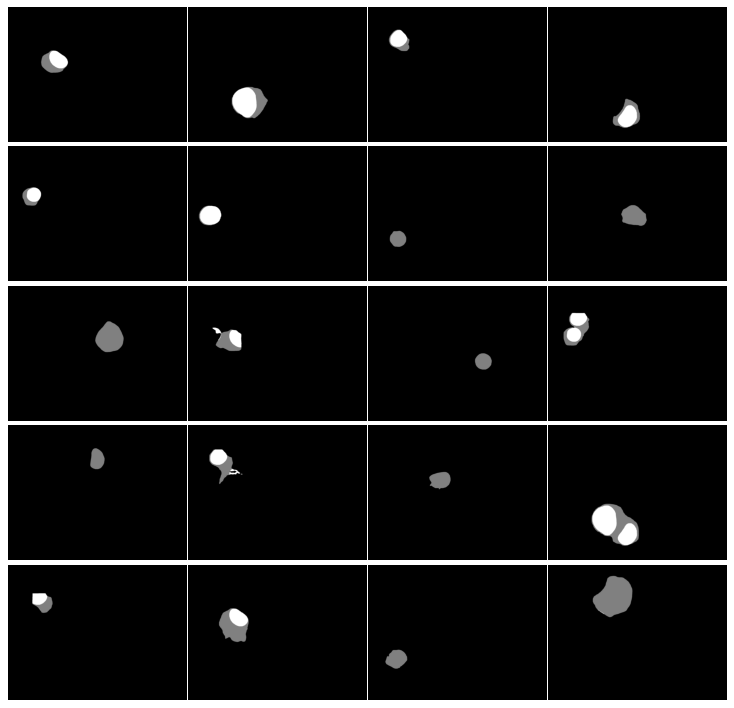

244 9766.bmp


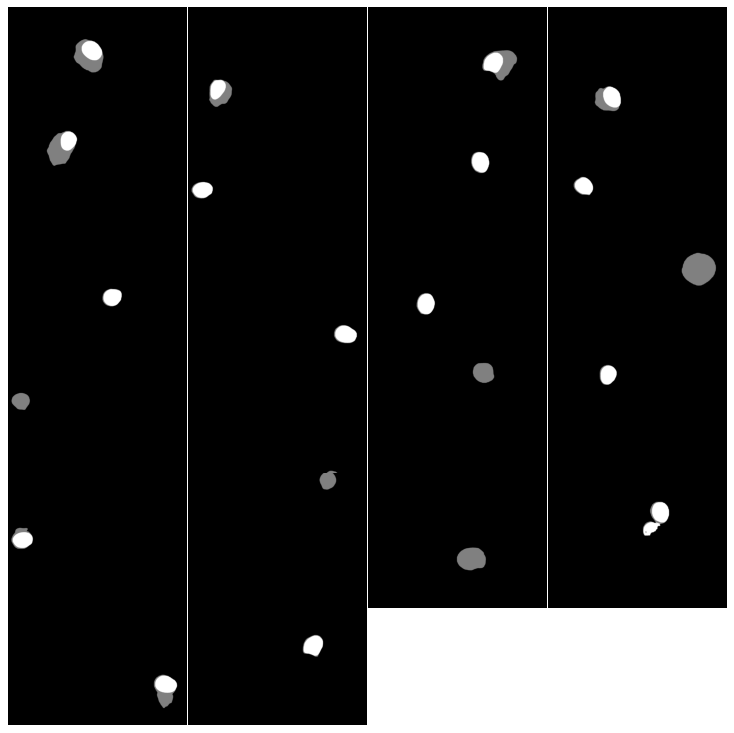

245 9769.bmp


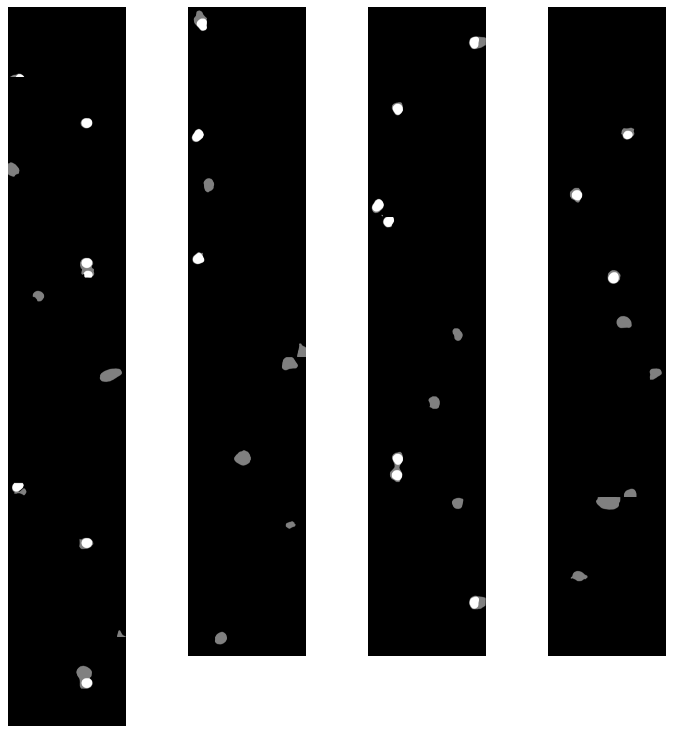

246 9770.bmp


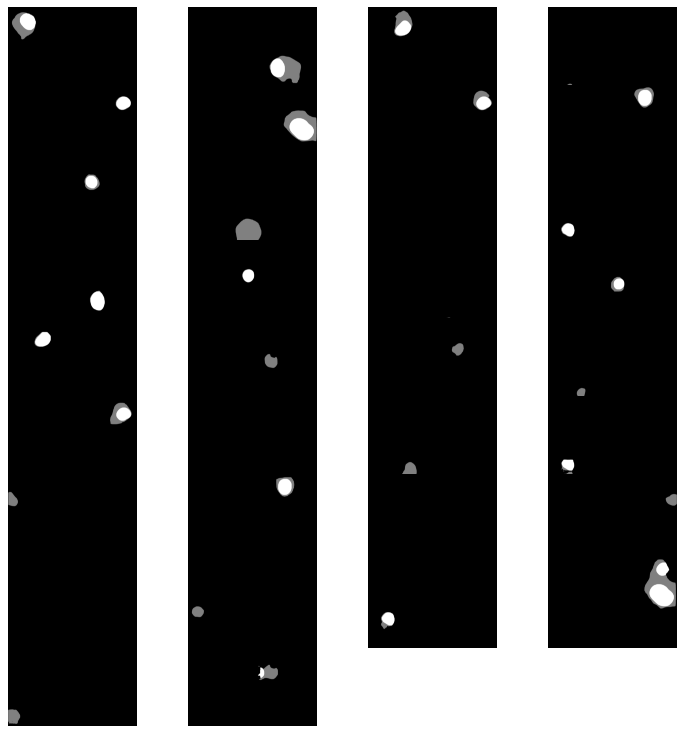

247 9771.bmp


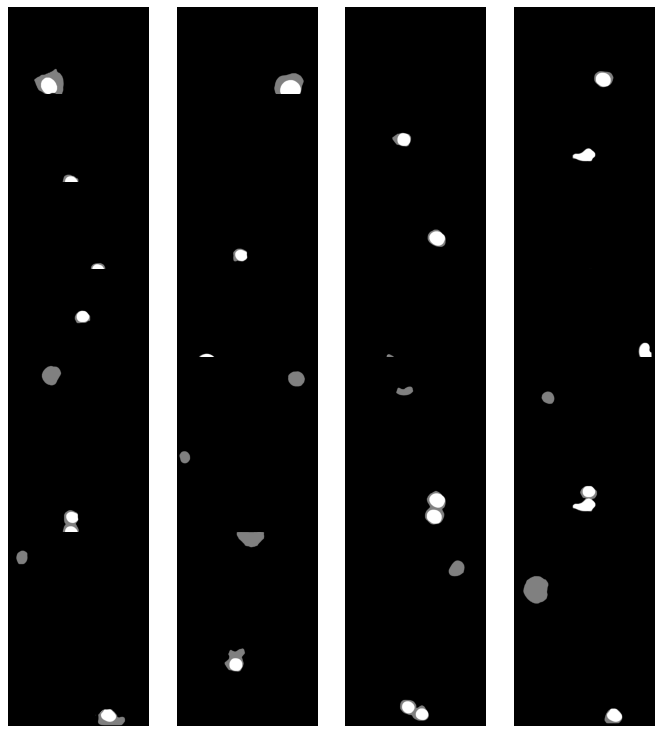

248 9777.bmp


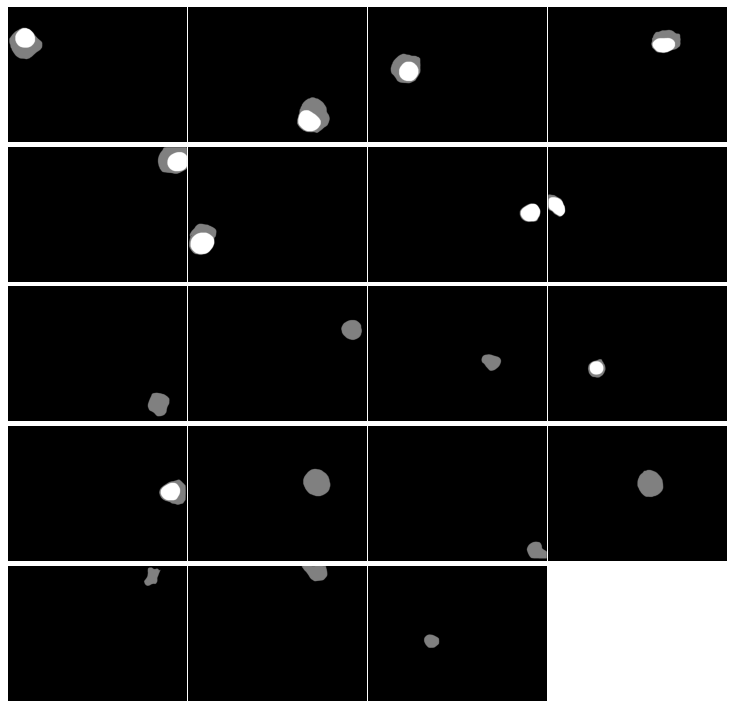

249 9781.bmp


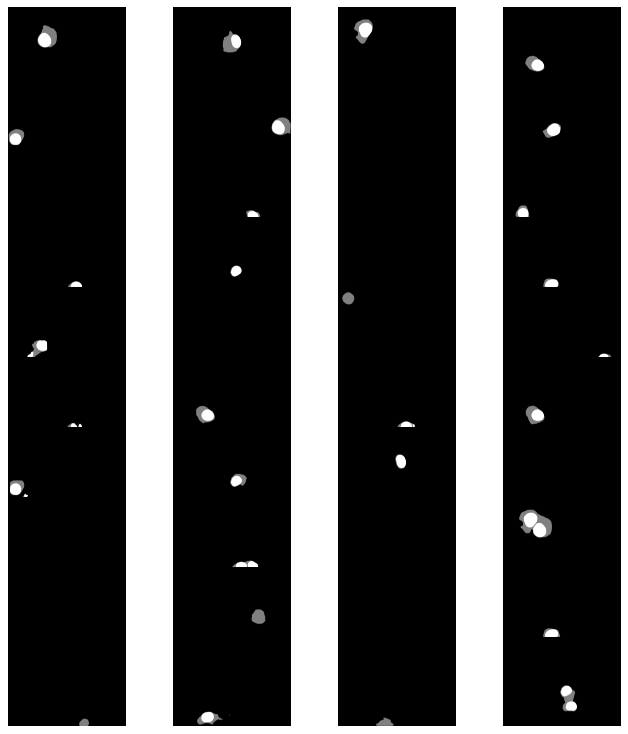

250 9787.bmp


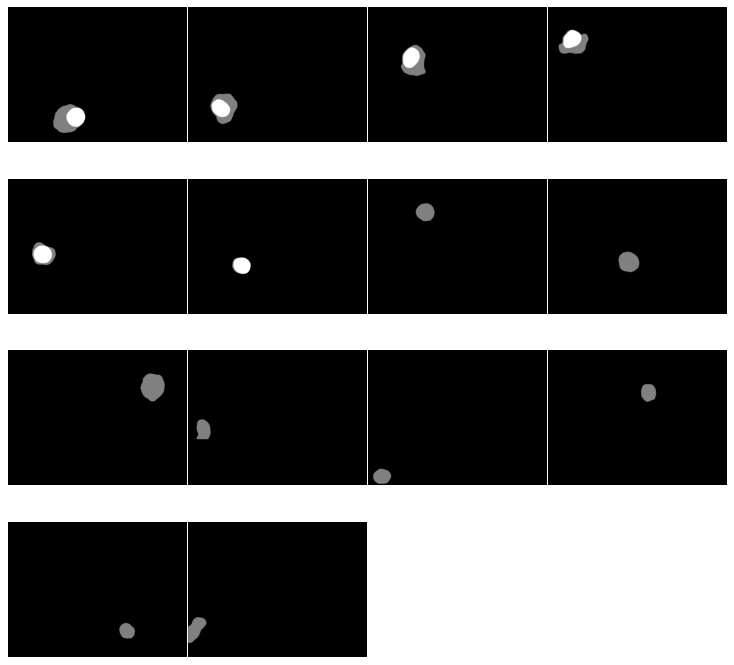

251 9802.bmp


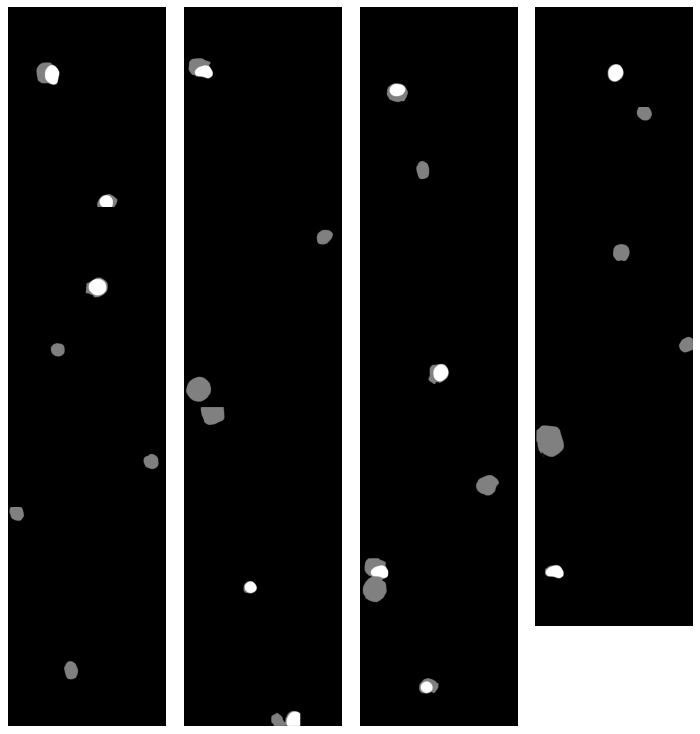

252 9807.bmp


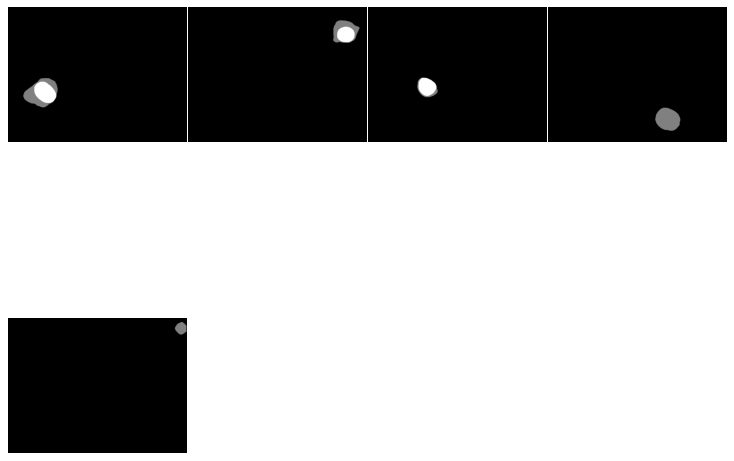

253 9808.bmp


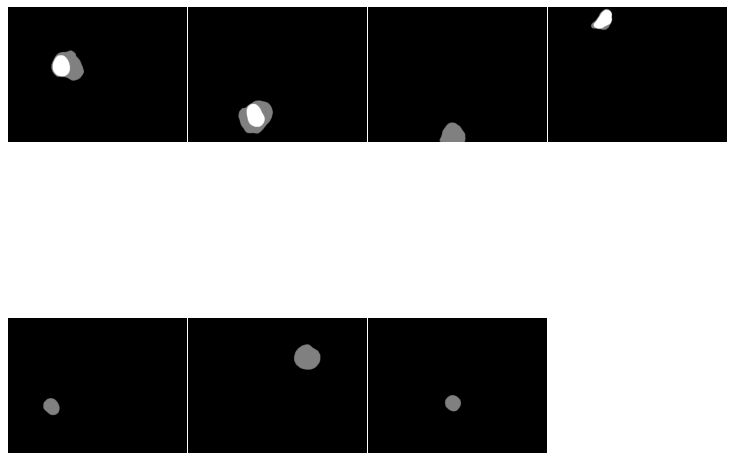

254 9813.bmp


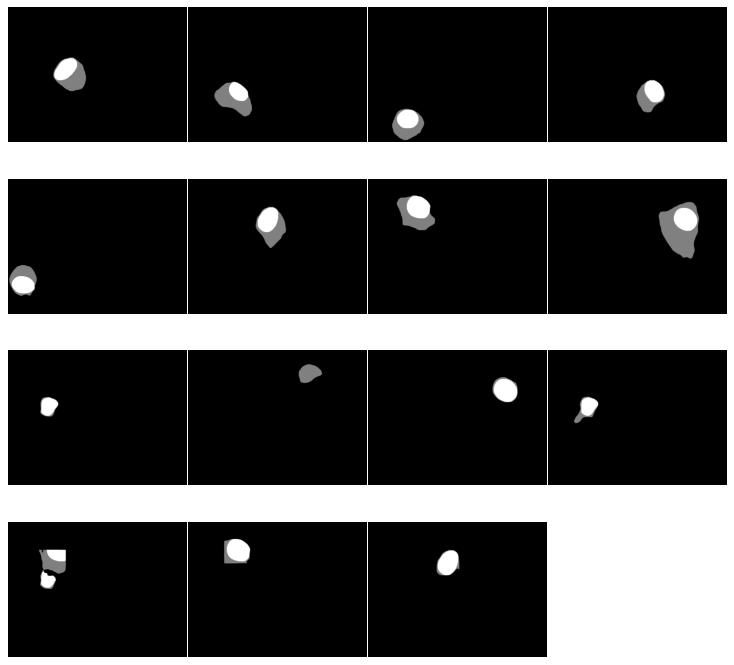

255 9824.bmp


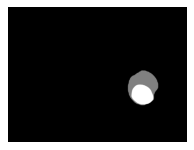

256 9828.bmp


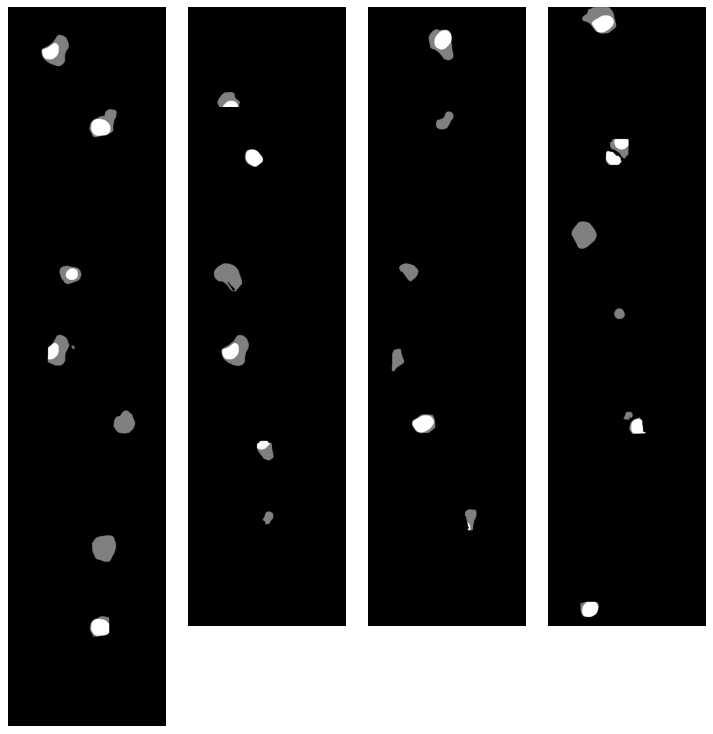

257 9834.bmp


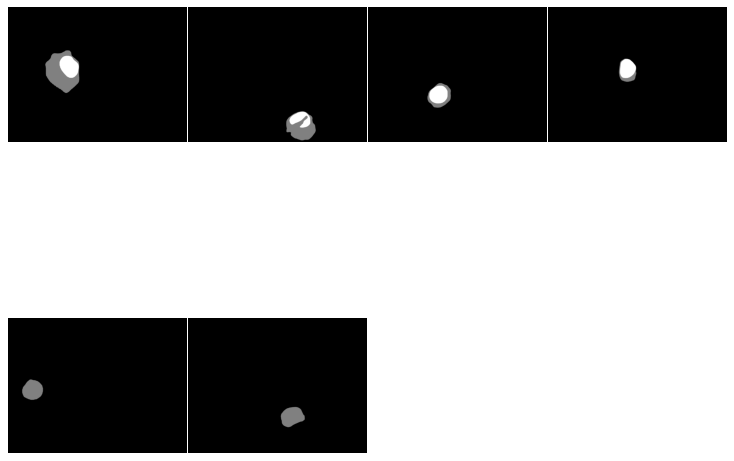

258 9836.bmp


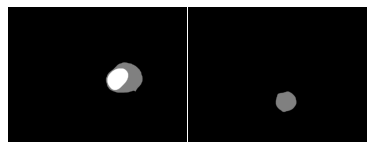

259 9837.bmp


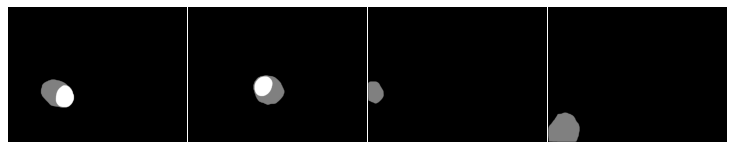

260 9839.bmp


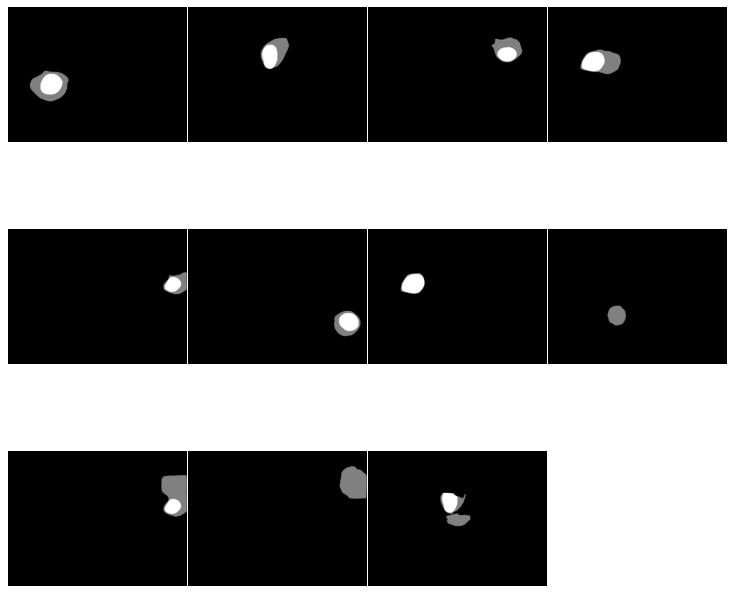

261 9840.bmp


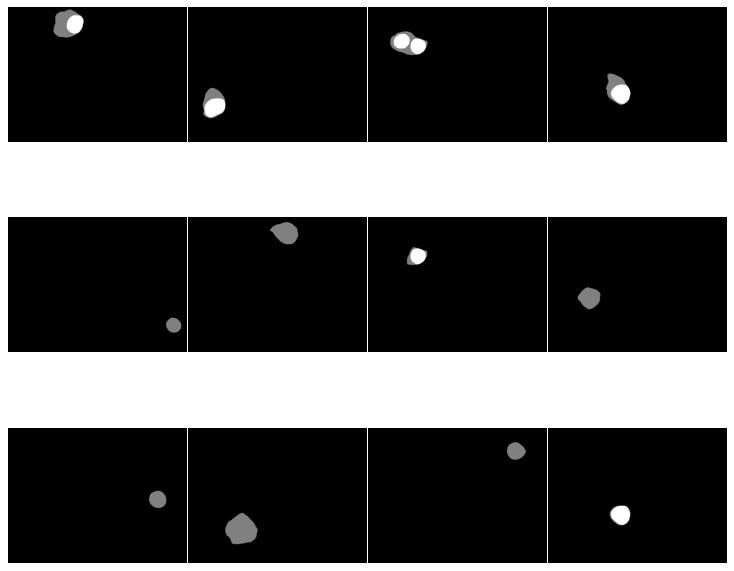

262 9843.bmp


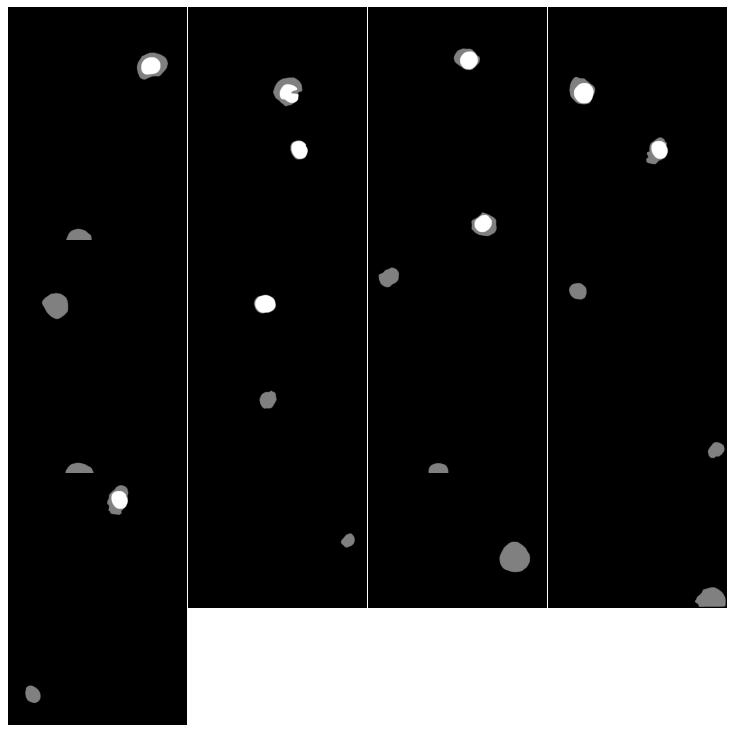

263 9844.bmp


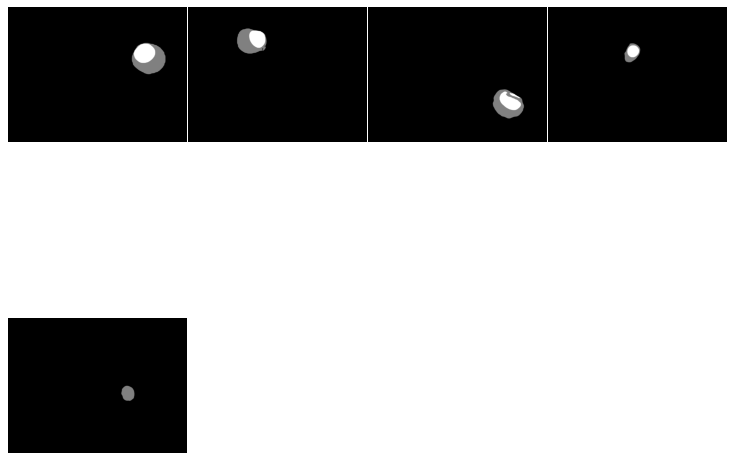

264 9850.bmp


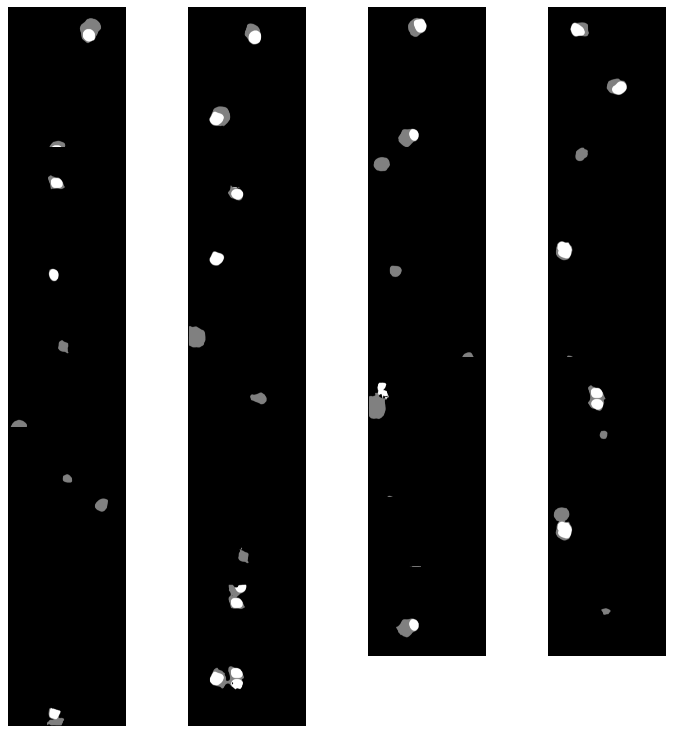

265 9855.bmp


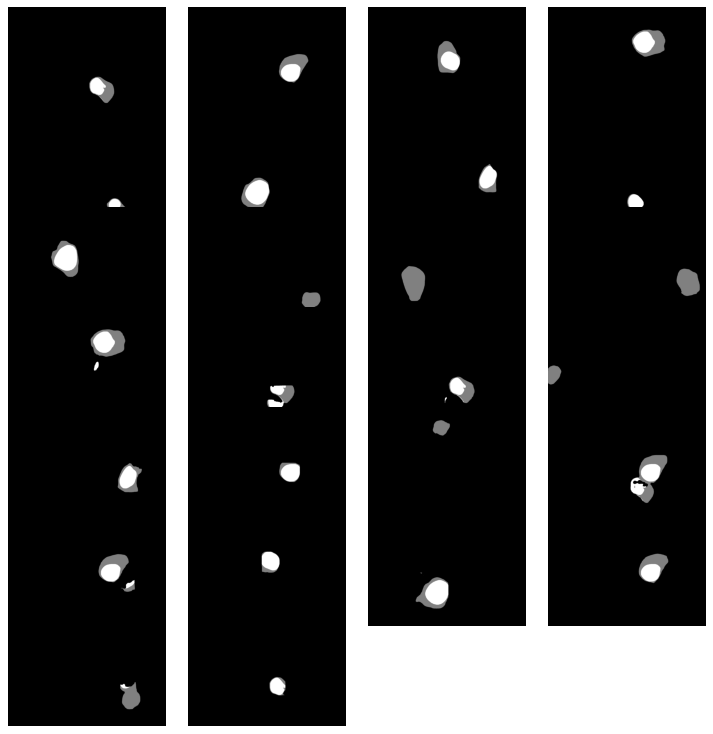

266 9858.bmp


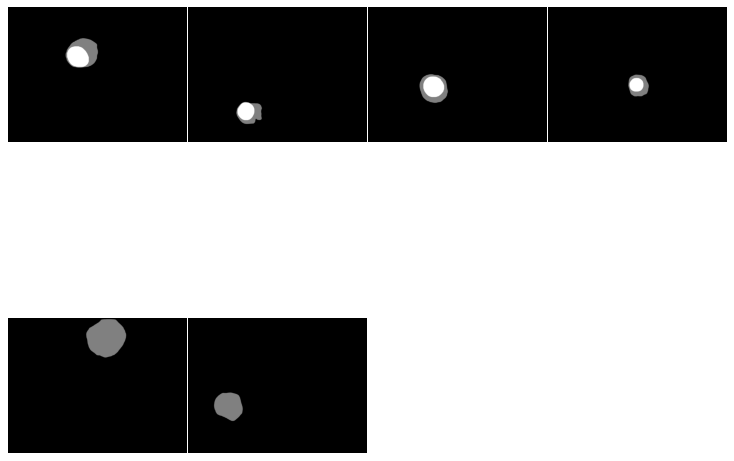

267 9865.bmp


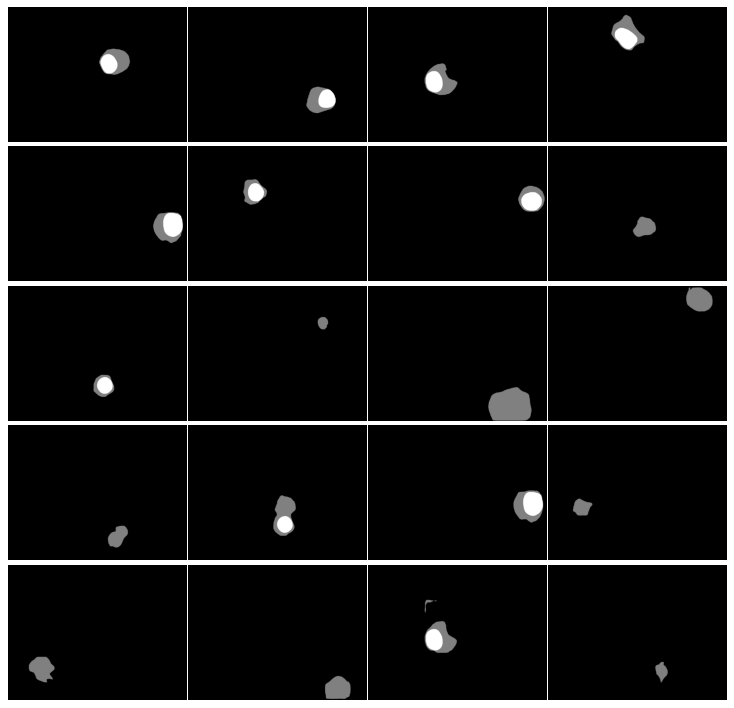

268 9873.bmp


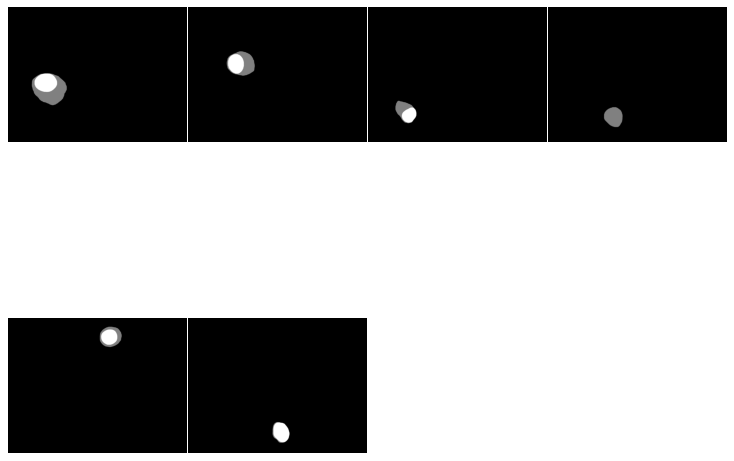

269 9883.bmp


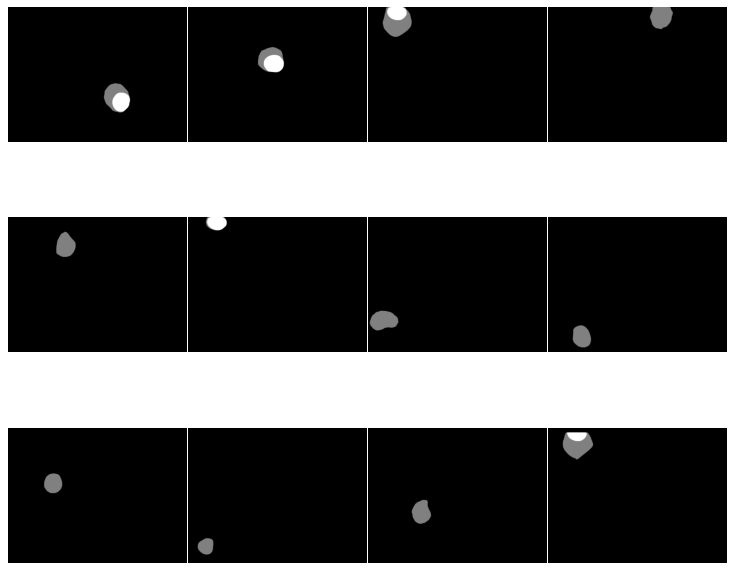

270 9893.bmp


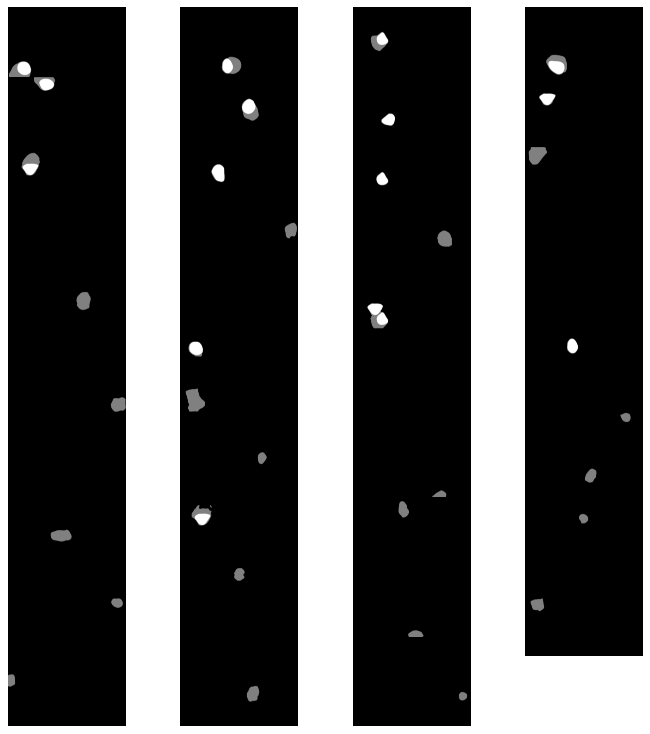

271 9894.bmp


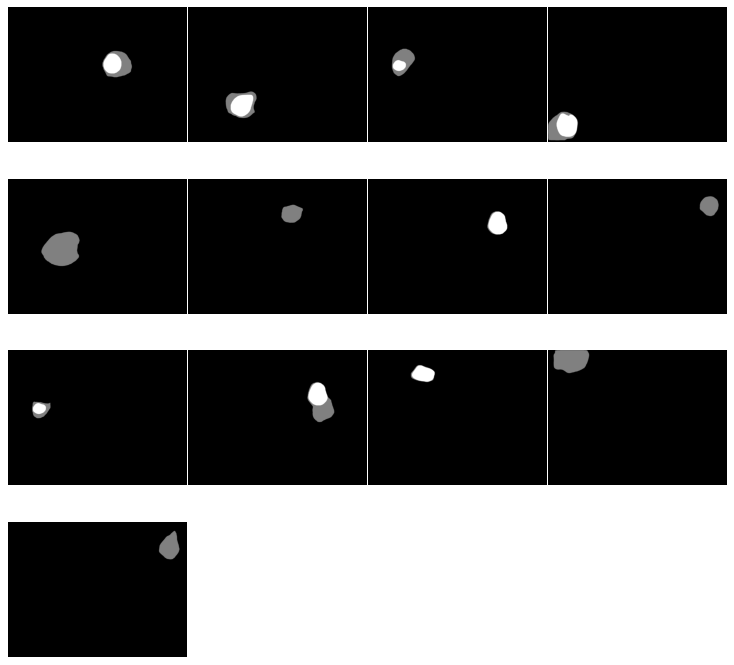

272 9896.bmp


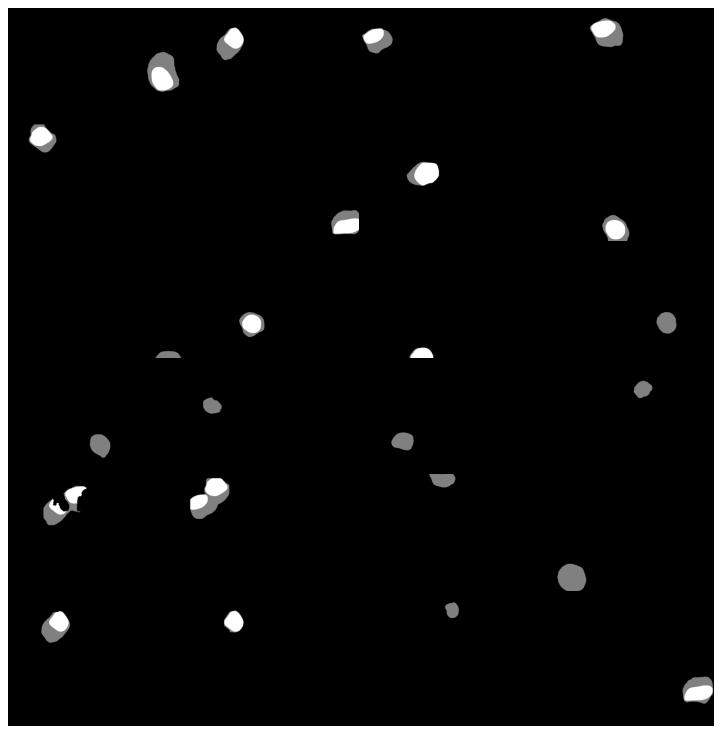

273 9898.bmp


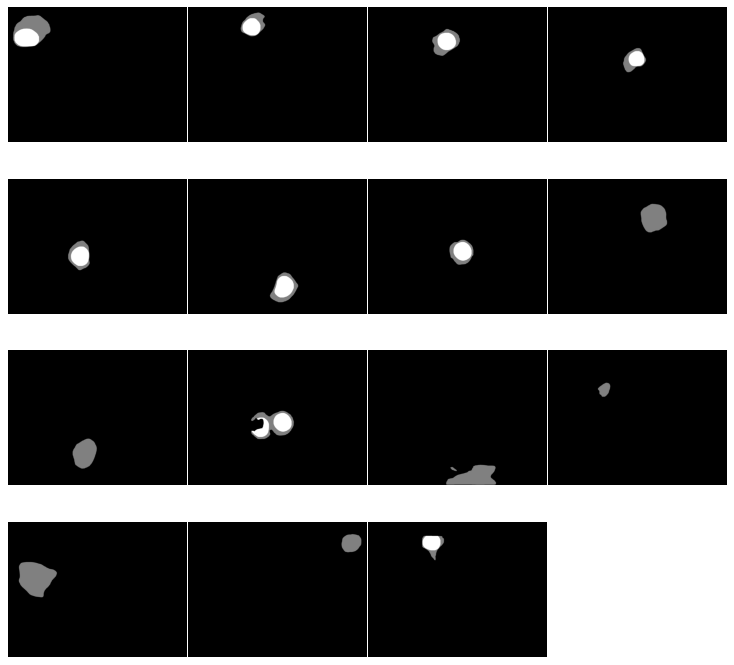

274 9906.bmp


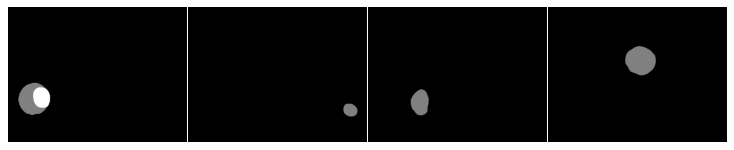

275 9911.bmp


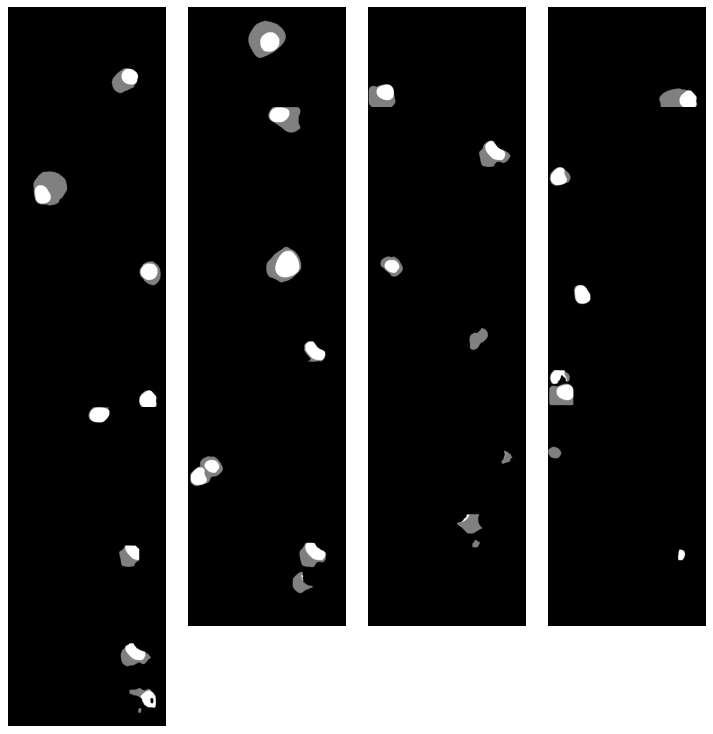

276 9913.bmp


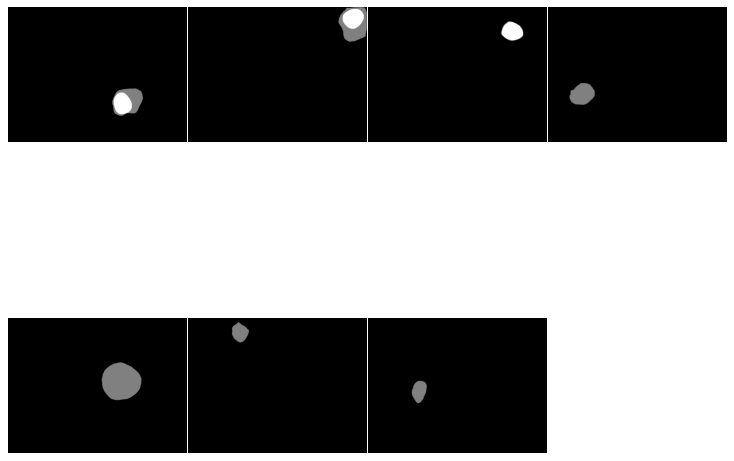

In [18]:
import math
import matplotlib.pylab as plt
for i,ann in enumerate(cell_test_pkl):
    bbox,masks = ann
    scores = bbox[0][...,4]
    masks = masks[0]
    temp =[]
    nu_pr =  cv2.imread(os.path.join(nu_save_path,img_ids[i]),0)
    for j,m in enumerate(masks):
        cell_pr = mask.decode(m)
        if cell_pr.sum() < 1000:
            continue
       # print(cell_pr.sum())
        inst_pr = (nu_pr + cell_pr)*cell_pr
        if inst_pr.max() == 1:
            inst_pr[0][0] = 2
        pred = np.zeros_like(inst_pr)
        pred[inst_pr==1] = 20
        pred[inst_pr==2] = 40
        temp.append(pred)       
        cv2.imwrite(os.path.join(inst_save_path, imgs_gt[i]+"_"+str(j+1)+".bmp"), pred)                         
    print(i,img_ids[i])     
    n = len(temp)
    col = 4
    row = math.ceil(n/col)
    f = plt.figure(figsize=(10, 10))
    width,height = temp[0].shape[1],temp[0].shape[0] 
    for inst_id, inst in enumerate(temp):
        a = int(inst_id/col)
        b = inst_id%col
        ax = f.add_subplot(row,col,inst_id+1) 
        ax.set_ylim(height + 10, -10)
        ax.set_xlim(-10, width + 10)
        ax.axis('off')
        ax.imshow(inst,cmap='gray')
    plt.tight_layout(pad=0.0,h_pad=-2.0,w_pad=0.0) 
    plt.show()

In [19]:
%run submission.py -s './pred/test/inst' -d './pred/'

  0%|          | 0/277 [00:00<?, ?it/s]

imgs: 277


100%|██████████| 277/277 [04:44<00:00,  1.03s/it]


277
saved: ./pred/submission.txt
